In [2]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 8.7 MB/s eta 0:00:00


In [3]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
import pathlib 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import shap

In [4]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install -q git+https://github.com/tensorflow/docs 

  Preparing metadata (setup.py) ... done


In [6]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [7]:
df = pd.read_csv('MVP_Candidates.csv')
df.fillna(0)

,Unnamed: 0.1,Unnamed: 0,Player,Pos,Pos_No,Age,Tm,G,GS,Seed,...,6.FT+,6.TS+,6.FTr+,6.3PAr+,6.FG Add,6.TS Add,MVP,MVP Rank,MVP Share,Year
0,0,0,Nikola Jokić,C,5,26,DEN,74,74,10,...,105,117,144,55,230.9,286.9,1,1,0.875,2021-22
1,1,1,Joel Embiid,C,5,27,PHI,68,68,8,...,105,109,243,47,6.5,169.0,0,2,0.706,2021-22
2,2,2,Giannis Antetokounmpo,PF,4,27,MIL,67,67,7,...,93,112,248,49,125.1,211.1,0,3,0.595,2021-22
3,3,3,Devin Booker,SG,2,25,PHO,68,68,1,...,112,102,103,84,-4.1,32.6,0,4,0.216,2021-22
4,4,4,Luka Dončić,PG,1,22,DAL,65,65,5,...,96,101,140,102,-8.9,15.3,0,5,0.146,2021-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,481,481,Bernard King,SF,3,34,WSB,64,64,20,...,103,99,100,30,-38.6,-26.0,0,16,0.007,1990-91
481,482,482,Kenny Smith,PG,1,25,HOU,78,78,8,...,110,112,106,164,115.5,148.1,0,17,0.005,1990-91
482,483,483,Hakeem Olajuwon,C,5,28,HOU,56,50,8,...,101,103,90,5,39.4,31.8,0,18,0.004,1990-91
483,484,484,Tim Hardaway,PG,1,24,GSW,82,82,11,...,105,102,77,198,63.4,44.2,0,19,0.001,1990-91


In [8]:
'''
1990-91 to 1998-99
1999-00 to 2011-12
2012-13 to 2021-22
'''
e1 = ('2021-22', '2020-21', '2019-20', '2018-19', '2017-18', '2016-17', '2015-16', '2014-15', '2013-14', '2012-13')
e2 = ('2011-12', '2010-11', '2009-10', '2008-09', '2007-08', '2006-07', '2005-06', '2004-05', '2003-04', '2002-03', '2001-02','2000-01')
e3 = ('1999-00', '1998-99', '1997-98', '1996-97', '1995-96', '1994-95', '1993-94', '1992-93', '1991-92', '1990-91')


df1 = df[(df['Year'] == '2011-12') | (df['Year'] == '2010-11') | (df['Year'] == '2009-10') | (df['Year'] == '2008-09') | (df['Year'] == '2007-08') | (df['Year'] == '2006-07') | (df['Year'] == '2005-06') | (df['Year'] == '2004-05') | (df['Year'] == '2003-04') | (df['Year'] == '2002-03') | (df['Year'] == '2001-02')| (df['Year'] == '2000-01')]


In [9]:
df1

,Unnamed: 0.1,Unnamed: 0,Player,Pos,Pos_No,Age,Tm,G,GS,Seed,...,6.FT+,6.TS+,6.FTr+,6.3PAr+,6.FG Add,6.TS Add,MVP,MVP Rank,MVP Share,Year
129,130,130,LeBron James,SF,3,27,MIA,62,62,4,...,102,115,156,56,156.7,217.8,1,1,0.888,2011-12
130,131,131,Kevin Durant,SF,3,23,OKC,66,66,3,...,114,116,140,117,155.0,250.3,0,2,0.735,2011-12
131,132,132,Chris Paul,PG,1,26,LAC,60,60,9,...,114,110,123,106,61.6,110.7,0,3,0.318,2011-12
132,133,133,Kobe Bryant,SG,2,33,LAL,58,58,6,...,112,100,122,95,-67.1,-1.6,0,4,0.291,2011-12
133,134,134,Tony Parker,PG,1,29,SAS,60,60,2,...,106,102,116,30,0.6,25.0,0,5,0.274,2011-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,305,305,Paul Pierce,SF,3,23,BOS,82,82,20,...,100,109,158,149,90.2,167.6,0,13,0.004,2000-01
305,306,306,Jerry Stackhouse,SG,2,26,DET,80,80,21,...,110,101,136,144,-108.3,15.0,0,14,0.002,2000-01
306,307,307,Michael Finley,SF,3,27,DAL,82,82,5,...,104,101,68,100,45.3,9.5,0,15,0.001,2000-01
307,308,308,Anthony Mason,PF,4,34,MIA,80,80,9,...,104,107,161,0,17.8,85.9,0,15,0.001,2000-01


In [10]:
df1.drop(df1.columns[[0, 1]], axis = 1, inplace=True)
df1


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Player,Pos,Pos_No,Age,Tm,G,GS,Seed,Win %,1.MP,...,6.FT+,6.TS+,6.FTr+,6.3PAr+,6.FG Add,6.TS Add,MVP,MVP Rank,MVP Share,Year
129,LeBron James,SF,3,27,MIA,62,62,4,0.696970,2326,...,102,115,156,56,156.7,217.8,1,1,0.888,2011-12
130,Kevin Durant,SF,3,23,OKC,66,66,3,0.712121,2546,...,114,116,140,117,155.0,250.3,0,2,0.735,2011-12
131,Chris Paul,PG,1,26,LAC,60,60,9,0.606061,2181,...,114,110,123,106,61.6,110.7,0,3,0.318,2011-12
132,Kobe Bryant,SG,2,33,LAL,58,58,6,0.621212,2232,...,112,100,122,95,-67.1,-1.6,0,4,0.291,2011-12
133,Tony Parker,PG,1,29,SAS,60,60,2,0.757576,1923,...,106,102,116,30,0.6,25.0,0,5,0.274,2011-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Paul Pierce,SF,3,23,BOS,82,82,20,0.439024,3120,...,100,109,158,149,90.2,167.6,0,13,0.004,2000-01
305,Jerry Stackhouse,SG,2,26,DET,80,80,21,0.390244,3215,...,110,101,136,144,-108.3,15.0,0,14,0.002,2000-01
306,Michael Finley,SF,3,27,DAL,82,82,5,0.646341,3443,...,104,101,68,100,45.3,9.5,0,15,0.001,2000-01
307,Anthony Mason,PF,4,34,MIA,80,80,9,0.609756,3254,...,104,107,161,0,17.8,85.9,0,15,0.001,2000-01


In [11]:
df1.to_csv('MedievalEra.csv', index=False)

In [12]:
def calc_metrics(y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return rmse, r2

In [13]:
seasons = ['2011-12', '2010-11', '2009-10', '2008-09', '2007-08', '2006-07', '2005-06', '2004-05', '2003-04', '2002-03', '2001-02','2000-01']

In [14]:
col_to_drop = []
for i in df1.columns:
    if i[0] == '3' or i[0] == '4':
        col_to_drop.append(i)

In [15]:
season_metrics = {season:[] for season in seasons}
all_results = pd.DataFrame(columns = ['Year', 'Player', 'MVP Share', 'MVP Rank', 'Predicted MVP Share'])

In [16]:
for season in seasons:
    
    training_data = df1[(df1['Year'] != season)].copy()
    train = training_data.drop(['Player', 'Pos', 'Tm', 'MVP', 'MVP Rank', 'MVP Share', 'Year'] + col_to_drop, axis=1)
    train_labels = training_data['MVP Share']

    train.fillna(0)

    scaler = StandardScaler()
    normed_train_data = scaler.fit_transform(train)


In [17]:
def build_model1_two_hidden_layers():
    # Keras model object created from Sequential class. This will be the container that contains all layers.
    model = Sequential()

    # The model so far is empty. It can be constructed by adding layers and compilation.
    # This is a Keras model wiTh multiple hidden layers.
    
    # Input Layer with 10 Neurons
    model.add(Dense(10, input_shape = (normed_train_data.shape[1],)))    # Input layer => input_shape must be mentioned
#     model.add(Activation('relu')) # relu or sigmoid.
    
    model.add(Dense(50,Activation('relu')))                         # Hidden layer 1 => only output dimension should be designated (output dimension = # of Neurons = 50)
    
    
    model.add(Dense(50, Activation('relu')))                         # Hidden layer 2 => only output dimension should be designated (output dimension = # of Neurons = 50)
    
    
    model.add(Dense(1))                          # Output layer => output dimension = 1 since it is a regression problem
    
    #Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    #Optimizer: SGD, Adam, RMSProp
    learning_rate = 0.01
    optimizer = optimizers.RMSprop(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', 'mape']) # for regression problems, mean squared error (MSE) is often employed
    
    return model

model = build_model1_two_hidden_layers()
print('summary of this model: ')
model.summary()    

summary of this model: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                800       
                                                                 
 dense_1 (Dense)             (None, 50)                550       
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3,951
Trainable params: 3,951
Non-trainable params: 0
_________________________________________________________________


In [18]:
def build_model3_five_hidden_layers():
    # Keras model object created from Sequential class. This will be the container that contains all layers.
    model = Sequential()

    # The model so far is empty. It can be constructed by adding layers and compilation.
    # This Keras model with multiple hidden layers.
    
    # Input Layer with 32 Neurons
    model.add(Dense(32, input_shape = (normed_train_data.shape[1],)))    # Input layer => input_shape must be explicitly designated
#     model.add(Activation('relu')) # relu or sigmoid.
    
    model.add(Dense(64,Activation('relu')))                         # Hidden layer 1 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(64, Activation('relu')))                         # Hidden layer 2 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(64, Activation('relu')))                         # Hidden layer 3 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(64, Activation('relu')))                         # Hidden layer 4 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(64, Activation('relu')))                         # Hidden layer 5 => only output dimension should be designated (output dimension = # of Neurons = 64)

    
    model.add(Dense(1))                          # Output layer => output dimension = 1 since it is a regression problem
    
    # Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    #Optimizer: SGD, Adam, RMSProp
    learning_rate = 0.01
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', 'mape']) # for regression problems, mean squared error (MSE) is often employed
    
    return model

model3 = build_model3_five_hidden_layers()
print('Here is a summary of this model: ')
model3.summary()

Here is a summary of this model: 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                2560      
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)   

In [19]:
example_batch = normed_train_data[:10] # take the first 10 data points from the training data.
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 305ms/step


array([[ 0.09524335],
       [ 0.00410806],
       [-0.01055728],
       [ 0.12882629],
       [ 0.0026257 ],
       [ 0.04919209],
       [-0.07645774],
       [ 0.04279873],
       [ 0.2610762 ],
       [ 0.09826058]], dtype=float32)

In [20]:
checkpoint_path = r".\models\NBA_Prediction.ckpt"

# Create a callback that saves the model's weights
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss',save_best_only=True,save_weights_only=True,verbose=0)

# epoch

In [21]:
for season in seasons:
  testing_data = df1[(df1['Year'] == season)].copy()
  test = testing_data.drop(['Player', 'Pos', 'Tm', 'MVP', 'MVP Rank', 'MVP Share', 'Year'] + col_to_drop, axis=1)
  test_labels = testing_data['MVP Share']

  test.fillna(0)
  scaler = StandardScaler()
  normed_test_data = scaler.fit_transform(test)

  EPOCHS = 80
  batch_size = 50

  model = build_model3_five_hidden_layers()
  print('Here is a summary of this model: ')
  model.summary()


  with tf.device('/CPU:0'): 
      history = model.fit(
          normed_train_data, 
          train_labels,
          batch_size = batch_size,
          epochs=EPOCHS, 
          verbose=1,
          shuffle=True,
          steps_per_epoch = int(normed_train_data.shape[0] / batch_size) ,
          callbacks=[tfdocs.modeling.EpochDots(), 
                  ckpt_callback
                    ],
          
      )
  Y_pred = model.predict(normed_test_data)

  rmse, r2 = calc_metrics(test_labels, Y_pred)

  season_metrics[season] += [rmse, r2]
  print(rmse,r2)

  initial_results = testing_data[['Year', 'Player', 'MVP Share', 'MVP Rank']]
  results = initial_results.copy()
  results['Predicted MVP Share'] = Y_pred
  results = results.sort_values('Predicted MVP Share', ascending=False).reset_index(drop=True)

  print(results)
  all_results = pd.concat([all_results, results])   


Here is a summary of this model: 
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 32)                2560      
                                                                 
 dense_12 (Dense)            (None, 64)                2112      
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)   

3/3 [==============================] - 2s 25ms/step - loss: 0.3730 - mae: 0.4724 - mse: 0.3730 - mape: 11435.6846
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0187 - mae: 0.0764 - mse: 0.0187 - mape: 575.4160.

3/3 [==============================] - 0s 11ms/step - loss: 0.1293 - mae: 0.2111 - mse: 0.1293 - mape: 451.2632
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0392 - mae: 0.1182 - mse: 0.0392 - mape: 1433.6769.

3/3 [==============================] - 0s 13ms/step - loss: 0.0586 - mae: 0.1632 - mse: 0.0586 - mape: 2395.9919
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0487 - mae: 0.1814 - mse: 0.0487 - mape: 4519.5518.

3/3 [==============================] - 0s 12ms/step - loss: 0.0610 - mae: 0.2010 - mse: 0.0610 - mape: 4607.7441
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0429 - mae: 0.1691 - mse: 0.0429 - mape: 3247.4419.

3/3 [==============================] - 0s 11ms/step - loss: 0.0422 - mae: 0.1545 - mse: 0.0422 - mape: 2657.3088
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0339 - mae: 0.1484 - mse: 0.0339 - mape: 1230.1067.

3/3 [==============================] - 0s 10ms/step - loss: 0.0284 - mae: 0.1152 - mse: 0.0284 - mape: 1363.0103
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0530 - mae: 0.1551 - mse: 0.0530 - mape: 1572.0636.

3/3 [==============================] - 0s 19ms/step - loss: 0.0419 - mae: 0.1456 - mse: 0.0419 - mape: 2137.5271
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0423 - mae: 0.1248 - mse: 0.0423 - mape: 882.6571.

3/3 [==============================] - 0s 18ms/step - loss: 0.0288 - mae: 0.1042 - mse: 0.0288 - mape: 885.8378
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0444 - mae: 0.1433 - mse: 0.0444 - mape: 1082.6553.

3/3 [==============================] - 0s 19ms/step - loss: 0.0329 - mae: 0.1198 - mse: 0.0329 - mape: 1347.6615
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0129 - mae: 0.0946 - mse: 0.0129 - mape: 1067.9119.

3/3 [==============================] - 0s 19ms/step - loss: 0.0275 - mae: 0.1092 - mse: 0.0275 - mape: 813.4587
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0277 - mae: 0.1017 - mse: 0.0277 - mape: 1096.2557.

3/3 [==============================] - 0s 18ms/step - loss: 0.0214 - mae: 0.0918 - mse: 0.0214 - mape: 1023.6254
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0257 - mae: 0.1087 - mse: 0.0257 - mape: 1670.1707.

3/3 [==============================] - 0s 16ms/step - loss: 0.0240 - mae: 0.1019 - mse: 0.0240 - mape: 1252.0267
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0112 - mae: 0.0708 - mse: 0.0112 - mape: 724.1353.

3/3 [==============================] - 0s 15ms/step - loss: 0.0180 - mae: 0.0817 - mse: 0.0180 - mape: 835.1736
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0206 - mae: 0.1109 - mse: 0.0206 - mape: 851.7922.

3/3 [==============================] - 0s 18ms/step - loss: 0.0196 - mae: 0.0899 - mse: 0.0196 - mape: 925.6826
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0122 - mae: 0.0674 - mse: 0.0122 - mape: 431.3526.

3/3 [==============================] - 0s 18ms/step - loss: 0.0146 - mae: 0.0746 - mse: 0.0146 - mape: 481.1566
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0201 - mae: 0.1012 - mse: 0.0201 - mape: 641.5320.

3/3 [==============================] - 0s 18ms/step - loss: 0.0142 - mae: 0.0822 - mse: 0.0142 - mape: 961.6504
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0104 - mae: 0.0655 - mse: 0.0104 - mape: 538.1953.

3/3 [==============================] - 0s 23ms/step - loss: 0.0193 - mae: 0.0797 - mse: 0.0193 - mape: 448.0827
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0115 - mae: 0.0885 - mse: 0.0115 - mape: 1268.3365.

3/3 [==============================] - 0s 12ms/step - loss: 0.0170 - mae: 0.0907 - mse: 0.0170 - mape: 1114.7175
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0162 - mae: 0.0856 - mse: 0.0162 - mape: 732.2375.

3/3 [==============================] - 0s 12ms/step - loss: 0.0203 - mae: 0.0884 - mse: 0.0203 - mape: 622.4022
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0172 - mae: 0.0791 - mse: 0.0172 - mape: 856.5742.

3/3 [==============================] - 0s 12ms/step - loss: 0.0150 - mae: 0.0745 - mse: 0.0150 - mape: 660.4463
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0105 - mae: 0.0770 - mse: 0.0105 - mape: 691.0997.

3/3 [==============================] - 0s 15ms/step - loss: 0.0152 - mae: 0.0844 - mse: 0.0152 - mape: 1004.5012
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0081 - mae: 0.0640 - mse: 0.0081 - mape: 838.3110.

3/3 [==============================] - 0s 17ms/step - loss: 0.0162 - mae: 0.0784 - mse: 0.0162 - mape: 803.8135
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0270 - mae: 0.1041 - mse: 0.0270 - mape: 567.2375.

3/3 [==============================] - 0s 15ms/step - loss: 0.0187 - mae: 0.0821 - mse: 0.0187 - mape: 764.4830
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0522 - mae: 0.1295 - mse: 0.0522 - mape: 2453.6514.

3/3 [==============================] - 0s 18ms/step - loss: 0.0402 - mae: 0.1208 - mse: 0.0402 - mape: 1864.8051
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0169 - mae: 0.0813 - mse: 0.0169 - mape: 715.6534.

3/3 [==============================] - 0s 14ms/step - loss: 0.0157 - mae: 0.0772 - mse: 0.0157 - mape: 788.4679
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0422 - mae: 0.1341 - mse: 0.0422 - mape: 316.8058.

3/3 [==============================] - 0s 13ms/step - loss: 0.0199 - mae: 0.0945 - mse: 0.0199 - mape: 501.3872
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0128 - mae: 0.0692 - mse: 0.0128 - mape: 1200.2437.

3/3 [==============================] - 0s 10ms/step - loss: 0.0136 - mae: 0.0726 - mse: 0.0136 - mape: 1030.8741
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0088 - mae: 0.0644 - mse: 0.0088 - mape: 677.8660.

3/3 [==============================] - 0s 10ms/step - loss: 0.0180 - mae: 0.0831 - mse: 0.0180 - mape: 543.7108
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0046 - mae: 0.0454 - mse: 0.0046 - mape: 760.2447.

3/3 [==============================] - 0s 12ms/step - loss: 0.0122 - mae: 0.0692 - mse: 0.0122 - mape: 632.8995
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0087 - mae: 0.0518 - mse: 0.0087 - mape: 544.8849.

3/3 [==============================] - 0s 10ms/step - loss: 0.0076 - mae: 0.0532 - mse: 0.0076 - mape: 566.9238
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0162 - mae: 0.0813 - mse: 0.0162 - mape: 956.5480.

3/3 [==============================] - 0s 10ms/step - loss: 0.0140 - mae: 0.0771 - mse: 0.0140 - mape: 840.1774
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0111 - mae: 0.0618 - mse: 0.0111 - mape: 719.1165.

3/3 [==============================] - 0s 10ms/step - loss: 0.0114 - mae: 0.0677 - mse: 0.0114 - mape: 671.6772
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0064 - mae: 0.0519 - mse: 0.0064 - mape: 386.5657.

3/3 [==============================] - 0s 10ms/step - loss: 0.0090 - mae: 0.0600 - mse: 0.0090 - mape: 472.4583
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0286 - mae: 0.1161 - mse: 0.0286 - mape: 312.7123.

3/3 [==============================] - 0s 10ms/step - loss: 0.0091 - mae: 0.0572 - mse: 0.0091 - mape: 438.7933
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0087 - mae: 0.0579 - mse: 0.0087 - mape: 335.8522.

3/3 [==============================] - 0s 10ms/step - loss: 0.0073 - mae: 0.0520 - mse: 0.0073 - mape: 312.7541
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0123 - mae: 0.0716 - mse: 0.0123 - mape: 509.8276.

3/3 [==============================] - 0s 10ms/step - loss: 0.0123 - mae: 0.0693 - mse: 0.0123 - mape: 745.0184
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0109 - mae: 0.0698 - mse: 0.0109 - mape: 769.8537.

3/3 [==============================] - 0s 10ms/step - loss: 0.0099 - mae: 0.0653 - mse: 0.0099 - mape: 720.6270
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0119 - mae: 0.0691 - mse: 0.0119 - mape: 375.0835.

3/3 [==============================] - 0s 10ms/step - loss: 0.0090 - mae: 0.0619 - mse: 0.0090 - mape: 441.7568
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0073 - mae: 0.0541 - mse: 0.0073 - mape: 826.4672.

3/3 [==============================] - 0s 11ms/step - loss: 0.0052 - mae: 0.0461 - mse: 0.0052 - mape: 790.4152
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0094 - mae: 0.0585 - mse: 0.0094 - mape: 255.6087.

3/3 [==============================] - 0s 11ms/step - loss: 0.0154 - mae: 0.0720 - mse: 0.0154 - mape: 328.0537
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0268 - mae: 0.1043 - mse: 0.0268 - mape: 369.6564.

3/3 [==============================] - 0s 11ms/step - loss: 0.0337 - mae: 0.1104 - mse: 0.0337 - mape: 1281.3179
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0332 - mae: 0.1102 - mse: 0.0332 - mape: 789.2132.

3/3 [==============================] - 0s 10ms/step - loss: 0.0439 - mae: 0.1237 - mse: 0.0439 - mape: 361.6843
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0356 - mae: 0.1006 - mse: 0.0356 - mape: 426.2076.

3/3 [==============================] - 0s 9ms/step - loss: 0.0291 - mae: 0.1052 - mse: 0.0291 - mape: 815.3234
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0383 - mae: 0.1119 - mse: 0.0383 - mape: 1272.1987.

3/3 [==============================] - 0s 12ms/step - loss: 0.0273 - mae: 0.1035 - mse: 0.0273 - mape: 1292.2124
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0244 - mae: 0.0990 - mse: 0.0244 - mape: 815.8303.

3/3 [==============================] - 0s 15ms/step - loss: 0.0211 - mae: 0.0951 - mse: 0.0211 - mape: 808.6660
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0120 - mae: 0.0695 - mse: 0.0120 - mape: 1426.6139.

3/3 [==============================] - 0s 16ms/step - loss: 0.0285 - mae: 0.0925 - mse: 0.0285 - mape: 649.8050
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0186 - mae: 0.0908 - mse: 0.0186 - mape: 1221.8009.

3/3 [==============================] - 0s 12ms/step - loss: 0.0218 - mae: 0.1035 - mse: 0.0218 - mape: 1616.4625
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0453 - mae: 0.1489 - mse: 0.0453 - mape: 2393.9341.

3/3 [==============================] - 0s 11ms/step - loss: 0.0298 - mae: 0.1205 - mse: 0.0298 - mape: 1776.3601
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0185 - mae: 0.0828 - mse: 0.0185 - mape: 1201.9867.

3/3 [==============================] - 0s 11ms/step - loss: 0.0245 - mae: 0.1032 - mse: 0.0245 - mape: 1041.5079
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0385 - mae: 0.0972 - mse: 0.0385 - mape: 944.2031.

3/3 [==============================] - 0s 13ms/step - loss: 0.0190 - mae: 0.0880 - mse: 0.0190 - mape: 1412.9313
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0259 - mae: 0.1107 - mse: 0.0259 - mape: 1301.6615.

3/3 [==============================] - 0s 9ms/step - loss: 0.0187 - mae: 0.0927 - mse: 0.0187 - mape: 1346.5764
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0151 - mae: 0.0785 - mse: 0.0151 - mape: 1217.4639.

3/3 [==============================] - 0s 12ms/step - loss: 0.0118 - mae: 0.0743 - mse: 0.0118 - mape: 1033.4724
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0164 - mae: 0.0767 - mse: 0.0164 - mape: 707.7526.

3/3 [==============================] - 0s 10ms/step - loss: 0.0158 - mae: 0.0747 - mse: 0.0158 - mape: 626.7647
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0169 - mae: 0.0850 - mse: 0.0169 - mape: 1046.7771.

3/3 [==============================] - 0s 12ms/step - loss: 0.0122 - mae: 0.0735 - mse: 0.0122 - mape: 1130.3112
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0130 - mae: 0.0801 - mse: 0.0130 - mape: 1307.7583.

3/3 [==============================] - 0s 10ms/step - loss: 0.0078 - mae: 0.0607 - mse: 0.0078 - mape: 1113.5095
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0098 - mae: 0.0663 - mse: 0.0098 - mape: 664.2996.

3/3 [==============================] - 0s 9ms/step - loss: 0.0104 - mae: 0.0654 - mse: 0.0104 - mape: 691.9939
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0063 - mae: 0.0476 - mse: 0.0063 - mape: 565.9069.

3/3 [==============================] - 0s 9ms/step - loss: 0.0100 - mae: 0.0602 - mse: 0.0100 - mape: 509.1628
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0026 - mae: 0.0367 - mse: 0.0026 - mape: 1092.2688.

3/3 [==============================] - 0s 9ms/step - loss: 0.0066 - mae: 0.0507 - mse: 0.0066 - mape: 553.5189
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0109 - mae: 0.0716 - mse: 0.0109 - mape: 681.4545.

3/3 [==============================] - 0s 10ms/step - loss: 0.0073 - mae: 0.0531 - mse: 0.0073 - mape: 487.1644
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0073 - mae: 0.0516 - mse: 0.0073 - mape: 305.0256.

3/3 [==============================] - 0s 12ms/step - loss: 0.0061 - mae: 0.0460 - mse: 0.0061 - mape: 367.4662
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0062 - mae: 0.0477 - mse: 0.0062 - mape: 404.6376.

3/3 [==============================] - 0s 11ms/step - loss: 0.0048 - mae: 0.0438 - mse: 0.0048 - mape: 437.2308
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0053 - mae: 0.0396 - mse: 0.0053 - mape: 775.4675.

3/3 [==============================] - 0s 12ms/step - loss: 0.0061 - mae: 0.0490 - mse: 0.0061 - mape: 555.4667
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0050 - mae: 0.0403 - mse: 0.0050 - mape: 491.2647.

3/3 [==============================] - 0s 11ms/step - loss: 0.0044 - mae: 0.0388 - mse: 0.0044 - mape: 573.8978
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0049 - mae: 0.0427 - mse: 0.0049 - mape: 317.7437.

3/3 [==============================] - 0s 11ms/step - loss: 0.0037 - mae: 0.0361 - mse: 0.0037 - mape: 284.7291
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0045 - mae: 0.0394 - mse: 0.0045 - mape: 236.4615.

3/3 [==============================] - 0s 14ms/step - loss: 0.0063 - mae: 0.0441 - mse: 0.0063 - mape: 389.7592
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0023 - mae: 0.0362 - mse: 0.0023 - mape: 173.7813.

3/3 [==============================] - 0s 11ms/step - loss: 0.0031 - mae: 0.0335 - mse: 0.0031 - mape: 350.2716
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0046 - mae: 0.0395 - mse: 0.0046 - mape: 356.8838.

3/3 [==============================] - 0s 11ms/step - loss: 0.0046 - mae: 0.0366 - mse: 0.0046 - mape: 335.0893
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0076 - mae: 0.0553 - mse: 0.0076 - mape: 462.0202.

3/3 [==============================] - 0s 12ms/step - loss: 0.0060 - mae: 0.0483 - mse: 0.0060 - mape: 346.2233
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0084 - mae: 0.0424 - mse: 0.0084 - mape: 272.9538.

3/3 [==============================] - 0s 11ms/step - loss: 0.0065 - mae: 0.0457 - mse: 0.0065 - mape: 225.9962
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0042 - mae: 0.0312 - mse: 0.0042 - mape: 258.8415.

3/3 [==============================] - 0s 11ms/step - loss: 0.0042 - mae: 0.0355 - mse: 0.0042 - mape: 262.8920
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0085 - mae: 0.0505 - mse: 0.0085 - mape: 309.4213.

3/3 [==============================] - 0s 12ms/step - loss: 0.0071 - mae: 0.0482 - mse: 0.0071 - mape: 375.9330
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0048 - mae: 0.0406 - mse: 0.0048 - mape: 440.0055.

3/3 [==============================] - 0s 12ms/step - loss: 0.0042 - mae: 0.0375 - mse: 0.0042 - mape: 408.0609
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0070 - mae: 0.0498 - mse: 0.0070 - mape: 275.8733.

3/3 [==============================] - 0s 11ms/step - loss: 0.0050 - mae: 0.0415 - mse: 0.0050 - mape: 298.7754
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 3.7414e-04 - mae: 0.0151 - mse: 3.7414e-04 - mape: 406.1428.

3/3 [==============================] - 0s 14ms/step - loss: 0.0046 - mae: 0.0374 - mse: 0.0046 - mape: 382.7331   
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0046 - mae: 0.0435 - mse: 0.0046 - mape: 412.6888.

3/3 [==============================] - 0s 13ms/step - loss: 0.0036 - mae: 0.0361 - mse: 0.0036 - mape: 369.5858
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0059 - mae: 0.0486 - mse: 0.0059 - mape: 258.5062.

3/3 [==============================] - 0s 13ms/step - loss: 0.0057 - mae: 0.0468 - mse: 0.0057 - mape: 235.5481
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0023 - mae: 0.0329 - mse: 0.0023 - mape: 463.0086.

3/3 [==============================] - 0s 11ms/step - loss: 0.0032 - mae: 0.0359 - mse: 0.0032 - mape: 376.6721
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0032 - mae: 0.0346 - mse: 0.0032 - mape: 312.0614.

3/3 [==============================] - 0s 11ms/step - loss: 0.0028 - mae: 0.0325 - mse: 0.0028 - mape: 348.8139
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0022 - mae: 0.0309 - mse: 0.0022 - mape: 305.7461.

3/3 [==============================] - 0s 12ms/step - loss: 0.0031 - mae: 0.0331 - mse: 0.0031 - mape: 308.7255
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0046 - mae: 0.0397 - mse: 0.0046 - mape: 343.1621.

1/1 [==============================] - 0s 140ms/step
0.23607643991774227 0.2679384642410314
       Year             Player  MVP Share  MVP Rank  Predicted MVP Share
0   2011-12       LeBron James      0.888         1             0.804376
1   2011-12        Kobe Bryant      0.291         4             0.778618
2   2011-12  Russell Westbrook      0.003        12             0.645371
3   2011-12       Kevin Durant      0.735         2             0.473220
4   2011-12         Chris Paul      0.318         3             0.250327
5   2011-12       Derrick Rose      0.004        11             0.214463
6   2011-12      Dwight Howard      0.011         7             0.087281
7   2011-12        Dwyane Wade      0.005        10             0.056828
8   2011-12        Tony Parker      0.274         5             0.045858
9   2011-12         Kevin Love      0.048         6             0.044445
10  2011-12         Tim Duncan      0.002        14             0.025258
11  2011-12        Rajon Rondo  

3/3 [==============================] - 3s 13ms/step - loss: 0.2785 - mae: 0.4338 - mse: 0.2785 - mape: 12638.3281
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0891 - mae: 0.1784 - mse: 0.0891 - mape: 1204.1499.

3/3 [==============================] - 0s 18ms/step - loss: 0.0897 - mae: 0.1895 - mse: 0.0897 - mape: 1481.6389
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0412 - mae: 0.1805 - mse: 0.0412 - mape: 4587.3501.

3/3 [==============================] - 0s 20ms/step - loss: 0.0464 - mae: 0.1842 - mse: 0.0464 - mape: 4177.4678
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0342 - mae: 0.1289 - mse: 0.0342 - mape: 2276.1802.

3/3 [==============================] - 0s 23ms/step - loss: 0.0368 - mae: 0.1266 - mse: 0.0368 - mape: 1602.9546
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0322 - mae: 0.1169 - mse: 0.0322 - mape: 1094.1085.

3/3 [==============================] - 0s 25ms/step - loss: 0.0377 - mae: 0.1271 - mse: 0.0377 - mape: 1381.1432
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0272 - mae: 0.1325 - mse: 0.0272 - mape: 1063.1577.

3/3 [==============================] - 0s 27ms/step - loss: 0.0328 - mae: 0.1371 - mse: 0.0328 - mape: 1712.6285
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0207 - mae: 0.0936 - mse: 0.0207 - mape: 2126.6904.

3/3 [==============================] - 0s 18ms/step - loss: 0.0269 - mae: 0.1101 - mse: 0.0269 - mape: 1397.1211
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0267 - mae: 0.1193 - mse: 0.0267 - mape: 1669.5289.

3/3 [==============================] - 0s 20ms/step - loss: 0.0228 - mae: 0.1074 - mse: 0.0228 - mape: 1482.6855
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0263 - mae: 0.1144 - mse: 0.0263 - mape: 878.8741.

3/3 [==============================] - 0s 16ms/step - loss: 0.0266 - mae: 0.1030 - mse: 0.0266 - mape: 894.6707
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0539 - mae: 0.1609 - mse: 0.0539 - mape: 1142.8848.

3/3 [==============================] - 0s 18ms/step - loss: 0.0300 - mae: 0.1156 - mse: 0.0300 - mape: 1273.9941
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0635 - mae: 0.1726 - mse: 0.0635 - mape: 2373.1511.

3/3 [==============================] - 0s 15ms/step - loss: 0.0528 - mae: 0.1562 - mse: 0.0528 - mape: 2304.3450
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0311 - mae: 0.1127 - mse: 0.0311 - mape: 1202.5835.

3/3 [==============================] - 0s 14ms/step - loss: 0.0263 - mae: 0.1058 - mse: 0.0263 - mape: 1007.4377
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0208 - mae: 0.0909 - mse: 0.0208 - mape: 766.8760.

3/3 [==============================] - 0s 14ms/step - loss: 0.0247 - mae: 0.1008 - mse: 0.0247 - mape: 980.2560
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0468 - mae: 0.1414 - mse: 0.0468 - mape: 508.2783.

3/3 [==============================] - 0s 16ms/step - loss: 0.0314 - mae: 0.1207 - mse: 0.0314 - mape: 1087.6309
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0181 - mae: 0.0886 - mse: 0.0181 - mape: 1097.1646.

3/3 [==============================] - 0s 14ms/step - loss: 0.0185 - mae: 0.0907 - mse: 0.0185 - mape: 1110.0909
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0405 - mae: 0.1294 - mse: 0.0405 - mape: 684.5070.

3/3 [==============================] - 0s 23ms/step - loss: 0.0297 - mae: 0.1097 - mse: 0.0297 - mape: 759.7424
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0238 - mae: 0.1134 - mse: 0.0238 - mape: 1534.0715.

3/3 [==============================] - 0s 26ms/step - loss: 0.0235 - mae: 0.0991 - mse: 0.0235 - mape: 1209.9285
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0360 - mae: 0.1242 - mse: 0.0360 - mape: 558.9456.

3/3 [==============================] - 0s 17ms/step - loss: 0.0265 - mae: 0.1062 - mse: 0.0265 - mape: 1316.7981
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0199 - mae: 0.1050 - mse: 0.0199 - mape: 1814.8326.

3/3 [==============================] - 0s 13ms/step - loss: 0.0244 - mae: 0.1130 - mse: 0.0244 - mape: 1444.5981
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0106 - mae: 0.0774 - mse: 0.0106 - mape: 1307.6124.

3/3 [==============================] - 0s 16ms/step - loss: 0.0186 - mae: 0.0955 - mse: 0.0186 - mape: 1464.4832
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0239 - mae: 0.1041 - mse: 0.0239 - mape: 1478.6323.

3/3 [==============================] - 0s 25ms/step - loss: 0.0190 - mae: 0.0906 - mse: 0.0190 - mape: 1030.6958
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0145 - mae: 0.0968 - mse: 0.0145 - mape: 638.8610.

3/3 [==============================] - 0s 26ms/step - loss: 0.0165 - mae: 0.0809 - mse: 0.0165 - mape: 928.7344
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0238 - mae: 0.1020 - mse: 0.0238 - mape: 285.2938.

3/3 [==============================] - 0s 24ms/step - loss: 0.0185 - mae: 0.0903 - mse: 0.0185 - mape: 383.5413
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0101 - mae: 0.0619 - mse: 0.0101 - mape: 778.3217.

3/3 [==============================] - 0s 23ms/step - loss: 0.0164 - mae: 0.0755 - mse: 0.0164 - mape: 650.6276
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0111 - mae: 0.0695 - mse: 0.0111 - mape: 906.4199.

3/3 [==============================] - 0s 19ms/step - loss: 0.0156 - mae: 0.0863 - mse: 0.0156 - mape: 986.4258
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0133 - mae: 0.0689 - mse: 0.0133 - mape: 1923.2927.

3/3 [==============================] - 0s 17ms/step - loss: 0.0136 - mae: 0.0744 - mse: 0.0136 - mape: 1091.8337
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0202 - mae: 0.0907 - mse: 0.0202 - mape: 514.6044.

3/3 [==============================] - 0s 19ms/step - loss: 0.0186 - mae: 0.0889 - mse: 0.0186 - mape: 696.8905
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0088 - mae: 0.0600 - mse: 0.0088 - mape: 611.8031.

3/3 [==============================] - 0s 18ms/step - loss: 0.0120 - mae: 0.0684 - mse: 0.0120 - mape: 566.6401
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0108 - mae: 0.0704 - mse: 0.0108 - mape: 777.7673.

3/3 [==============================] - 0s 12ms/step - loss: 0.0200 - mae: 0.0929 - mse: 0.0200 - mape: 903.3112
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0218 - mae: 0.1087 - mse: 0.0218 - mape: 921.1556.

3/3 [==============================] - 0s 18ms/step - loss: 0.0151 - mae: 0.0760 - mse: 0.0151 - mape: 569.2883
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0191 - mae: 0.0846 - mse: 0.0191 - mape: 870.5515.

3/3 [==============================] - 0s 19ms/step - loss: 0.0163 - mae: 0.0762 - mse: 0.0163 - mape: 882.6168
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0160 - mae: 0.0834 - mse: 0.0160 - mape: 814.5549.

3/3 [==============================] - 0s 18ms/step - loss: 0.0192 - mae: 0.0924 - mse: 0.0192 - mape: 1004.8807
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0155 - mae: 0.0967 - mse: 0.0155 - mape: 1441.9771.

3/3 [==============================] - 0s 21ms/step - loss: 0.0127 - mae: 0.0842 - mse: 0.0127 - mape: 1329.1108
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0098 - mae: 0.0620 - mse: 0.0098 - mape: 1887.5320.

3/3 [==============================] - 0s 23ms/step - loss: 0.0125 - mae: 0.0711 - mse: 0.0125 - mape: 828.2063
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0105 - mae: 0.0636 - mse: 0.0105 - mape: 406.5652.

3/3 [==============================] - 0s 17ms/step - loss: 0.0120 - mae: 0.0711 - mse: 0.0120 - mape: 408.8865
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0140 - mae: 0.0770 - mse: 0.0140 - mape: 507.4408.

3/3 [==============================] - 0s 14ms/step - loss: 0.0118 - mae: 0.0673 - mse: 0.0118 - mape: 489.2329
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0092 - mae: 0.0540 - mse: 0.0092 - mape: 451.4632.

3/3 [==============================] - 0s 14ms/step - loss: 0.0124 - mae: 0.0685 - mse: 0.0124 - mape: 501.7414
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0128 - mae: 0.0806 - mse: 0.0128 - mape: 878.2335.

3/3 [==============================] - 0s 11ms/step - loss: 0.0171 - mae: 0.0774 - mse: 0.0171 - mape: 664.1578
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0241 - mae: 0.0958 - mse: 0.0241 - mape: 1128.0380.

3/3 [==============================] - 0s 13ms/step - loss: 0.0168 - mae: 0.0811 - mse: 0.0168 - mape: 714.2696
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0104 - mae: 0.0627 - mse: 0.0104 - mape: 355.4228.

3/3 [==============================] - 0s 11ms/step - loss: 0.0131 - mae: 0.0702 - mse: 0.0131 - mape: 551.3619
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0223 - mae: 0.0906 - mse: 0.0223 - mape: 501.4082.

3/3 [==============================] - 0s 15ms/step - loss: 0.0162 - mae: 0.0774 - mse: 0.0162 - mape: 503.6055
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0044 - mae: 0.0457 - mse: 0.0044 - mape: 1019.5837.

3/3 [==============================] - 0s 14ms/step - loss: 0.0113 - mae: 0.0632 - mse: 0.0113 - mape: 771.9449
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0131 - mae: 0.0697 - mse: 0.0131 - mape: 398.8645.

3/3 [==============================] - 0s 18ms/step - loss: 0.0101 - mae: 0.0629 - mse: 0.0101 - mape: 616.9231
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0133 - mae: 0.0710 - mse: 0.0133 - mape: 493.6798.

3/3 [==============================] - 0s 17ms/step - loss: 0.0114 - mae: 0.0664 - mse: 0.0114 - mape: 559.1540
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0114 - mae: 0.0652 - mse: 0.0114 - mape: 346.7274.

3/3 [==============================] - 0s 19ms/step - loss: 0.0101 - mae: 0.0600 - mse: 0.0101 - mape: 464.2461
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0047 - mae: 0.0425 - mse: 0.0047 - mape: 195.5746.

3/3 [==============================] - 0s 25ms/step - loss: 0.0062 - mae: 0.0519 - mse: 0.0062 - mape: 320.9831
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0093 - mae: 0.0567 - mse: 0.0093 - mape: 820.4995.

3/3 [==============================] - 0s 22ms/step - loss: 0.0078 - mae: 0.0528 - mse: 0.0078 - mape: 680.7359
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0083 - mae: 0.0569 - mse: 0.0083 - mape: 336.5593.

3/3 [==============================] - 0s 21ms/step - loss: 0.0098 - mae: 0.0585 - mse: 0.0098 - mape: 334.8285
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0059 - mae: 0.0490 - mse: 0.0059 - mape: 273.0921.

3/3 [==============================] - 0s 13ms/step - loss: 0.0067 - mae: 0.0445 - mse: 0.0067 - mape: 252.8594
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0139 - mae: 0.0567 - mse: 0.0139 - mape: 176.1381.

3/3 [==============================] - 0s 13ms/step - loss: 0.0074 - mae: 0.0482 - mse: 0.0074 - mape: 359.4779
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0081 - mae: 0.0518 - mse: 0.0081 - mape: 563.0290.

3/3 [==============================] - 0s 14ms/step - loss: 0.0068 - mae: 0.0479 - mse: 0.0068 - mape: 488.3715
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0054 - mae: 0.0475 - mse: 0.0054 - mape: 576.3785.

3/3 [==============================] - 0s 14ms/step - loss: 0.0085 - mae: 0.0553 - mse: 0.0085 - mape: 409.6675
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0059 - mae: 0.0463 - mse: 0.0059 - mape: 728.5782.

3/3 [==============================] - 0s 24ms/step - loss: 0.0094 - mae: 0.0523 - mse: 0.0094 - mape: 368.3292
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0086 - mae: 0.0715 - mse: 0.0086 - mape: 283.1774.

3/3 [==============================] - 0s 15ms/step - loss: 0.0109 - mae: 0.0554 - mse: 0.0109 - mape: 297.2137
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0137 - mae: 0.0598 - mse: 0.0137 - mape: 148.4463.

3/3 [==============================] - 0s 26ms/step - loss: 0.0095 - mae: 0.0534 - mse: 0.0095 - mape: 190.1632
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0145 - mae: 0.0596 - mse: 0.0145 - mape: 735.3777.

3/3 [==============================] - 0s 17ms/step - loss: 0.0100 - mae: 0.0549 - mse: 0.0100 - mape: 626.8579
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0042 - mae: 0.0408 - mse: 0.0042 - mape: 439.3554.

3/3 [==============================] - 0s 20ms/step - loss: 0.0102 - mae: 0.0557 - mse: 0.0102 - mape: 432.3164
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0020 - mae: 0.0323 - mse: 0.0020 - mape: 204.0501.

3/3 [==============================] - 0s 17ms/step - loss: 0.0093 - mae: 0.0529 - mse: 0.0093 - mape: 585.6403
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0110 - mae: 0.0665 - mse: 0.0110 - mape: 321.0463.

3/3 [==============================] - 0s 27ms/step - loss: 0.0114 - mae: 0.0668 - mse: 0.0114 - mape: 374.4926
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0097 - mae: 0.0526 - mse: 0.0097 - mape: 235.7333.

3/3 [==============================] - 0s 15ms/step - loss: 0.0144 - mae: 0.0615 - mse: 0.0144 - mape: 334.9750
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0035 - mae: 0.0439 - mse: 0.0035 - mape: 614.4337.

3/3 [==============================] - 0s 17ms/step - loss: 0.0108 - mae: 0.0621 - mse: 0.0108 - mape: 621.9996
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 8.1369e-04 - mae: 0.0221 - mse: 8.1369e-04 - mape: 610.1036.

3/3 [==============================] - 0s 19ms/step - loss: 0.0039 - mae: 0.0377 - mse: 0.0039 - mape: 440.1543   
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0083 - mae: 0.0575 - mse: 0.0083 - mape: 258.5478.

3/3 [==============================] - 0s 15ms/step - loss: 0.0141 - mae: 0.0606 - mse: 0.0141 - mape: 417.5292
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0035 - mae: 0.0397 - mse: 0.0035 - mape: 762.7889.

3/3 [==============================] - 0s 18ms/step - loss: 0.0069 - mae: 0.0555 - mse: 0.0069 - mape: 896.9404
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0028 - mae: 0.0399 - mse: 0.0028 - mape: 732.0348.

3/3 [==============================] - 0s 15ms/step - loss: 0.0091 - mae: 0.0520 - mse: 0.0091 - mape: 620.7839
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0032 - mae: 0.0421 - mse: 0.0032 - mape: 777.5371.

3/3 [==============================] - 0s 23ms/step - loss: 0.0039 - mae: 0.0401 - mse: 0.0039 - mape: 619.8397
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0166 - mae: 0.0756 - mse: 0.0166 - mape: 743.3907.

3/3 [==============================] - 0s 14ms/step - loss: 0.0089 - mae: 0.0535 - mse: 0.0089 - mape: 611.2816
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0026 - mae: 0.0320 - mse: 0.0026 - mape: 569.5611.

3/3 [==============================] - 0s 22ms/step - loss: 0.0083 - mae: 0.0484 - mse: 0.0083 - mape: 594.1088
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0045 - mae: 0.0446 - mse: 0.0045 - mape: 569.6420.

3/3 [==============================] - 0s 26ms/step - loss: 0.0070 - mae: 0.0480 - mse: 0.0070 - mape: 608.7261
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0060 - mae: 0.0556 - mse: 0.0060 - mape: 874.3438.

3/3 [==============================] - 0s 18ms/step - loss: 0.0076 - mae: 0.0483 - mse: 0.0076 - mape: 811.8720
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0024 - mae: 0.0347 - mse: 0.0024 - mape: 338.6840.

3/3 [==============================] - 0s 17ms/step - loss: 0.0023 - mae: 0.0329 - mse: 0.0023 - mape: 301.1200
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0027 - mae: 0.0312 - mse: 0.0027 - mape: 544.6430.

3/3 [==============================] - 0s 15ms/step - loss: 0.0067 - mae: 0.0367 - mse: 0.0067 - mape: 443.6442
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0106 - mae: 0.0368 - mse: 0.0106 - mape: 383.8367.

3/3 [==============================] - 0s 21ms/step - loss: 0.0056 - mae: 0.0346 - mse: 0.0056 - mape: 438.5428
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0010 - mae: 0.0244 - mse: 0.0010 - mape: 232.3852.

3/3 [==============================] - 0s 14ms/step - loss: 0.0018 - mae: 0.0305 - mse: 0.0018 - mape: 561.2106
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0107 - mae: 0.0432 - mse: 0.0107 - mape: 601.1514.

3/3 [==============================] - 0s 16ms/step - loss: 0.0102 - mae: 0.0449 - mse: 0.0102 - mape: 516.8187
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0016 - mae: 0.0275 - mse: 0.0016 - mape: 561.8693.

3/3 [==============================] - 0s 18ms/step - loss: 0.0016 - mae: 0.0270 - mse: 0.0016 - mape: 469.3824
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0017 - mae: 0.0286 - mse: 0.0017 - mape: 409.6918.

3/3 [==============================] - 0s 18ms/step - loss: 0.0026 - mae: 0.0347 - mse: 0.0026 - mape: 423.8721
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0354 - mae: 0.0710 - mse: 0.0354 - mape: 363.2948.

3/3 [==============================] - 0s 16ms/step - loss: 0.0055 - mae: 0.0358 - mse: 0.0055 - mape: 655.2531
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0116 - mae: 0.0510 - mse: 0.0116 - mape: 550.4888.

3/3 [==============================] - 0s 14ms/step - loss: 0.0062 - mae: 0.0400 - mse: 0.0062 - mape: 560.0219
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0070 - mae: 0.0553 - mse: 0.0070 - mape: 371.0518.

1/1 [==============================] - 0s 211ms/step
0.09197369164497177 0.896455145999319
       Year             Player  MVP Share  MVP Rank  Predicted MVP Share
0   2010-11       Derrick Rose      0.977         1             0.917613
1   2010-11      Dwight Howard      0.531         2             0.610942
2   2010-11       LeBron James      0.431         3             0.555286
3   2010-11       Kevin Durant      0.157         5             0.259031
4   2010-11        Dwyane Wade      0.020         7             0.191339
5   2010-11        Kobe Bryant      0.354         4             0.186259
6   2010-11      Dirk Nowitzki      0.093         6             0.181786
7   2010-11        Tony Parker      0.002        12             0.080490
8   2010-11        Rajon Rondo      0.004        10             0.037042
9   2010-11         Chris Paul      0.002        13             0.036871
10  2010-11  Amar'e Stoudemire      0.007         9             0.024730
11  2010-11      Manu Ginóbili   

3/3 [==============================] - 5s 25ms/step - loss: 0.2968 - mae: 0.3848 - mse: 0.2968 - mape: 8359.4512
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0947 - mae: 0.1729 - mse: 0.0947 - mape: 2038.2997.

3/3 [==============================] - 0s 14ms/step - loss: 0.0803 - mae: 0.1759 - mse: 0.0803 - mape: 1498.0431
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0399 - mae: 0.1646 - mse: 0.0399 - mape: 3098.8484.

3/3 [==============================] - 0s 15ms/step - loss: 0.0551 - mae: 0.1894 - mse: 0.0551 - mape: 4139.9873
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0488 - mae: 0.1590 - mse: 0.0488 - mape: 1224.7662.

3/3 [==============================] - 0s 11ms/step - loss: 0.0356 - mae: 0.1256 - mse: 0.0356 - mape: 1174.9758
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0944 - mae: 0.1940 - mse: 0.0944 - mape: 852.2571.

3/3 [==============================] - 0s 15ms/step - loss: 0.0634 - mae: 0.1530 - mse: 0.0634 - mape: 865.6985
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0530 - mae: 0.1634 - mse: 0.0530 - mape: 2887.8567.

3/3 [==============================] - 0s 15ms/step - loss: 0.0363 - mae: 0.1297 - mse: 0.0363 - mape: 1457.1185
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0247 - mae: 0.1112 - mse: 0.0247 - mape: 1667.6187.

3/3 [==============================] - 0s 14ms/step - loss: 0.0268 - mae: 0.1146 - mse: 0.0268 - mape: 1645.3232
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0448 - mae: 0.1344 - mse: 0.0448 - mape: 1282.5239.

3/3 [==============================] - 0s 13ms/step - loss: 0.0401 - mae: 0.1271 - mse: 0.0401 - mape: 957.2789
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0274 - mae: 0.1150 - mse: 0.0274 - mape: 1359.2786.

3/3 [==============================] - 0s 16ms/step - loss: 0.0296 - mae: 0.1303 - mse: 0.0296 - mape: 2357.2583
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.1097 - mae: 0.2325 - mse: 0.1097 - mape: 802.1908.

3/3 [==============================] - 0s 15ms/step - loss: 0.0415 - mae: 0.1268 - mse: 0.0415 - mape: 713.0124
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0309 - mae: 0.0987 - mse: 0.0309 - mape: 405.0337.

3/3 [==============================] - 0s 20ms/step - loss: 0.0371 - mae: 0.1055 - mse: 0.0371 - mape: 503.4998
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0535 - mae: 0.1311 - mse: 0.0535 - mape: 598.0115.

3/3 [==============================] - 0s 17ms/step - loss: 0.0420 - mae: 0.1180 - mse: 0.0420 - mape: 855.2433
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0463 - mae: 0.1436 - mse: 0.0463 - mape: 1491.6697.

3/3 [==============================] - 0s 16ms/step - loss: 0.0417 - mae: 0.1416 - mse: 0.0417 - mape: 1783.3304
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0679 - mae: 0.1868 - mse: 0.0679 - mape: 1748.0142.

3/3 [==============================] - 0s 18ms/step - loss: 0.0404 - mae: 0.1467 - mse: 0.0404 - mape: 1804.9327
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0386 - mae: 0.1395 - mse: 0.0386 - mape: 2510.2195.

3/3 [==============================] - 0s 11ms/step - loss: 0.0377 - mae: 0.1376 - mse: 0.0377 - mape: 1880.2791
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0227 - mae: 0.1041 - mse: 0.0227 - mape: 1896.3466.

3/3 [==============================] - 0s 16ms/step - loss: 0.0283 - mae: 0.1133 - mse: 0.0283 - mape: 1681.7174
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0348 - mae: 0.1283 - mse: 0.0348 - mape: 1283.2201.

3/3 [==============================] - 0s 13ms/step - loss: 0.0291 - mae: 0.1085 - mse: 0.0291 - mape: 958.9621
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0221 - mae: 0.1120 - mse: 0.0221 - mape: 397.2398.

3/3 [==============================] - 0s 14ms/step - loss: 0.0222 - mae: 0.0902 - mse: 0.0222 - mape: 874.3911
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0531 - mae: 0.1446 - mse: 0.0531 - mape: 463.2527.

3/3 [==============================] - 0s 24ms/step - loss: 0.0377 - mae: 0.1213 - mse: 0.0377 - mape: 492.1034
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0380 - mae: 0.1290 - mse: 0.0380 - mape: 589.9570.

3/3 [==============================] - 0s 10ms/step - loss: 0.0299 - mae: 0.1115 - mse: 0.0299 - mape: 974.9707
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0225 - mae: 0.0931 - mse: 0.0225 - mape: 1817.1753.

3/3 [==============================] - 0s 14ms/step - loss: 0.0198 - mae: 0.0869 - mse: 0.0198 - mape: 999.8220
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0214 - mae: 0.1020 - mse: 0.0214 - mape: 421.5668.

3/3 [==============================] - 0s 10ms/step - loss: 0.0195 - mae: 0.0826 - mse: 0.0195 - mape: 669.2068
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0177 - mae: 0.0977 - mse: 0.0177 - mape: 533.8312.

3/3 [==============================] - 0s 16ms/step - loss: 0.0150 - mae: 0.0844 - mse: 0.0150 - mape: 736.0640
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0263 - mae: 0.0942 - mse: 0.0263 - mape: 634.2003.

3/3 [==============================] - 0s 19ms/step - loss: 0.0276 - mae: 0.0935 - mse: 0.0276 - mape: 413.2045
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0194 - mae: 0.0840 - mse: 0.0194 - mape: 525.5476.

3/3 [==============================] - 0s 13ms/step - loss: 0.0187 - mae: 0.0833 - mse: 0.0187 - mape: 550.8391
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0420 - mae: 0.1530 - mse: 0.0420 - mape: 3047.0151.

3/3 [==============================] - 0s 15ms/step - loss: 0.0176 - mae: 0.0905 - mse: 0.0176 - mape: 1202.9730
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0188 - mae: 0.0898 - mse: 0.0188 - mape: 1022.9105.

3/3 [==============================] - 0s 15ms/step - loss: 0.0177 - mae: 0.0873 - mse: 0.0177 - mape: 1021.2790
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0221 - mae: 0.0866 - mse: 0.0221 - mape: 397.4124.

3/3 [==============================] - 0s 15ms/step - loss: 0.0176 - mae: 0.0753 - mse: 0.0176 - mape: 390.6174
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0037 - mae: 0.0377 - mse: 0.0037 - mape: 622.7215.

3/3 [==============================] - 0s 25ms/step - loss: 0.0121 - mae: 0.0682 - mse: 0.0121 - mape: 591.0467
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0073 - mae: 0.0566 - mse: 0.0073 - mape: 121.3737.

3/3 [==============================] - 0s 17ms/step - loss: 0.0096 - mae: 0.0618 - mse: 0.0096 - mape: 586.8368
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0117 - mae: 0.0639 - mse: 0.0117 - mape: 460.5846.

3/3 [==============================] - 0s 19ms/step - loss: 0.0115 - mae: 0.0653 - mse: 0.0115 - mape: 423.8347
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0140 - mae: 0.0710 - mse: 0.0140 - mape: 533.0829.

3/3 [==============================] - 0s 18ms/step - loss: 0.0131 - mae: 0.0652 - mse: 0.0131 - mape: 546.5479
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0100 - mae: 0.0529 - mse: 0.0100 - mape: 410.1434.

3/3 [==============================] - 0s 20ms/step - loss: 0.0140 - mae: 0.0671 - mse: 0.0140 - mape: 471.6750
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0130 - mae: 0.0599 - mse: 0.0130 - mape: 152.3190.

3/3 [==============================] - 0s 17ms/step - loss: 0.0125 - mae: 0.0703 - mse: 0.0125 - mape: 546.8103
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0135 - mae: 0.0670 - mse: 0.0135 - mape: 620.0832.

3/3 [==============================] - 0s 17ms/step - loss: 0.0149 - mae: 0.0746 - mse: 0.0149 - mape: 583.6286
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0067 - mae: 0.0490 - mse: 0.0067 - mape: 694.2336.

3/3 [==============================] - 0s 19ms/step - loss: 0.0068 - mae: 0.0486 - mse: 0.0068 - mape: 474.8718
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0118 - mae: 0.0617 - mse: 0.0118 - mape: 467.2534.

3/3 [==============================] - 0s 28ms/step - loss: 0.0094 - mae: 0.0607 - mse: 0.0094 - mape: 623.9081
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0030 - mae: 0.0350 - mse: 0.0030 - mape: 267.2575.

3/3 [==============================] - 0s 18ms/step - loss: 0.0106 - mae: 0.0562 - mse: 0.0106 - mape: 389.7488
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0069 - mae: 0.0500 - mse: 0.0069 - mape: 278.6760.

3/3 [==============================] - 0s 19ms/step - loss: 0.0065 - mae: 0.0504 - mse: 0.0065 - mape: 505.3599
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0056 - mae: 0.0394 - mse: 0.0056 - mape: 277.3250.

3/3 [==============================] - 0s 22ms/step - loss: 0.0076 - mae: 0.0491 - mse: 0.0076 - mape: 341.0777
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0082 - mae: 0.0621 - mse: 0.0082 - mape: 360.4407.

3/3 [==============================] - 0s 25ms/step - loss: 0.0106 - mae: 0.0668 - mse: 0.0106 - mape: 567.3788
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0081 - mae: 0.0623 - mse: 0.0081 - mape: 1017.0696.

3/3 [==============================] - 0s 22ms/step - loss: 0.0083 - mae: 0.0577 - mse: 0.0083 - mape: 578.0776
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0084 - mae: 0.0567 - mse: 0.0084 - mape: 255.4815.

3/3 [==============================] - 0s 23ms/step - loss: 0.0068 - mae: 0.0510 - mse: 0.0068 - mape: 434.7534
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0097 - mae: 0.0640 - mse: 0.0097 - mape: 658.0379.

3/3 [==============================] - 0s 15ms/step - loss: 0.0099 - mae: 0.0653 - mse: 0.0099 - mape: 624.8229
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0043 - mae: 0.0410 - mse: 0.0043 - mape: 297.3140.

3/3 [==============================] - 0s 16ms/step - loss: 0.0106 - mae: 0.0614 - mse: 0.0106 - mape: 486.2483
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0189 - mae: 0.0970 - mse: 0.0189 - mape: 247.1520.

3/3 [==============================] - 0s 13ms/step - loss: 0.0070 - mae: 0.0507 - mse: 0.0070 - mape: 447.2037
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0189 - mae: 0.0852 - mse: 0.0189 - mape: 339.8676.

3/3 [==============================] - 0s 29ms/step - loss: 0.0178 - mae: 0.0825 - mse: 0.0178 - mape: 400.8534
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0071 - mae: 0.0530 - mse: 0.0071 - mape: 761.6613.

3/3 [==============================] - 0s 15ms/step - loss: 0.0146 - mae: 0.0674 - mse: 0.0146 - mape: 921.9682
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0103 - mae: 0.0556 - mse: 0.0103 - mape: 772.0165.

3/3 [==============================] - 0s 10ms/step - loss: 0.0177 - mae: 0.0825 - mse: 0.0177 - mape: 707.4902
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0079 - mae: 0.0545 - mse: 0.0079 - mape: 398.2535.

3/3 [==============================] - 0s 10ms/step - loss: 0.0151 - mae: 0.0746 - mse: 0.0151 - mape: 565.5374
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0279 - mae: 0.0943 - mse: 0.0279 - mape: 384.7156.

3/3 [==============================] - 0s 11ms/step - loss: 0.0211 - mae: 0.0866 - mse: 0.0211 - mape: 708.0861
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0082 - mae: 0.0735 - mse: 0.0082 - mape: 1295.9028.

3/3 [==============================] - 0s 10ms/step - loss: 0.0195 - mae: 0.1011 - mse: 0.0195 - mape: 1407.9855
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0086 - mae: 0.0711 - mse: 0.0086 - mape: 1317.3875.

3/3 [==============================] - 0s 10ms/step - loss: 0.0213 - mae: 0.0893 - mse: 0.0213 - mape: 717.8032
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0229 - mae: 0.0934 - mse: 0.0229 - mape: 290.9451.

3/3 [==============================] - 0s 16ms/step - loss: 0.0152 - mae: 0.0753 - mse: 0.0152 - mape: 309.7340
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0105 - mae: 0.0647 - mse: 0.0105 - mape: 614.5825.

3/3 [==============================] - 0s 14ms/step - loss: 0.0121 - mae: 0.0670 - mse: 0.0121 - mape: 585.2813
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0125 - mae: 0.0724 - mse: 0.0125 - mape: 530.2545.

3/3 [==============================] - 0s 12ms/step - loss: 0.0094 - mae: 0.0628 - mse: 0.0094 - mape: 591.3465
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0127 - mae: 0.0706 - mse: 0.0127 - mape: 336.2445.

3/3 [==============================] - 0s 17ms/step - loss: 0.0106 - mae: 0.0635 - mse: 0.0106 - mape: 613.8093
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0014 - mae: 0.0211 - mse: 0.0014 - mape: 543.5592.

3/3 [==============================] - 0s 14ms/step - loss: 0.0072 - mae: 0.0547 - mse: 0.0072 - mape: 723.0316
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0080 - mae: 0.0558 - mse: 0.0080 - mape: 265.7832.

3/3 [==============================] - 0s 19ms/step - loss: 0.0060 - mae: 0.0481 - mse: 0.0060 - mape: 362.6921
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0063 - mae: 0.0502 - mse: 0.0063 - mape: 242.3672.

3/3 [==============================] - 0s 19ms/step - loss: 0.0058 - mae: 0.0456 - mse: 0.0058 - mape: 303.7547
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0051 - mae: 0.0461 - mse: 0.0051 - mape: 374.0001.

3/3 [==============================] - 0s 18ms/step - loss: 0.0088 - mae: 0.0570 - mse: 0.0088 - mape: 451.1619
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0084 - mae: 0.0504 - mse: 0.0084 - mape: 322.6032.

3/3 [==============================] - 0s 15ms/step - loss: 0.0071 - mae: 0.0497 - mse: 0.0071 - mape: 359.2724
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0028 - mae: 0.0301 - mse: 0.0028 - mape: 324.4225.

3/3 [==============================] - 0s 16ms/step - loss: 0.0050 - mae: 0.0416 - mse: 0.0050 - mape: 317.5273
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0037 - mae: 0.0413 - mse: 0.0037 - mape: 217.7874.

3/3 [==============================] - 0s 19ms/step - loss: 0.0042 - mae: 0.0409 - mse: 0.0042 - mape: 342.9760
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0013 - mae: 0.0215 - mse: 0.0013 - mape: 511.7188.

3/3 [==============================] - 0s 10ms/step - loss: 0.0049 - mae: 0.0405 - mse: 0.0049 - mape: 288.2644
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0030 - mae: 0.0304 - mse: 0.0030 - mape: 118.7344.

3/3 [==============================] - 0s 22ms/step - loss: 0.0044 - mae: 0.0392 - mse: 0.0044 - mape: 287.2462
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0025 - mae: 0.0292 - mse: 0.0025 - mape: 471.1429.

3/3 [==============================] - 0s 11ms/step - loss: 0.0036 - mae: 0.0330 - mse: 0.0036 - mape: 378.5466
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0021 - mae: 0.0311 - mse: 0.0021 - mape: 309.1250.

3/3 [==============================] - 0s 30ms/step - loss: 0.0031 - mae: 0.0348 - mse: 0.0031 - mape: 327.7754
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0030 - mae: 0.0291 - mse: 0.0030 - mape: 207.0269.

3/3 [==============================] - 0s 43ms/step - loss: 0.0027 - mae: 0.0293 - mse: 0.0027 - mape: 236.9913
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0032 - mae: 0.0403 - mse: 0.0032 - mape: 231.3286.

3/3 [==============================] - 0s 17ms/step - loss: 0.0022 - mae: 0.0287 - mse: 0.0022 - mape: 234.4566
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0018 - mae: 0.0261 - mse: 0.0018 - mape: 323.9177.

3/3 [==============================] - 0s 23ms/step - loss: 0.0023 - mae: 0.0275 - mse: 0.0023 - mape: 229.8144
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0021 - mae: 0.0288 - mse: 0.0021 - mape: 295.7338.

3/3 [==============================] - 0s 26ms/step - loss: 0.0015 - mae: 0.0254 - mse: 0.0015 - mape: 338.4043
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0013 - mae: 0.0234 - mse: 0.0013 - mape: 204.5223.

3/3 [==============================] - 0s 26ms/step - loss: 0.0013 - mae: 0.0223 - mse: 0.0013 - mape: 224.4673
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 4.8593e-04 - mae: 0.0176 - mse: 4.8593e-04 - mape: 116.2656.

3/3 [==============================] - 0s 36ms/step - loss: 9.5750e-04 - mae: 0.0196 - mse: 9.5750e-04 - mape: 194.4154
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 7.9459e-04 - mae: 0.0195 - mse: 7.9459e-04 - mape: 236.9375.

3/3 [==============================] - 0s 18ms/step - loss: 0.0010 - mae: 0.0213 - mse: 0.0010 - mape: 209.7578   
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0037 - mae: 0.0334 - mse: 0.0037 - mape: 235.2571.

3/3 [==============================] - 0s 15ms/step - loss: 0.0020 - mae: 0.0233 - mse: 0.0020 - mape: 200.0421
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 9.2059e-04 - mae: 0.0205 - mse: 9.2059e-04 - mape: 142.0869.

3/3 [==============================] - 0s 16ms/step - loss: 9.3714e-04 - mae: 0.0187 - mse: 9.3714e-04 - mape: 177.2434
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 5.0265e-04 - mae: 0.0151 - mse: 5.0265e-04 - mape: 64.0942.

3/3 [==============================] - 0s 22ms/step - loss: 0.0011 - mae: 0.0207 - mse: 0.0011 - mape: 206.1015  
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 3.6432e-04 - mae: 0.0132 - mse: 3.6432e-04 - mape: 173.3120.

3/3 [==============================] - 0s 20ms/step - loss: 8.5131e-04 - mae: 0.0183 - mse: 8.5131e-04 - mape: 206.9634
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 5.0359e-04 - mae: 0.0143 - mse: 5.0359e-04 - mape: 116.1126.

1/1 [==============================] - 0s 230ms/step
0.05523080241433641 0.9605021213002632
       Year             Player  MVP Share  MVP Rank  Predicted MVP Share
0   2009-10       LeBron James      0.980         1             1.122464
1   2009-10       Kevin Durant      0.495         2             0.472357
2   2009-10      Dwight Howard      0.389         4             0.389360
3   2009-10        Kobe Bryant      0.487         3             0.341770
4   2009-10    Carmelo Anthony      0.053         6             0.053990
5   2009-10        Dwyane Wade      0.097         5             0.051030
6   2009-10         Steve Nash      0.040         8             0.028387
7   2009-10     Deron Williams      0.006         9             0.022460
8   2009-10      Dirk Nowitzki      0.045         7             0.011008
9   2009-10  Amar'e Stoudemire      0.004        10             0.010344
10  2009-10        Joe Johnson      0.001        12             0.009469
11  2009-10      Manu Ginóbili  

3/3 [==============================] - 2s 13ms/step - loss: 0.3659 - mae: 0.4074 - mse: 0.3659 - mape: 8010.5249
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0896 - mae: 0.1960 - mse: 0.0896 - mape: 880.3929.

3/3 [==============================] - 0s 14ms/step - loss: 0.0678 - mae: 0.1716 - mse: 0.0678 - mape: 1530.7365
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0600 - mae: 0.1915 - mse: 0.0600 - mape: 4381.3696.

3/3 [==============================] - 0s 11ms/step - loss: 0.0549 - mae: 0.1816 - mse: 0.0549 - mape: 3109.1482
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0565 - mae: 0.1452 - mse: 0.0565 - mape: 1688.1118.

3/3 [==============================] - 0s 11ms/step - loss: 0.0548 - mae: 0.1570 - mse: 0.0548 - mape: 1805.8060
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0497 - mae: 0.1642 - mse: 0.0497 - mape: 1858.7272.

3/3 [==============================] - 0s 10ms/step - loss: 0.0418 - mae: 0.1525 - mse: 0.0418 - mape: 2386.9978
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0641 - mae: 0.2035 - mse: 0.0641 - mape: 817.9800.

3/3 [==============================] - 0s 11ms/step - loss: 0.0337 - mae: 0.1248 - mse: 0.0337 - mape: 1000.0387
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0373 - mae: 0.1230 - mse: 0.0373 - mape: 1055.8312.

3/3 [==============================] - 0s 9ms/step - loss: 0.0315 - mae: 0.1195 - mse: 0.0315 - mape: 968.1132
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0206 - mae: 0.0899 - mse: 0.0206 - mape: 1506.7632.

3/3 [==============================] - 0s 13ms/step - loss: 0.0239 - mae: 0.0980 - mse: 0.0239 - mape: 1245.1621
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0261 - mae: 0.1044 - mse: 0.0261 - mape: 1047.4409.

3/3 [==============================] - 0s 13ms/step - loss: 0.0255 - mae: 0.1043 - mse: 0.0255 - mape: 1051.3243
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0117 - mae: 0.0820 - mse: 0.0117 - mape: 1812.8235.

3/3 [==============================] - 0s 10ms/step - loss: 0.0204 - mae: 0.0972 - mse: 0.0204 - mape: 997.5754
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0113 - mae: 0.0705 - mse: 0.0113 - mape: 942.5128.

3/3 [==============================] - 0s 12ms/step - loss: 0.0142 - mae: 0.0792 - mse: 0.0142 - mape: 996.6055
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0164 - mae: 0.0759 - mse: 0.0164 - mape: 761.1797.

3/3 [==============================] - 0s 10ms/step - loss: 0.0204 - mae: 0.0909 - mse: 0.0204 - mape: 568.7722
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0240 - mae: 0.0996 - mse: 0.0240 - mape: 508.5273.

3/3 [==============================] - 0s 10ms/step - loss: 0.0195 - mae: 0.0898 - mse: 0.0195 - mape: 890.4946
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0290 - mae: 0.0989 - mse: 0.0290 - mape: 742.4269.

3/3 [==============================] - 0s 10ms/step - loss: 0.0181 - mae: 0.0806 - mse: 0.0181 - mape: 732.4974
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0163 - mae: 0.0822 - mse: 0.0163 - mape: 1021.2498.

3/3 [==============================] - 0s 9ms/step - loss: 0.0194 - mae: 0.0843 - mse: 0.0194 - mape: 849.1385
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0094 - mae: 0.0622 - mse: 0.0094 - mape: 831.1994.

3/3 [==============================] - 0s 10ms/step - loss: 0.0117 - mae: 0.0732 - mse: 0.0117 - mape: 714.8801
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0091 - mae: 0.0587 - mse: 0.0091 - mape: 272.7874.

3/3 [==============================] - 0s 10ms/step - loss: 0.0191 - mae: 0.0875 - mse: 0.0191 - mape: 489.2103
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0109 - mae: 0.0704 - mse: 0.0109 - mape: 2476.8740.

3/3 [==============================] - 0s 9ms/step - loss: 0.0129 - mae: 0.0657 - mse: 0.0129 - mape: 640.0281
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0149 - mae: 0.0777 - mse: 0.0149 - mape: 523.5226.

3/3 [==============================] - 0s 10ms/step - loss: 0.0159 - mae: 0.0783 - mse: 0.0159 - mape: 728.1688
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0210 - mae: 0.0998 - mse: 0.0210 - mape: 1316.6921.

3/3 [==============================] - 0s 11ms/step - loss: 0.0167 - mae: 0.0903 - mse: 0.0167 - mape: 1029.2509
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0105 - mae: 0.0614 - mse: 0.0105 - mape: 454.2572.

3/3 [==============================] - 0s 8ms/step - loss: 0.0161 - mae: 0.0736 - mse: 0.0161 - mape: 341.0611
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0110 - mae: 0.0635 - mse: 0.0110 - mape: 1764.6720.

3/3 [==============================] - 0s 9ms/step - loss: 0.0113 - mae: 0.0699 - mse: 0.0113 - mape: 728.2898
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0066 - mae: 0.0537 - mse: 0.0066 - mape: 454.3150.

3/3 [==============================] - 0s 8ms/step - loss: 0.0093 - mae: 0.0596 - mse: 0.0093 - mape: 332.4894
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0156 - mae: 0.0807 - mse: 0.0156 - mape: 568.9995.

3/3 [==============================] - 0s 10ms/step - loss: 0.0137 - mae: 0.0729 - mse: 0.0137 - mape: 599.3741
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0108 - mae: 0.0645 - mse: 0.0108 - mape: 770.0260.

3/3 [==============================] - 0s 12ms/step - loss: 0.0096 - mae: 0.0702 - mse: 0.0096 - mape: 1274.4873
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0038 - mae: 0.0535 - mse: 0.0038 - mape: 1689.1968.

3/3 [==============================] - 0s 11ms/step - loss: 0.0083 - mae: 0.0587 - mse: 0.0083 - mape: 830.7826
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0209 - mae: 0.0775 - mse: 0.0209 - mape: 278.9179.

3/3 [==============================] - 0s 16ms/step - loss: 0.0152 - mae: 0.0709 - mse: 0.0152 - mape: 372.6378
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0168 - mae: 0.0764 - mse: 0.0168 - mape: 356.5712.

3/3 [==============================] - 0s 10ms/step - loss: 0.0129 - mae: 0.0676 - mse: 0.0129 - mape: 469.7480
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0268 - mae: 0.1062 - mse: 0.0268 - mape: 485.8676.

3/3 [==============================] - 0s 10ms/step - loss: 0.0144 - mae: 0.0699 - mse: 0.0144 - mape: 585.9362
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0028 - mae: 0.0332 - mse: 0.0028 - mape: 478.4939.

3/3 [==============================] - 0s 10ms/step - loss: 0.0169 - mae: 0.0671 - mse: 0.0169 - mape: 708.5469
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0084 - mae: 0.0624 - mse: 0.0084 - mape: 948.5686.

3/3 [==============================] - 0s 11ms/step - loss: 0.0116 - mae: 0.0723 - mse: 0.0116 - mape: 757.5663
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0135 - mae: 0.0697 - mse: 0.0135 - mape: 516.3708.

3/3 [==============================] - 0s 9ms/step - loss: 0.0098 - mae: 0.0597 - mse: 0.0098 - mape: 422.0966
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0081 - mae: 0.0590 - mse: 0.0081 - mape: 363.2133.

3/3 [==============================] - 0s 10ms/step - loss: 0.0132 - mae: 0.0682 - mse: 0.0132 - mape: 354.0060
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0026 - mae: 0.0367 - mse: 0.0026 - mape: 133.4323.

3/3 [==============================] - 0s 9ms/step - loss: 0.0124 - mae: 0.0704 - mse: 0.0124 - mape: 562.3912
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0165 - mae: 0.0928 - mse: 0.0165 - mape: 979.1942.

3/3 [==============================] - 0s 9ms/step - loss: 0.0128 - mae: 0.0755 - mse: 0.0128 - mape: 781.6769
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0173 - mae: 0.0747 - mse: 0.0173 - mape: 659.4680.

3/3 [==============================] - 0s 10ms/step - loss: 0.0150 - mae: 0.0672 - mse: 0.0150 - mape: 567.8687
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0048 - mae: 0.0451 - mse: 0.0048 - mape: 456.3039.

3/3 [==============================] - 0s 13ms/step - loss: 0.0088 - mae: 0.0623 - mse: 0.0088 - mape: 700.1530
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 7.2200e-04 - mae: 0.0153 - mse: 7.2200e-04 - mape: 265.4601.

3/3 [==============================] - 0s 11ms/step - loss: 0.0055 - mae: 0.0442 - mse: 0.0055 - mape: 260.5290   
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0050 - mae: 0.0379 - mse: 0.0050 - mape: 344.7394.

3/3 [==============================] - 0s 10ms/step - loss: 0.0044 - mae: 0.0377 - mse: 0.0044 - mape: 338.6705
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0072 - mae: 0.0479 - mse: 0.0072 - mape: 270.6386.

3/3 [==============================] - 0s 9ms/step - loss: 0.0043 - mae: 0.0387 - mse: 0.0043 - mape: 271.0830
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0045 - mae: 0.0415 - mse: 0.0045 - mape: 200.1442.

3/3 [==============================] - 0s 12ms/step - loss: 0.0050 - mae: 0.0417 - mse: 0.0050 - mape: 359.5892
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0013 - mae: 0.0218 - mse: 0.0013 - mape: 330.0458.

3/3 [==============================] - 0s 10ms/step - loss: 0.0041 - mae: 0.0351 - mse: 0.0041 - mape: 295.6528
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0028 - mae: 0.0299 - mse: 0.0028 - mape: 199.1467.

3/3 [==============================] - 0s 12ms/step - loss: 0.0030 - mae: 0.0295 - mse: 0.0030 - mape: 264.6188
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0026 - mae: 0.0272 - mse: 0.0026 - mape: 240.6574.

3/3 [==============================] - 0s 10ms/step - loss: 0.0026 - mae: 0.0289 - mse: 0.0026 - mape: 207.6790
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0028 - mae: 0.0323 - mse: 0.0028 - mape: 133.8853.

3/3 [==============================] - 0s 9ms/step - loss: 0.0027 - mae: 0.0286 - mse: 0.0027 - mape: 237.8626
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0013 - mae: 0.0259 - mse: 0.0013 - mape: 297.9641.

3/3 [==============================] - 0s 9ms/step - loss: 0.0021 - mae: 0.0271 - mse: 0.0021 - mape: 287.4337
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0013 - mae: 0.0241 - mse: 0.0013 - mape: 337.2640.

3/3 [==============================] - 0s 11ms/step - loss: 0.0027 - mae: 0.0299 - mse: 0.0027 - mape: 256.9244
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0010 - mae: 0.0208 - mse: 0.0010 - mape: 289.3867.

3/3 [==============================] - 0s 9ms/step - loss: 0.0038 - mae: 0.0333 - mse: 0.0038 - mape: 262.7060
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0027 - mae: 0.0280 - mse: 0.0027 - mape: 259.7384.

3/3 [==============================] - 0s 10ms/step - loss: 0.0025 - mae: 0.0292 - mse: 0.0025 - mape: 235.1035
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0012 - mae: 0.0232 - mse: 0.0012 - mape: 302.0273.

3/3 [==============================] - 0s 12ms/step - loss: 0.0023 - mae: 0.0267 - mse: 0.0023 - mape: 177.7281
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0022 - mae: 0.0298 - mse: 0.0022 - mape: 116.2231.

3/3 [==============================] - 0s 12ms/step - loss: 0.0014 - mae: 0.0224 - mse: 0.0014 - mape: 145.6620
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 7.3971e-04 - mae: 0.0176 - mse: 7.3971e-04 - mape: 250.6663.

3/3 [==============================] - 0s 10ms/step - loss: 0.0018 - mae: 0.0244 - mse: 0.0018 - mape: 304.9521   
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0018 - mae: 0.0246 - mse: 0.0018 - mape: 221.5486.

3/3 [==============================] - 0s 12ms/step - loss: 0.0025 - mae: 0.0255 - mse: 0.0025 - mape: 241.1933
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0016 - mae: 0.0262 - mse: 0.0016 - mape: 295.7455.

3/3 [==============================] - 0s 12ms/step - loss: 0.0022 - mae: 0.0272 - mse: 0.0022 - mape: 156.4089
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0017 - mae: 0.0212 - mse: 0.0017 - mape: 151.3210.

3/3 [==============================] - 0s 13ms/step - loss: 0.0014 - mae: 0.0204 - mse: 0.0014 - mape: 159.5658
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 9.9600e-04 - mae: 0.0165 - mse: 9.9600e-04 - mape: 174.6218.

3/3 [==============================] - 0s 11ms/step - loss: 0.0017 - mae: 0.0225 - mse: 0.0017 - mape: 130.3922   
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0015 - mae: 0.0247 - mse: 0.0015 - mape: 165.0121.

3/3 [==============================] - 0s 12ms/step - loss: 0.0020 - mae: 0.0265 - mse: 0.0020 - mape: 366.6955
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0026 - mae: 0.0275 - mse: 0.0026 - mape: 436.5729.

3/3 [==============================] - 0s 12ms/step - loss: 0.0020 - mae: 0.0253 - mse: 0.0020 - mape: 201.0409
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0023 - mae: 0.0276 - mse: 0.0023 - mape: 141.8456.

3/3 [==============================] - 0s 13ms/step - loss: 0.0018 - mae: 0.0228 - mse: 0.0018 - mape: 225.3908
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0040 - mae: 0.0418 - mse: 0.0040 - mape: 247.5609.

3/3 [==============================] - 0s 13ms/step - loss: 0.0027 - mae: 0.0321 - mse: 0.0027 - mape: 307.2737
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0020 - mae: 0.0311 - mse: 0.0020 - mape: 230.2905.

3/3 [==============================] - 0s 10ms/step - loss: 0.0022 - mae: 0.0303 - mse: 0.0022 - mape: 260.6144
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0016 - mae: 0.0232 - mse: 0.0016 - mape: 185.6732.

3/3 [==============================] - 0s 13ms/step - loss: 0.0030 - mae: 0.0312 - mse: 0.0030 - mape: 195.1919
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0012 - mae: 0.0250 - mse: 0.0012 - mape: 109.4202.

3/3 [==============================] - 0s 10ms/step - loss: 0.0021 - mae: 0.0299 - mse: 0.0021 - mape: 158.1223
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0029 - mae: 0.0351 - mse: 0.0029 - mape: 484.0077.

3/3 [==============================] - 0s 10ms/step - loss: 0.0031 - mae: 0.0371 - mse: 0.0031 - mape: 523.6652
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0030 - mae: 0.0417 - mse: 0.0030 - mape: 840.2513.

3/3 [==============================] - 0s 10ms/step - loss: 0.0027 - mae: 0.0384 - mse: 0.0027 - mape: 582.6179
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 4.0402e-04 - mae: 0.0149 - mse: 4.0402e-04 - mape: 293.8809.

3/3 [==============================] - 0s 9ms/step - loss: 0.0038 - mae: 0.0338 - mse: 0.0038 - mape: 167.7287    
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0039 - mae: 0.0368 - mse: 0.0039 - mape: 102.1250.

3/3 [==============================] - 0s 11ms/step - loss: 0.0036 - mae: 0.0326 - mse: 0.0036 - mape: 119.9638
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0016 - mae: 0.0270 - mse: 0.0016 - mape: 117.3280.

3/3 [==============================] - 0s 10ms/step - loss: 0.0014 - mae: 0.0235 - mse: 0.0014 - mape: 130.9001
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0026 - mae: 0.0288 - mse: 0.0026 - mape: 129.3128.

3/3 [==============================] - 0s 12ms/step - loss: 0.0041 - mae: 0.0374 - mse: 0.0041 - mape: 245.7274
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0011 - mae: 0.0247 - mse: 0.0011 - mape: 908.9082.

3/3 [==============================] - 0s 13ms/step - loss: 0.0032 - mae: 0.0382 - mse: 0.0032 - mape: 443.8216
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0018 - mae: 0.0292 - mse: 0.0018 - mape: 504.1059.

3/3 [==============================] - 0s 11ms/step - loss: 0.0035 - mae: 0.0362 - mse: 0.0035 - mape: 305.7719
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0031 - mae: 0.0311 - mse: 0.0031 - mape: 172.8828.

3/3 [==============================] - 0s 12ms/step - loss: 0.0099 - mae: 0.0469 - mse: 0.0099 - mape: 220.4369
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0027 - mae: 0.0335 - mse: 0.0027 - mape: 252.4833.

3/3 [==============================] - 0s 13ms/step - loss: 0.0117 - mae: 0.0549 - mse: 0.0117 - mape: 306.8683
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0026 - mae: 0.0354 - mse: 0.0026 - mape: 196.5347.

3/3 [==============================] - 0s 13ms/step - loss: 0.0063 - mae: 0.0468 - mse: 0.0063 - mape: 360.7365
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0048 - mae: 0.0416 - mse: 0.0048 - mape: 508.4335.

3/3 [==============================] - 0s 12ms/step - loss: 0.0057 - mae: 0.0453 - mse: 0.0057 - mape: 610.8105
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0152 - mae: 0.0613 - mse: 0.0152 - mape: 476.0180.

3/3 [==============================] - 0s 11ms/step - loss: 0.0125 - mae: 0.0630 - mse: 0.0125 - mape: 608.4413
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0073 - mae: 0.0411 - mse: 0.0073 - mape: 231.5566.

3/3 [==============================] - 0s 14ms/step - loss: 0.0142 - mae: 0.0622 - mse: 0.0142 - mape: 212.4784
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0069 - mae: 0.0415 - mse: 0.0069 - mape: 89.3456.

3/3 [==============================] - 0s 12ms/step - loss: 0.0070 - mae: 0.0471 - mse: 0.0070 - mape: 300.1466
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0166 - mae: 0.0860 - mse: 0.0166 - mape: 874.3516.

3/3 [==============================] - 0s 12ms/step - loss: 0.0086 - mae: 0.0550 - mse: 0.0086 - mape: 622.2292
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0078 - mae: 0.0522 - mse: 0.0078 - mape: 185.9476.

3/3 [==============================] - 0s 12ms/step - loss: 0.0092 - mae: 0.0582 - mse: 0.0092 - mape: 189.4981


1/1 [==============================] - 0s 195ms/step
0.10629230905131194 0.8794053736454353
       Year            Player  MVP Share  MVP Rank  Predicted MVP Share
0   2008-09      LeBron James      0.969         1             0.806313
1   2008-09       Kobe Bryant      0.577         2             0.797169
2   2008-09       Dwyane Wade      0.562         3             0.351077
3   2008-09     Dwight Howard      0.271         4             0.279132
4   2008-09        Chris Paul      0.159         5             0.033299
5   2008-09  Chauncey Billups      0.027         6             0.014854
6   2008-09       Brandon Roy      0.006         9             0.008250
7   2008-09       Paul Pierce      0.017         7             0.006964
8   2008-09     Dirk Nowitzki      0.002        10             0.002468
9   2008-09       Tony Parker      0.007         8             0.002267
10  2008-09          Yao Ming      0.001        12             0.000832
11  2008-09        Tim Duncan      0.002    

3/3 [==============================] - 2s 19ms/step - loss: 0.5019 - mae: 0.5363 - mse: 0.5019 - mape: 11979.2188
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0915 - mae: 0.1480 - mse: 0.0915 - mape: 1445.3362.

3/3 [==============================] - 0s 14ms/step - loss: 0.1188 - mae: 0.1961 - mse: 0.1188 - mape: 874.9113
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0656 - mae: 0.1598 - mse: 0.0656 - mape: 1590.1047.

3/3 [==============================] - 0s 12ms/step - loss: 0.0649 - mae: 0.1787 - mse: 0.0649 - mape: 2555.5884
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0499 - mae: 0.1847 - mse: 0.0499 - mape: 3252.2556.

3/3 [==============================] - 0s 12ms/step - loss: 0.0550 - mae: 0.1843 - mse: 0.0550 - mape: 3811.8145
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0249 - mae: 0.1197 - mse: 0.0249 - mape: 2143.3406.

3/3 [==============================] - 0s 14ms/step - loss: 0.0479 - mae: 0.1443 - mse: 0.0479 - mape: 1572.9961
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0228 - mae: 0.1292 - mse: 0.0228 - mape: 2975.3884.

3/3 [==============================] - 0s 11ms/step - loss: 0.0339 - mae: 0.1333 - mse: 0.0339 - mape: 1941.4821
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0357 - mae: 0.1202 - mse: 0.0357 - mape: 1492.1854.

3/3 [==============================] - 0s 8ms/step - loss: 0.0366 - mae: 0.1283 - mse: 0.0366 - mape: 1181.6698
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0306 - mae: 0.1106 - mse: 0.0306 - mape: 1449.3622.

3/3 [==============================] - 0s 9ms/step - loss: 0.0321 - mae: 0.1140 - mse: 0.0321 - mape: 1482.9608
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0141 - mae: 0.0774 - mse: 0.0141 - mape: 1297.1714.

3/3 [==============================] - 0s 8ms/step - loss: 0.0408 - mae: 0.1325 - mse: 0.0408 - mape: 1650.8732
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0610 - mae: 0.1457 - mse: 0.0610 - mape: 1959.7491.

3/3 [==============================] - 0s 9ms/step - loss: 0.0337 - mae: 0.1269 - mse: 0.0337 - mape: 1721.9553
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0292 - mae: 0.1351 - mse: 0.0292 - mape: 2848.2263.

3/3 [==============================] - 0s 19ms/step - loss: 0.0365 - mae: 0.1387 - mse: 0.0365 - mape: 1907.3938
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0329 - mae: 0.1089 - mse: 0.0329 - mape: 836.6004.

3/3 [==============================] - 0s 15ms/step - loss: 0.0378 - mae: 0.1101 - mse: 0.0378 - mape: 845.4219
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0315 - mae: 0.1226 - mse: 0.0315 - mape: 1662.4113.

3/3 [==============================] - 0s 11ms/step - loss: 0.0282 - mae: 0.1214 - mse: 0.0282 - mape: 1571.1436
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0272 - mae: 0.1388 - mse: 0.0272 - mape: 1853.5222.

3/3 [==============================] - 0s 13ms/step - loss: 0.0257 - mae: 0.1125 - mse: 0.0257 - mape: 1209.3866
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0292 - mae: 0.1054 - mse: 0.0292 - mape: 1206.0339.

3/3 [==============================] - 0s 13ms/step - loss: 0.0257 - mae: 0.1062 - mse: 0.0257 - mape: 989.1357
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0177 - mae: 0.0916 - mse: 0.0177 - mape: 1098.3521.

3/3 [==============================] - 0s 13ms/step - loss: 0.0176 - mae: 0.0932 - mse: 0.0176 - mape: 1292.7273
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0060 - mae: 0.0555 - mse: 0.0060 - mape: 835.8408.

3/3 [==============================] - 0s 10ms/step - loss: 0.0232 - mae: 0.0889 - mse: 0.0232 - mape: 782.3459
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.1057 - mae: 0.2054 - mse: 0.1057 - mape: 122.6214.

3/3 [==============================] - 0s 12ms/step - loss: 0.0375 - mae: 0.1255 - mse: 0.0375 - mape: 1494.5533
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0300 - mae: 0.1367 - mse: 0.0300 - mape: 2862.6499.

3/3 [==============================] - 0s 11ms/step - loss: 0.0208 - mae: 0.1092 - mse: 0.0208 - mape: 1762.8632
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0201 - mae: 0.0893 - mse: 0.0201 - mape: 1025.3577.

3/3 [==============================] - 0s 10ms/step - loss: 0.0199 - mae: 0.0906 - mse: 0.0199 - mape: 1150.2694
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0114 - mae: 0.0720 - mse: 0.0114 - mape: 801.7087.

3/3 [==============================] - 0s 11ms/step - loss: 0.0160 - mae: 0.0799 - mse: 0.0160 - mape: 769.4705
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0080 - mae: 0.0555 - mse: 0.0080 - mape: 360.8431.

3/3 [==============================] - 0s 12ms/step - loss: 0.0205 - mae: 0.0959 - mse: 0.0205 - mape: 969.0292
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0131 - mae: 0.0723 - mse: 0.0131 - mape: 1080.4495.

3/3 [==============================] - 0s 12ms/step - loss: 0.0100 - mae: 0.0633 - mse: 0.0100 - mape: 1016.9849
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0198 - mae: 0.0827 - mse: 0.0198 - mape: 534.8442.

3/3 [==============================] - 0s 13ms/step - loss: 0.0224 - mae: 0.0930 - mse: 0.0224 - mape: 777.6475
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0075 - mae: 0.0606 - mse: 0.0075 - mape: 1270.0662.

3/3 [==============================] - 0s 14ms/step - loss: 0.0135 - mae: 0.0810 - mse: 0.0135 - mape: 1118.1542
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0174 - mae: 0.1019 - mse: 0.0174 - mape: 1272.1974.

3/3 [==============================] - 0s 12ms/step - loss: 0.0118 - mae: 0.0740 - mse: 0.0118 - mape: 885.0780
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0238 - mae: 0.1015 - mse: 0.0238 - mape: 715.4026.

3/3 [==============================] - 0s 14ms/step - loss: 0.0181 - mae: 0.0856 - mse: 0.0181 - mape: 823.8436
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0156 - mae: 0.0775 - mse: 0.0156 - mape: 408.9995.

3/3 [==============================] - 0s 12ms/step - loss: 0.0172 - mae: 0.0800 - mse: 0.0172 - mape: 737.0709
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0149 - mae: 0.0704 - mse: 0.0149 - mape: 832.1163.

3/3 [==============================] - 0s 14ms/step - loss: 0.0157 - mae: 0.0812 - mse: 0.0157 - mape: 791.3101
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0118 - mae: 0.0706 - mse: 0.0118 - mape: 773.4133.

3/3 [==============================] - 0s 11ms/step - loss: 0.0148 - mae: 0.0725 - mse: 0.0148 - mape: 424.0469
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0120 - mae: 0.0714 - mse: 0.0120 - mape: 521.3783.

3/3 [==============================] - 0s 16ms/step - loss: 0.0091 - mae: 0.0615 - mse: 0.0091 - mape: 581.3900
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0184 - mae: 0.0831 - mse: 0.0184 - mape: 616.4581.

3/3 [==============================] - 0s 15ms/step - loss: 0.0125 - mae: 0.0722 - mse: 0.0125 - mape: 862.6932
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0038 - mae: 0.0404 - mse: 0.0038 - mape: 459.9420.

3/3 [==============================] - 0s 14ms/step - loss: 0.0075 - mae: 0.0520 - mse: 0.0075 - mape: 444.6501
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0165 - mae: 0.0870 - mse: 0.0165 - mape: 155.0189.

3/3 [==============================] - 0s 14ms/step - loss: 0.0087 - mae: 0.0604 - mse: 0.0087 - mape: 385.3110
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0072 - mae: 0.0549 - mse: 0.0072 - mape: 754.9949.

3/3 [==============================] - 0s 12ms/step - loss: 0.0076 - mae: 0.0541 - mse: 0.0076 - mape: 740.5455
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0091 - mae: 0.0587 - mse: 0.0091 - mape: 460.4552.

3/3 [==============================] - 0s 12ms/step - loss: 0.0083 - mae: 0.0567 - mse: 0.0083 - mape: 404.3219
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0072 - mae: 0.0405 - mse: 0.0072 - mape: 334.8995.

3/3 [==============================] - 0s 15ms/step - loss: 0.0083 - mae: 0.0522 - mse: 0.0083 - mape: 367.2132
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0111 - mae: 0.0524 - mse: 0.0111 - mape: 295.0895.

3/3 [==============================] - 0s 12ms/step - loss: 0.0092 - mae: 0.0523 - mse: 0.0092 - mape: 357.9226
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0066 - mae: 0.0488 - mse: 0.0066 - mape: 295.8739.

3/3 [==============================] - 0s 11ms/step - loss: 0.0078 - mae: 0.0536 - mse: 0.0078 - mape: 457.8953
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0070 - mae: 0.0517 - mse: 0.0070 - mape: 471.0236.

3/3 [==============================] - 0s 11ms/step - loss: 0.0098 - mae: 0.0613 - mse: 0.0098 - mape: 668.6422
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0138 - mae: 0.0769 - mse: 0.0138 - mape: 808.0796.

3/3 [==============================] - 0s 11ms/step - loss: 0.0113 - mae: 0.0704 - mse: 0.0113 - mape: 743.6044
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 4.0067e-04 - mae: 0.0134 - mse: 4.0067e-04 - mape: 312.6210.

3/3 [==============================] - 0s 14ms/step - loss: 0.0078 - mae: 0.0472 - mse: 0.0078 - mape: 425.6083   
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0139 - mae: 0.0630 - mse: 0.0139 - mape: 367.2844.

3/3 [==============================] - 0s 12ms/step - loss: 0.0091 - mae: 0.0516 - mse: 0.0091 - mape: 388.2735
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0109 - mae: 0.0682 - mse: 0.0109 - mape: 1107.0176.

3/3 [==============================] - 0s 13ms/step - loss: 0.0089 - mae: 0.0596 - mse: 0.0089 - mape: 688.9019
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0098 - mae: 0.0560 - mse: 0.0098 - mape: 376.8751.

3/3 [==============================] - 0s 13ms/step - loss: 0.0075 - mae: 0.0502 - mse: 0.0075 - mape: 472.2810
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0037 - mae: 0.0372 - mse: 0.0037 - mape: 260.8102.

3/3 [==============================] - 0s 12ms/step - loss: 0.0060 - mae: 0.0452 - mse: 0.0060 - mape: 320.0714
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0064 - mae: 0.0513 - mse: 0.0064 - mape: 210.0139.

3/3 [==============================] - 0s 14ms/step - loss: 0.0051 - mae: 0.0438 - mse: 0.0051 - mape: 258.9295
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0034 - mae: 0.0355 - mse: 0.0034 - mape: 340.0855.

3/3 [==============================] - 0s 12ms/step - loss: 0.0045 - mae: 0.0378 - mse: 0.0045 - mape: 288.0755
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0028 - mae: 0.0339 - mse: 0.0028 - mape: 307.7433.

3/3 [==============================] - 0s 13ms/step - loss: 0.0044 - mae: 0.0383 - mse: 0.0044 - mape: 332.8865
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0072 - mae: 0.0446 - mse: 0.0072 - mape: 314.2169.

3/3 [==============================] - 0s 13ms/step - loss: 0.0032 - mae: 0.0326 - mse: 0.0032 - mape: 300.2541
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0050 - mae: 0.0393 - mse: 0.0050 - mape: 249.4777.

3/3 [==============================] - 0s 12ms/step - loss: 0.0048 - mae: 0.0403 - mse: 0.0048 - mape: 230.9003
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0022 - mae: 0.0295 - mse: 0.0022 - mape: 322.6390.

3/3 [==============================] - 0s 11ms/step - loss: 0.0042 - mae: 0.0361 - mse: 0.0042 - mape: 353.5841
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0059 - mae: 0.0484 - mse: 0.0059 - mape: 353.5146.

3/3 [==============================] - 0s 13ms/step - loss: 0.0052 - mae: 0.0432 - mse: 0.0052 - mape: 301.1839
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0011 - mae: 0.0234 - mse: 0.0011 - mape: 561.9822.

3/3 [==============================] - 0s 11ms/step - loss: 0.0039 - mae: 0.0340 - mse: 0.0039 - mape: 285.4627
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0078 - mae: 0.0606 - mse: 0.0078 - mape: 276.2857.

3/3 [==============================] - 0s 10ms/step - loss: 0.0063 - mae: 0.0450 - mse: 0.0063 - mape: 318.7914
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0062 - mae: 0.0472 - mse: 0.0062 - mape: 412.1180.

3/3 [==============================] - 0s 11ms/step - loss: 0.0058 - mae: 0.0465 - mse: 0.0058 - mape: 338.4276
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0055 - mae: 0.0415 - mse: 0.0055 - mape: 189.5986.

3/3 [==============================] - 0s 12ms/step - loss: 0.0037 - mae: 0.0350 - mse: 0.0037 - mape: 244.3888
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0012 - mae: 0.0221 - mse: 0.0012 - mape: 245.0007.

3/3 [==============================] - 0s 11ms/step - loss: 0.0039 - mae: 0.0328 - mse: 0.0039 - mape: 282.5491
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0043 - mae: 0.0407 - mse: 0.0043 - mape: 224.7326.

3/3 [==============================] - 0s 12ms/step - loss: 0.0036 - mae: 0.0384 - mse: 0.0036 - mape: 178.8945
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0019 - mae: 0.0236 - mse: 0.0019 - mape: 258.9416.

3/3 [==============================] - 0s 10ms/step - loss: 0.0029 - mae: 0.0299 - mse: 0.0029 - mape: 276.8218
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0038 - mae: 0.0399 - mse: 0.0038 - mape: 614.7642.

3/3 [==============================] - 0s 10ms/step - loss: 0.0054 - mae: 0.0467 - mse: 0.0054 - mape: 488.2892
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0076 - mae: 0.0601 - mse: 0.0076 - mape: 109.0617.

3/3 [==============================] - 0s 13ms/step - loss: 0.0058 - mae: 0.0488 - mse: 0.0058 - mape: 469.1241
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0053 - mae: 0.0540 - mse: 0.0053 - mape: 330.2016.

3/3 [==============================] - 0s 13ms/step - loss: 0.0052 - mae: 0.0460 - mse: 0.0052 - mape: 309.9252
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0043 - mae: 0.0396 - mse: 0.0043 - mape: 230.3647.

3/3 [==============================] - 0s 11ms/step - loss: 0.0035 - mae: 0.0346 - mse: 0.0035 - mape: 256.3945
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0022 - mae: 0.0302 - mse: 0.0022 - mape: 411.2583.

3/3 [==============================] - 0s 13ms/step - loss: 0.0041 - mae: 0.0376 - mse: 0.0041 - mape: 473.8362
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0012 - mae: 0.0279 - mse: 0.0012 - mape: 1086.4552.

3/3 [==============================] - 0s 9ms/step - loss: 0.0014 - mae: 0.0257 - mse: 0.0014 - mape: 444.6119
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 8.6474e-04 - mae: 0.0189 - mse: 8.6474e-04 - mape: 184.4579.

3/3 [==============================] - 0s 10ms/step - loss: 0.0014 - mae: 0.0241 - mse: 0.0014 - mape: 206.2684   
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0032 - mae: 0.0311 - mse: 0.0032 - mape: 423.4233.

3/3 [==============================] - 0s 10ms/step - loss: 0.0026 - mae: 0.0297 - mse: 0.0026 - mape: 481.0282
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0011 - mae: 0.0231 - mse: 0.0011 - mape: 258.0168.

3/3 [==============================] - 0s 10ms/step - loss: 0.0019 - mae: 0.0282 - mse: 0.0019 - mape: 324.2095
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 6.8583e-04 - mae: 0.0201 - mse: 6.8583e-04 - mape: 159.1239.

3/3 [==============================] - 0s 10ms/step - loss: 0.0016 - mae: 0.0225 - mse: 0.0016 - mape: 188.5630   
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0029 - mae: 0.0340 - mse: 0.0029 - mape: 173.8406.

3/3 [==============================] - 0s 15ms/step - loss: 0.0018 - mae: 0.0250 - mse: 0.0018 - mape: 138.7952
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0014 - mae: 0.0234 - mse: 0.0014 - mape: 392.1193.

3/3 [==============================] - 0s 13ms/step - loss: 0.0013 - mae: 0.0226 - mse: 0.0013 - mape: 378.6719
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0014 - mae: 0.0265 - mse: 0.0014 - mape: 194.8619.

3/3 [==============================] - 0s 10ms/step - loss: 0.0011 - mae: 0.0223 - mse: 0.0011 - mape: 327.4199
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0015 - mae: 0.0234 - mse: 0.0015 - mape: 201.6834.

3/3 [==============================] - 0s 11ms/step - loss: 0.0012 - mae: 0.0215 - mse: 0.0012 - mape: 178.8557
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 7.8967e-04 - mae: 0.0162 - mse: 7.8967e-04 - mape: 231.9013.

3/3 [==============================] - 0s 9ms/step - loss: 8.2353e-04 - mae: 0.0172 - mse: 8.2353e-04 - mape: 172.8728
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 4.8563e-04 - mae: 0.0155 - mse: 4.8563e-04 - mape: 169.2268.

3/3 [==============================] - 0s 10ms/step - loss: 0.0011 - mae: 0.0199 - mse: 0.0011 - mape: 153.6731   
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 4.1361e-04 - mae: 0.0126 - mse: 4.1361e-04 - mape: 110.3954.

3/3 [==============================] - 0s 10ms/step - loss: 6.2819e-04 - mae: 0.0150 - mse: 6.2819e-04 - mape: 125.5413
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 3.0948e-04 - mae: 0.0132 - mse: 3.0948e-04 - mape: 165.6765.

3/3 [==============================] - 0s 17ms/step - loss: 6.5964e-04 - mae: 0.0155 - mse: 6.5964e-04 - mape: 213.9925
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 8.3933e-04 - mae: 0.0172 - mse: 8.3933e-04 - mape: 119.0207.

3/3 [==============================] - 0s 12ms/step - loss: 6.8963e-04 - mae: 0.0156 - mse: 6.8963e-04 - mape: 157.0922
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0010 - mae: 0.0200 - mse: 0.0010 - mape: 127.7715.

3/3 [==============================] - 0s 10ms/step - loss: 0.0010 - mae: 0.0177 - mse: 0.0010 - mape: 144.7151


1/1 [==============================] - 0s 94ms/step
0.05929208909827232 0.9531646193855448
       Year             Player  MVP Share  MVP Rank  Predicted MVP Share
0   2007-08        Kobe Bryant      0.873         1             0.912694
1   2007-08      Kevin Garnett      0.532         3             0.643108
2   2007-08         Chris Paul      0.710         2             0.534262
3   2007-08       LeBron James      0.348         4             0.463737
4   2007-08      Dwight Howard      0.048         5             0.050834
5   2007-08         Tim Duncan      0.020         7             0.038682
6   2007-08        Paul Pierce      0.001        14             0.030206
7   2007-08      Tracy McGrady      0.015         8             0.024745
8   2007-08  Amar'e Stoudemire      0.021         6             0.018882
9   2007-08      Dirk Nowitzki      0.004        11             0.006225
10  2007-08      Carlos Boozer      0.001        14             0.005667
11  2007-08    Carmelo Anthony   

3/3 [==============================] - 1s 12ms/step - loss: 0.1681 - mae: 0.3198 - mse: 0.1681 - mape: 7247.3159
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0384 - mae: 0.1575 - mse: 0.0384 - mape: 3395.2617.

3/3 [==============================] - 0s 11ms/step - loss: 0.0929 - mae: 0.1781 - mse: 0.0929 - mape: 937.7663
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0695 - mae: 0.1740 - mse: 0.0695 - mape: 2077.5403.

3/3 [==============================] - 0s 13ms/step - loss: 0.0580 - mae: 0.1738 - mse: 0.0580 - mape: 2320.6445
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0362 - mae: 0.1404 - mse: 0.0362 - mape: 2522.9329.

3/3 [==============================] - 0s 10ms/step - loss: 0.0406 - mae: 0.1457 - mse: 0.0406 - mape: 2448.8772
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0826 - mae: 0.2270 - mse: 0.0826 - mape: 4552.6665.

3/3 [==============================] - 0s 11ms/step - loss: 0.0514 - mae: 0.1612 - mse: 0.0514 - mape: 2572.6621
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0632 - mae: 0.1537 - mse: 0.0632 - mape: 520.5463.

3/3 [==============================] - 0s 10ms/step - loss: 0.0453 - mae: 0.1325 - mse: 0.0453 - mape: 993.3088
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0438 - mae: 0.1493 - mse: 0.0438 - mape: 1621.2898.

3/3 [==============================] - 0s 10ms/step - loss: 0.0418 - mae: 0.1377 - mse: 0.0418 - mape: 1394.0398
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0598 - mae: 0.1526 - mse: 0.0598 - mape: 768.6478.

3/3 [==============================] - 0s 10ms/step - loss: 0.0437 - mae: 0.1232 - mse: 0.0437 - mape: 850.3770
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0519 - mae: 0.1487 - mse: 0.0519 - mape: 1107.8347.

3/3 [==============================] - 0s 10ms/step - loss: 0.0351 - mae: 0.1301 - mse: 0.0351 - mape: 1490.6508
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0146 - mae: 0.1000 - mse: 0.0146 - mape: 1904.1428.

3/3 [==============================] - 0s 10ms/step - loss: 0.0253 - mae: 0.1219 - mse: 0.0253 - mape: 1714.8153
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0300 - mae: 0.1112 - mse: 0.0300 - mape: 1692.4628.

3/3 [==============================] - 0s 12ms/step - loss: 0.0229 - mae: 0.0935 - mse: 0.0229 - mape: 1357.3302
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0232 - mae: 0.0956 - mse: 0.0232 - mape: 1019.8074.

3/3 [==============================] - 0s 10ms/step - loss: 0.0253 - mae: 0.1092 - mse: 0.0253 - mape: 1242.3743
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0223 - mae: 0.1070 - mse: 0.0223 - mape: 2061.6709.

3/3 [==============================] - 0s 11ms/step - loss: 0.0201 - mae: 0.1016 - mse: 0.0201 - mape: 1652.2396
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0079 - mae: 0.0595 - mse: 0.0079 - mape: 1380.7665.

3/3 [==============================] - 0s 15ms/step - loss: 0.0208 - mae: 0.0832 - mse: 0.0208 - mape: 821.7939
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0129 - mae: 0.0744 - mse: 0.0129 - mape: 512.9150.

3/3 [==============================] - 0s 9ms/step - loss: 0.0133 - mae: 0.0741 - mse: 0.0133 - mape: 642.7744
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0145 - mae: 0.0823 - mse: 0.0145 - mape: 844.4997.

3/3 [==============================] - 0s 9ms/step - loss: 0.0178 - mae: 0.0933 - mse: 0.0178 - mape: 1160.8896
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0106 - mae: 0.0699 - mse: 0.0106 - mape: 906.8336.

3/3 [==============================] - 0s 10ms/step - loss: 0.0207 - mae: 0.0909 - mse: 0.0207 - mape: 865.8619
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0067 - mae: 0.0626 - mse: 0.0067 - mape: 489.9929.

3/3 [==============================] - 0s 13ms/step - loss: 0.0138 - mae: 0.0764 - mse: 0.0138 - mape: 855.2183
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0191 - mae: 0.1080 - mse: 0.0191 - mape: 1231.9208.

3/3 [==============================] - 0s 12ms/step - loss: 0.0173 - mae: 0.0950 - mse: 0.0173 - mape: 931.1113
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0230 - mae: 0.1029 - mse: 0.0230 - mape: 702.8767.

3/3 [==============================] - 0s 12ms/step - loss: 0.0141 - mae: 0.0734 - mse: 0.0141 - mape: 698.6196
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0194 - mae: 0.0841 - mse: 0.0194 - mape: 314.7334.

3/3 [==============================] - 0s 10ms/step - loss: 0.0186 - mae: 0.0772 - mse: 0.0186 - mape: 451.9054
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0237 - mae: 0.1123 - mse: 0.0237 - mape: 828.6746.

3/3 [==============================] - 0s 10ms/step - loss: 0.0126 - mae: 0.0767 - mse: 0.0126 - mape: 1147.6099
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0158 - mae: 0.0877 - mse: 0.0158 - mape: 1076.9497.

3/3 [==============================] - 0s 10ms/step - loss: 0.0145 - mae: 0.0751 - mse: 0.0145 - mape: 921.5417
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0134 - mae: 0.0745 - mse: 0.0134 - mape: 351.2780.

3/3 [==============================] - 0s 14ms/step - loss: 0.0127 - mae: 0.0682 - mse: 0.0127 - mape: 397.8545
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0082 - mae: 0.0633 - mse: 0.0082 - mape: 798.8762.

3/3 [==============================] - 0s 10ms/step - loss: 0.0114 - mae: 0.0704 - mse: 0.0114 - mape: 930.4890
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0241 - mae: 0.1053 - mse: 0.0241 - mape: 1857.8774.

3/3 [==============================] - 0s 11ms/step - loss: 0.0148 - mae: 0.0773 - mse: 0.0148 - mape: 657.9154
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0051 - mae: 0.0462 - mse: 0.0051 - mape: 491.3441.

3/3 [==============================] - 0s 9ms/step - loss: 0.0134 - mae: 0.0590 - mse: 0.0134 - mape: 532.7507
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0131 - mae: 0.0775 - mse: 0.0131 - mape: 773.0550.

3/3 [==============================] - 0s 12ms/step - loss: 0.0094 - mae: 0.0644 - mse: 0.0094 - mape: 830.6422
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0154 - mae: 0.0759 - mse: 0.0154 - mape: 1119.3148.

3/3 [==============================] - 0s 14ms/step - loss: 0.0132 - mae: 0.0680 - mse: 0.0132 - mape: 780.9189
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0014 - mae: 0.0292 - mse: 0.0014 - mape: 757.2197.

3/3 [==============================] - 0s 12ms/step - loss: 0.0066 - mae: 0.0531 - mse: 0.0066 - mape: 688.7532
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0107 - mae: 0.0667 - mse: 0.0107 - mape: 657.7793.

3/3 [==============================] - 0s 10ms/step - loss: 0.0097 - mae: 0.0613 - mse: 0.0097 - mape: 465.4466
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0051 - mae: 0.0453 - mse: 0.0051 - mape: 397.6791.

3/3 [==============================] - 0s 10ms/step - loss: 0.0062 - mae: 0.0517 - mse: 0.0062 - mape: 464.0801
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0089 - mae: 0.0616 - mse: 0.0089 - mape: 929.9511.

3/3 [==============================] - 0s 9ms/step - loss: 0.0075 - mae: 0.0519 - mse: 0.0075 - mape: 626.1474
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0046 - mae: 0.0398 - mse: 0.0046 - mape: 309.3339.

3/3 [==============================] - 0s 10ms/step - loss: 0.0070 - mae: 0.0499 - mse: 0.0070 - mape: 300.3795
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0045 - mae: 0.0392 - mse: 0.0045 - mape: 380.7241.

3/3 [==============================] - 0s 9ms/step - loss: 0.0032 - mae: 0.0354 - mse: 0.0032 - mape: 360.2726
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0051 - mae: 0.0459 - mse: 0.0051 - mape: 498.6366.

3/3 [==============================] - 0s 13ms/step - loss: 0.0042 - mae: 0.0391 - mse: 0.0042 - mape: 426.2860
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0020 - mae: 0.0273 - mse: 0.0020 - mape: 390.3461.

3/3 [==============================] - 0s 9ms/step - loss: 0.0045 - mae: 0.0419 - mse: 0.0045 - mape: 349.7528
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0010 - mae: 0.0218 - mse: 0.0010 - mape: 503.5400.

3/3 [==============================] - 0s 10ms/step - loss: 0.0026 - mae: 0.0316 - mse: 0.0026 - mape: 433.3256
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0023 - mae: 0.0287 - mse: 0.0023 - mape: 271.1699.

3/3 [==============================] - 0s 9ms/step - loss: 0.0020 - mae: 0.0266 - mse: 0.0020 - mape: 273.6600
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0023 - mae: 0.0286 - mse: 0.0023 - mape: 386.7953.

3/3 [==============================] - 0s 9ms/step - loss: 0.0037 - mae: 0.0372 - mse: 0.0037 - mape: 275.9782
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0011 - mae: 0.0247 - mse: 0.0011 - mape: 250.0900.

3/3 [==============================] - 0s 9ms/step - loss: 0.0033 - mae: 0.0334 - mse: 0.0033 - mape: 256.3861
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0042 - mae: 0.0327 - mse: 0.0042 - mape: 234.5081.

3/3 [==============================] - 0s 9ms/step - loss: 0.0022 - mae: 0.0250 - mse: 0.0022 - mape: 225.9747
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0406 - mae: 0.0994 - mse: 0.0406 - mape: 315.9303.

3/3 [==============================] - 0s 9ms/step - loss: 0.0235 - mae: 0.0691 - mse: 0.0235 - mape: 332.2485
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0066 - mae: 0.0509 - mse: 0.0066 - mape: 479.1642.

3/3 [==============================] - 0s 11ms/step - loss: 0.0085 - mae: 0.0536 - mse: 0.0085 - mape: 332.4536
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0156 - mae: 0.0545 - mse: 0.0156 - mape: 291.8633.

3/3 [==============================] - 0s 10ms/step - loss: 0.0122 - mae: 0.0537 - mse: 0.0122 - mape: 421.8520
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0049 - mae: 0.0437 - mse: 0.0049 - mape: 205.6454.

3/3 [==============================] - 0s 9ms/step - loss: 0.0108 - mae: 0.0575 - mse: 0.0108 - mape: 411.7458
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0025 - mae: 0.0362 - mse: 0.0025 - mape: 787.2631.

3/3 [==============================] - 0s 9ms/step - loss: 0.0066 - mae: 0.0463 - mse: 0.0066 - mape: 698.5536
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0077 - mae: 0.0491 - mse: 0.0077 - mape: 572.5735.

3/3 [==============================] - 0s 10ms/step - loss: 0.0074 - mae: 0.0552 - mse: 0.0074 - mape: 575.2871
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0088 - mae: 0.0586 - mse: 0.0088 - mape: 511.9673.

3/3 [==============================] - 0s 17ms/step - loss: 0.0084 - mae: 0.0565 - mse: 0.0084 - mape: 451.8745
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0051 - mae: 0.0509 - mse: 0.0051 - mape: 430.5096.

3/3 [==============================] - 0s 9ms/step - loss: 0.0059 - mae: 0.0482 - mse: 0.0059 - mape: 407.6455
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0048 - mae: 0.0456 - mse: 0.0048 - mape: 376.2678.

3/3 [==============================] - 0s 13ms/step - loss: 0.0067 - mae: 0.0438 - mse: 0.0067 - mape: 422.8404
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0096 - mae: 0.0515 - mse: 0.0096 - mape: 497.9835.

3/3 [==============================] - 0s 10ms/step - loss: 0.0092 - mae: 0.0565 - mse: 0.0092 - mape: 401.4536
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0057 - mae: 0.0464 - mse: 0.0057 - mape: 259.8964.

3/3 [==============================] - 0s 10ms/step - loss: 0.0078 - mae: 0.0526 - mse: 0.0078 - mape: 393.5295
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0135 - mae: 0.0754 - mse: 0.0135 - mape: 142.2984.

3/3 [==============================] - 0s 10ms/step - loss: 0.0075 - mae: 0.0543 - mse: 0.0075 - mape: 497.9330
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0127 - mae: 0.0601 - mse: 0.0127 - mape: 749.4540.

3/3 [==============================] - 0s 10ms/step - loss: 0.0073 - mae: 0.0457 - mse: 0.0073 - mape: 546.0667
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0098 - mae: 0.0421 - mse: 0.0098 - mape: 338.6335.

3/3 [==============================] - 0s 9ms/step - loss: 0.0083 - mae: 0.0475 - mse: 0.0083 - mape: 328.6215
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0084 - mae: 0.0485 - mse: 0.0084 - mape: 194.8036.

3/3 [==============================] - 0s 9ms/step - loss: 0.0057 - mae: 0.0448 - mse: 0.0057 - mape: 295.3953
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0029 - mae: 0.0378 - mse: 0.0029 - mape: 250.0361.

3/3 [==============================] - 0s 11ms/step - loss: 0.0037 - mae: 0.0361 - mse: 0.0037 - mape: 324.4299
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0055 - mae: 0.0423 - mse: 0.0055 - mape: 260.3175.

3/3 [==============================] - 0s 14ms/step - loss: 0.0042 - mae: 0.0382 - mse: 0.0042 - mape: 256.1661
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0082 - mae: 0.0524 - mse: 0.0082 - mape: 221.3088.

3/3 [==============================] - 0s 11ms/step - loss: 0.0046 - mae: 0.0374 - mse: 0.0046 - mape: 267.4179
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0025 - mae: 0.0317 - mse: 0.0025 - mape: 304.2631.

3/3 [==============================] - 0s 12ms/step - loss: 0.0044 - mae: 0.0339 - mse: 0.0044 - mape: 368.4388
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0014 - mae: 0.0280 - mse: 0.0014 - mape: 358.9987.

3/3 [==============================] - 0s 11ms/step - loss: 0.0042 - mae: 0.0312 - mse: 0.0042 - mape: 216.8885
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0033 - mae: 0.0345 - mse: 0.0033 - mape: 330.1409.

3/3 [==============================] - 0s 11ms/step - loss: 0.0034 - mae: 0.0348 - mse: 0.0034 - mape: 230.4705
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0020 - mae: 0.0253 - mse: 0.0020 - mape: 138.0530.

3/3 [==============================] - 0s 11ms/step - loss: 0.0042 - mae: 0.0339 - mse: 0.0042 - mape: 210.5126
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0010 - mae: 0.0214 - mse: 0.0010 - mape: 391.5660.

3/3 [==============================] - 0s 11ms/step - loss: 0.0034 - mae: 0.0336 - mse: 0.0034 - mape: 340.9313
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0053 - mae: 0.0458 - mse: 0.0053 - mape: 142.6119.

3/3 [==============================] - 0s 10ms/step - loss: 0.0031 - mae: 0.0314 - mse: 0.0031 - mape: 204.8875
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0032 - mae: 0.0336 - mse: 0.0032 - mape: 242.1825.

3/3 [==============================] - 0s 10ms/step - loss: 0.0029 - mae: 0.0315 - mse: 0.0029 - mape: 214.4060
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0029 - mae: 0.0330 - mse: 0.0029 - mape: 300.8821.

3/3 [==============================] - 0s 9ms/step - loss: 0.0037 - mae: 0.0383 - mse: 0.0037 - mape: 290.9086
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0040 - mae: 0.0380 - mse: 0.0040 - mape: 248.6752.

3/3 [==============================] - 0s 10ms/step - loss: 0.0035 - mae: 0.0342 - mse: 0.0035 - mape: 183.3648
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0025 - mae: 0.0280 - mse: 0.0025 - mape: 500.4303.

3/3 [==============================] - 0s 9ms/step - loss: 0.0039 - mae: 0.0360 - mse: 0.0039 - mape: 289.1289
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0068 - mae: 0.0476 - mse: 0.0068 - mape: 191.5495.

3/3 [==============================] - 0s 10ms/step - loss: 0.0051 - mae: 0.0410 - mse: 0.0051 - mape: 178.0374
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0014 - mae: 0.0245 - mse: 0.0014 - mape: 222.4452.

3/3 [==============================] - 0s 11ms/step - loss: 0.0015 - mae: 0.0215 - mse: 0.0015 - mape: 211.6509
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0023 - mae: 0.0251 - mse: 0.0023 - mape: 348.7682.

3/3 [==============================] - 0s 10ms/step - loss: 0.0031 - mae: 0.0310 - mse: 0.0031 - mape: 255.2821
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 5.8379e-04 - mae: 0.0166 - mse: 5.8379e-04 - mape: 73.7157.

3/3 [==============================] - 0s 9ms/step - loss: 0.0018 - mae: 0.0240 - mse: 0.0018 - mape: 148.0915   
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0016 - mae: 0.0237 - mse: 0.0016 - mape: 198.7758.

3/3 [==============================] - 0s 10ms/step - loss: 0.0017 - mae: 0.0241 - mse: 0.0017 - mape: 218.0096
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0043 - mae: 0.0370 - mse: 0.0043 - mape: 198.6862.

3/3 [==============================] - 0s 9ms/step - loss: 0.0026 - mae: 0.0287 - mse: 0.0026 - mape: 172.1402
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0017 - mae: 0.0243 - mse: 0.0017 - mape: 161.7412.

3/3 [==============================] - 0s 10ms/step - loss: 0.0026 - mae: 0.0288 - mse: 0.0026 - mape: 226.8730
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0022 - mae: 0.0360 - mse: 0.0022 - mape: 214.2378.

3/3 [==============================] - 0s 9ms/step - loss: 0.0017 - mae: 0.0252 - mse: 0.0017 - mape: 265.7159
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 4.4698e-04 - mae: 0.0139 - mse: 4.4698e-04 - mape: 155.9881.

3/3 [==============================] - 0s 9ms/step - loss: 9.4558e-04 - mae: 0.0174 - mse: 9.4558e-04 - mape: 163.5259
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 2.9845e-04 - mae: 0.0117 - mse: 2.9845e-04 - mape: 169.5124.

1/1 [==============================] - 0s 165ms/step
0.02834813068703219 0.9889687611437171
       Year             Player  MVP Share  MVP Rank  Predicted MVP Share
0   2006-07      Dirk Nowitzki      0.882         1             0.883537
1   2006-07         Steve Nash      0.785         2             0.879192
2   2006-07        Kobe Bryant      0.404         3             0.395503
3   2006-07         Tim Duncan      0.222         4             0.220579
4   2006-07       LeBron James      0.142         5             0.194519
5   2006-07      Tracy McGrady      0.085         6             0.075251
6   2006-07    Carmelo Anthony      0.001        15             0.023844
7   2006-07  Amar'e Stoudemire      0.002        14             0.016503
8   2006-07   Shaquille O'Neal      0.002        12             0.015667
9   2006-07      Kevin Garnett      0.005         9             0.011504
10  2006-07   Chauncey Billups      0.003        11             0.010303
11  2006-07         Chris Bosh  

3/3 [==============================] - 2s 14ms/step - loss: 0.2915 - mae: 0.3785 - mse: 0.2915 - mape: 8226.4717
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0989 - mae: 0.2174 - mse: 0.0989 - mape: 454.9893.

3/3 [==============================] - 0s 13ms/step - loss: 0.0788 - mae: 0.2272 - mse: 0.0788 - mape: 3687.0083
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0496 - mae: 0.1776 - mse: 0.0496 - mape: 5381.9858.

3/3 [==============================] - 0s 11ms/step - loss: 0.0475 - mae: 0.1611 - mse: 0.0475 - mape: 3240.3953
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0407 - mae: 0.1485 - mse: 0.0407 - mape: 2951.9229.

3/3 [==============================] - 0s 12ms/step - loss: 0.0546 - mae: 0.1631 - mse: 0.0546 - mape: 2321.1785
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0399 - mae: 0.1394 - mse: 0.0399 - mape: 1613.3572.

3/3 [==============================] - 0s 9ms/step - loss: 0.0451 - mae: 0.1663 - mse: 0.0451 - mape: 3076.7642
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0550 - mae: 0.1809 - mse: 0.0550 - mape: 2646.8918.

3/3 [==============================] - 0s 12ms/step - loss: 0.0324 - mae: 0.1408 - mse: 0.0324 - mape: 2704.4231
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0664 - mae: 0.1796 - mse: 0.0664 - mape: 2429.7224.

3/3 [==============================] - 0s 9ms/step - loss: 0.0501 - mae: 0.1590 - mse: 0.0501 - mape: 2160.9543
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0432 - mae: 0.1491 - mse: 0.0432 - mape: 3816.7532.

3/3 [==============================] - 0s 11ms/step - loss: 0.0333 - mae: 0.1256 - mse: 0.0333 - mape: 2318.0569
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0289 - mae: 0.1134 - mse: 0.0289 - mape: 1055.0237.

3/3 [==============================] - 0s 14ms/step - loss: 0.0312 - mae: 0.1234 - mse: 0.0312 - mape: 1615.0323
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0236 - mae: 0.1302 - mse: 0.0236 - mape: 2032.7671.

3/3 [==============================] - 0s 13ms/step - loss: 0.0326 - mae: 0.1402 - mse: 0.0326 - mape: 2028.3247
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0226 - mae: 0.0867 - mse: 0.0226 - mape: 1388.0966.

3/3 [==============================] - 0s 9ms/step - loss: 0.0236 - mae: 0.0983 - mse: 0.0236 - mape: 1245.3159
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0279 - mae: 0.1311 - mse: 0.0279 - mape: 2107.1689.

3/3 [==============================] - 0s 12ms/step - loss: 0.0304 - mae: 0.1375 - mse: 0.0304 - mape: 2266.3940
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0209 - mae: 0.1018 - mse: 0.0209 - mape: 1260.6360.

3/3 [==============================] - 0s 10ms/step - loss: 0.0284 - mae: 0.1100 - mse: 0.0284 - mape: 1158.6549
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0166 - mae: 0.0901 - mse: 0.0166 - mape: 721.3460.

3/3 [==============================] - 0s 18ms/step - loss: 0.0182 - mae: 0.0979 - mse: 0.0182 - mape: 785.7062
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0305 - mae: 0.1213 - mse: 0.0305 - mape: 2344.3435.

3/3 [==============================] - 0s 10ms/step - loss: 0.0235 - mae: 0.1038 - mse: 0.0235 - mape: 1881.2379
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0247 - mae: 0.0995 - mse: 0.0247 - mape: 1684.5474.

3/3 [==============================] - 0s 9ms/step - loss: 0.0300 - mae: 0.1110 - mse: 0.0300 - mape: 1430.7954
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0320 - mae: 0.1057 - mse: 0.0320 - mape: 1143.8954.

3/3 [==============================] - 0s 11ms/step - loss: 0.0221 - mae: 0.0903 - mse: 0.0221 - mape: 1041.2185
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0259 - mae: 0.0997 - mse: 0.0259 - mape: 1407.0903.

3/3 [==============================] - 0s 15ms/step - loss: 0.0225 - mae: 0.1025 - mse: 0.0225 - mape: 977.3312
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0167 - mae: 0.0853 - mse: 0.0167 - mape: 1138.0511.

3/3 [==============================] - 0s 13ms/step - loss: 0.0151 - mae: 0.0813 - mse: 0.0151 - mape: 1011.3996
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0396 - mae: 0.1215 - mse: 0.0396 - mape: 605.0255.

3/3 [==============================] - 0s 11ms/step - loss: 0.0253 - mae: 0.0971 - mse: 0.0253 - mape: 531.4789
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0167 - mae: 0.0786 - mse: 0.0167 - mape: 437.2252.

3/3 [==============================] - 0s 11ms/step - loss: 0.0192 - mae: 0.0883 - mse: 0.0192 - mape: 871.9067
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0154 - mae: 0.0887 - mse: 0.0154 - mape: 1485.6190.

3/3 [==============================] - 0s 12ms/step - loss: 0.0180 - mae: 0.0819 - mse: 0.0180 - mape: 943.6312
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0247 - mae: 0.1074 - mse: 0.0247 - mape: 451.0790.

3/3 [==============================] - 0s 11ms/step - loss: 0.0182 - mae: 0.0900 - mse: 0.0182 - mape: 590.7725
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0492 - mae: 0.1454 - mse: 0.0492 - mape: 1336.4918.

3/3 [==============================] - 0s 13ms/step - loss: 0.0306 - mae: 0.1108 - mse: 0.0306 - mape: 1092.7928
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0178 - mae: 0.0847 - mse: 0.0178 - mape: 627.8230.

3/3 [==============================] - 0s 14ms/step - loss: 0.0208 - mae: 0.0863 - mse: 0.0208 - mape: 593.6459
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0078 - mae: 0.0457 - mse: 0.0078 - mape: 249.5920.

3/3 [==============================] - 0s 14ms/step - loss: 0.0180 - mae: 0.0843 - mse: 0.0180 - mape: 759.5048
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0168 - mae: 0.0756 - mse: 0.0168 - mape: 832.5483.

3/3 [==============================] - 0s 12ms/step - loss: 0.0129 - mae: 0.0690 - mse: 0.0129 - mape: 670.0999
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0112 - mae: 0.0740 - mse: 0.0112 - mape: 875.2952.

3/3 [==============================] - 0s 11ms/step - loss: 0.0118 - mae: 0.0677 - mse: 0.0118 - mape: 665.2285
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0091 - mae: 0.0657 - mse: 0.0091 - mape: 525.8103.

3/3 [==============================] - 0s 12ms/step - loss: 0.0095 - mae: 0.0606 - mse: 0.0095 - mape: 528.2822
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0145 - mae: 0.0794 - mse: 0.0145 - mape: 319.7918.

3/3 [==============================] - 0s 13ms/step - loss: 0.0135 - mae: 0.0746 - mse: 0.0135 - mape: 732.4006
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0115 - mae: 0.0661 - mse: 0.0115 - mape: 557.4929.

3/3 [==============================] - 0s 11ms/step - loss: 0.0123 - mae: 0.0720 - mse: 0.0123 - mape: 448.5050
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0081 - mae: 0.0532 - mse: 0.0081 - mape: 386.1900.

3/3 [==============================] - 0s 11ms/step - loss: 0.0071 - mae: 0.0493 - mse: 0.0071 - mape: 459.7445
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0070 - mae: 0.0530 - mse: 0.0070 - mape: 600.2961.

3/3 [==============================] - 0s 9ms/step - loss: 0.0082 - mae: 0.0574 - mse: 0.0082 - mape: 763.5204
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0095 - mae: 0.0605 - mse: 0.0095 - mape: 264.4493.

3/3 [==============================] - 0s 10ms/step - loss: 0.0062 - mae: 0.0493 - mse: 0.0062 - mape: 488.1201
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0081 - mae: 0.0575 - mse: 0.0081 - mape: 551.8624.

3/3 [==============================] - 0s 11ms/step - loss: 0.0061 - mae: 0.0501 - mse: 0.0061 - mape: 690.9838
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0056 - mae: 0.0497 - mse: 0.0056 - mape: 936.8942.

3/3 [==============================] - 0s 10ms/step - loss: 0.0077 - mae: 0.0548 - mse: 0.0077 - mape: 548.6904
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0040 - mae: 0.0457 - mse: 0.0040 - mape: 599.1894.

3/3 [==============================] - 0s 9ms/step - loss: 0.0062 - mae: 0.0508 - mse: 0.0062 - mape: 547.9623
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0173 - mae: 0.0916 - mse: 0.0173 - mape: 205.5894.

3/3 [==============================] - 0s 9ms/step - loss: 0.0119 - mae: 0.0774 - mse: 0.0119 - mape: 1154.0267
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0070 - mae: 0.0636 - mse: 0.0070 - mape: 1282.9462.

3/3 [==============================] - 0s 9ms/step - loss: 0.0076 - mae: 0.0599 - mse: 0.0076 - mape: 925.7048
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0126 - mae: 0.0663 - mse: 0.0126 - mape: 637.6802.

3/3 [==============================] - 0s 12ms/step - loss: 0.0126 - mae: 0.0677 - mse: 0.0126 - mape: 574.7192
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0078 - mae: 0.0576 - mse: 0.0078 - mape: 1558.5222.

3/3 [==============================] - 0s 9ms/step - loss: 0.0164 - mae: 0.0766 - mse: 0.0164 - mape: 821.1481
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0064 - mae: 0.0522 - mse: 0.0064 - mape: 487.2686.

3/3 [==============================] - 0s 10ms/step - loss: 0.0179 - mae: 0.0857 - mse: 0.0179 - mape: 332.0297
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0098 - mae: 0.0564 - mse: 0.0098 - mape: 636.4430.

3/3 [==============================] - 0s 9ms/step - loss: 0.0074 - mae: 0.0525 - mse: 0.0074 - mape: 774.5475
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0072 - mae: 0.0600 - mse: 0.0072 - mape: 1327.1283.

3/3 [==============================] - 0s 9ms/step - loss: 0.0131 - mae: 0.0723 - mse: 0.0131 - mape: 1054.5493
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0070 - mae: 0.0543 - mse: 0.0070 - mape: 508.3478.

3/3 [==============================] - 0s 10ms/step - loss: 0.0112 - mae: 0.0655 - mse: 0.0112 - mape: 567.4189
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0162 - mae: 0.0859 - mse: 0.0162 - mape: 507.2812.

3/3 [==============================] - 0s 13ms/step - loss: 0.0081 - mae: 0.0554 - mse: 0.0081 - mape: 549.8442
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0085 - mae: 0.0608 - mse: 0.0085 - mape: 738.2590.

3/3 [==============================] - 0s 12ms/step - loss: 0.0075 - mae: 0.0626 - mse: 0.0075 - mape: 913.4583
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0046 - mae: 0.0419 - mse: 0.0046 - mape: 591.0945.

3/3 [==============================] - 0s 9ms/step - loss: 0.0060 - mae: 0.0482 - mse: 0.0060 - mape: 657.4978
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0081 - mae: 0.0601 - mse: 0.0081 - mape: 446.7352.

3/3 [==============================] - 0s 12ms/step - loss: 0.0088 - mae: 0.0556 - mse: 0.0088 - mape: 524.1161
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0029 - mae: 0.0379 - mse: 0.0029 - mape: 149.3916.

3/3 [==============================] - 0s 9ms/step - loss: 0.0052 - mae: 0.0456 - mse: 0.0052 - mape: 611.3646
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0062 - mae: 0.0532 - mse: 0.0062 - mape: 830.6291.

3/3 [==============================] - 0s 11ms/step - loss: 0.0063 - mae: 0.0502 - mse: 0.0063 - mape: 731.5181
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0051 - mae: 0.0459 - mse: 0.0051 - mape: 642.0734.

3/3 [==============================] - 0s 10ms/step - loss: 0.0051 - mae: 0.0450 - mse: 0.0051 - mape: 425.7220
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0014 - mae: 0.0264 - mse: 0.0014 - mape: 251.0368.

3/3 [==============================] - 0s 13ms/step - loss: 0.0069 - mae: 0.0440 - mse: 0.0069 - mape: 267.4511
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0011 - mae: 0.0237 - mse: 0.0011 - mape: 364.3221.

3/3 [==============================] - 0s 13ms/step - loss: 0.0047 - mae: 0.0430 - mse: 0.0047 - mape: 524.3262
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0111 - mae: 0.0489 - mse: 0.0111 - mape: 564.9084.

3/3 [==============================] - 0s 9ms/step - loss: 0.0093 - mae: 0.0439 - mse: 0.0093 - mape: 533.1222
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0045 - mae: 0.0415 - mse: 0.0045 - mape: 537.0240.

3/3 [==============================] - 0s 9ms/step - loss: 0.0049 - mae: 0.0454 - mse: 0.0049 - mape: 593.6271
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0032 - mae: 0.0334 - mse: 0.0032 - mape: 681.1351.

3/3 [==============================] - 0s 9ms/step - loss: 0.0041 - mae: 0.0411 - mse: 0.0041 - mape: 562.2220
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 4.3470e-04 - mae: 0.0162 - mse: 4.3470e-04 - mape: 470.8605.

3/3 [==============================] - 0s 10ms/step - loss: 0.0029 - mae: 0.0332 - mse: 0.0029 - mape: 370.1701   
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0024 - mae: 0.0344 - mse: 0.0024 - mape: 398.0387.

3/3 [==============================] - 0s 9ms/step - loss: 0.0035 - mae: 0.0360 - mse: 0.0035 - mape: 425.5143
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0018 - mae: 0.0285 - mse: 0.0018 - mape: 227.6036.

3/3 [==============================] - 0s 10ms/step - loss: 0.0029 - mae: 0.0336 - mse: 0.0029 - mape: 344.2599
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0031 - mae: 0.0350 - mse: 0.0031 - mape: 264.5500.

3/3 [==============================] - 0s 11ms/step - loss: 0.0039 - mae: 0.0353 - mse: 0.0039 - mape: 413.8069
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0039 - mae: 0.0435 - mse: 0.0039 - mape: 1823.4161.

3/3 [==============================] - 0s 11ms/step - loss: 0.0014 - mae: 0.0257 - mse: 0.0014 - mape: 533.2346
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0051 - mae: 0.0439 - mse: 0.0051 - mape: 343.8845.

3/3 [==============================] - 0s 10ms/step - loss: 0.0042 - mae: 0.0400 - mse: 0.0042 - mape: 405.7533
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0031 - mae: 0.0330 - mse: 0.0031 - mape: 180.9464.

3/3 [==============================] - 0s 11ms/step - loss: 0.0021 - mae: 0.0276 - mse: 0.0021 - mape: 305.8867
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0036 - mae: 0.0376 - mse: 0.0036 - mape: 451.6683.

3/3 [==============================] - 0s 10ms/step - loss: 0.0029 - mae: 0.0341 - mse: 0.0029 - mape: 440.4898
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0019 - mae: 0.0338 - mse: 0.0019 - mape: 640.7090.

3/3 [==============================] - 0s 10ms/step - loss: 0.0025 - mae: 0.0292 - mse: 0.0025 - mape: 340.2682
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0036 - mae: 0.0336 - mse: 0.0036 - mape: 215.5333.

3/3 [==============================] - 0s 11ms/step - loss: 0.0031 - mae: 0.0309 - mse: 0.0031 - mape: 226.4118
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0027 - mae: 0.0340 - mse: 0.0027 - mape: 189.1785.

3/3 [==============================] - 0s 10ms/step - loss: 0.0047 - mae: 0.0374 - mse: 0.0047 - mape: 524.2083
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0013 - mae: 0.0281 - mse: 0.0013 - mape: 389.7955.

3/3 [==============================] - 0s 11ms/step - loss: 0.0021 - mae: 0.0297 - mse: 0.0021 - mape: 371.4271
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 6.6768e-04 - mae: 0.0187 - mse: 6.6768e-04 - mape: 262.3128.

3/3 [==============================] - 0s 10ms/step - loss: 0.0033 - mae: 0.0362 - mse: 0.0033 - mape: 420.6924   
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0021 - mae: 0.0281 - mse: 0.0021 - mape: 267.5982.

3/3 [==============================] - 0s 11ms/step - loss: 0.0026 - mae: 0.0304 - mse: 0.0026 - mape: 190.1735
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0018 - mae: 0.0258 - mse: 0.0018 - mape: 229.5331.

3/3 [==============================] - 0s 11ms/step - loss: 0.0013 - mae: 0.0222 - mse: 0.0013 - mape: 223.0094
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 8.6697e-04 - mae: 0.0194 - mse: 8.6697e-04 - mape: 220.5094.

3/3 [==============================] - 0s 10ms/step - loss: 0.0013 - mae: 0.0221 - mse: 0.0013 - mape: 190.7484   
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0019 - mae: 0.0312 - mse: 0.0019 - mape: 259.3786.

3/3 [==============================] - 0s 11ms/step - loss: 9.8949e-04 - mae: 0.0212 - mse: 9.8949e-04 - mape: 238.4275
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0016 - mae: 0.0215 - mse: 0.0016 - mape: 206.7876.

3/3 [==============================] - 0s 11ms/step - loss: 0.0012 - mae: 0.0216 - mse: 0.0012 - mape: 225.4278
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0026 - mae: 0.0306 - mse: 0.0026 - mape: 298.6015.

3/3 [==============================] - 0s 12ms/step - loss: 0.0017 - mae: 0.0237 - mse: 0.0017 - mape: 285.3525
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 9.1282e-04 - mae: 0.0188 - mse: 9.1282e-04 - mape: 152.0610.

3/3 [==============================] - 0s 14ms/step - loss: 0.0010 - mae: 0.0207 - mse: 0.0010 - mape: 259.0966   
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0018 - mae: 0.0229 - mse: 0.0018 - mape: 82.5393.

3/3 [==============================] - 0s 12ms/step - loss: 0.0012 - mae: 0.0218 - mse: 0.0012 - mape: 311.6477
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 4.1575e-04 - mae: 0.0138 - mse: 4.1575e-04 - mape: 157.7597.

3/3 [==============================] - 0s 11ms/step - loss: 5.9273e-04 - mae: 0.0159 - mse: 5.9273e-04 - mape: 127.6053
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0011 - mae: 0.0214 - mse: 0.0011 - mape: 195.0624.

1/1 [==============================] - 0s 151ms/step
0.275455642222579 -0.19518180729080847
       Year            Player  MVP Share  MVP Rank  Predicted MVP Share
0   2005-06      LeBron James      0.550         2             0.205153
1   2005-06     Dirk Nowitzki      0.435         3             0.204157
2   2005-06       Kobe Bryant      0.386         4             0.203329
3   2005-06     Allen Iverson      0.001        10             0.042448
4   2005-06       Dwyane Wade      0.070         6             0.039638
5   2005-06  Chauncey Billups      0.344         5             0.026014
6   2005-06        Steve Nash      0.739         1             0.015366
7   2005-06        Tim Duncan      0.026         8             0.012620
8   2005-06       Tony Parker      0.007         9             0.010874
9   2005-06       Elton Brand      0.040         7             0.003882
10  2005-06      Shawn Marion      0.001        10            -0.011592
Here is a summary of this model: 
Model: "se

3/3 [==============================] - 2s 11ms/step - loss: 0.1145 - mae: 0.2511 - mse: 0.1145 - mape: 4422.4673
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0237 - mae: 0.1162 - mse: 0.0237 - mape: 2990.4424.

3/3 [==============================] - 0s 10ms/step - loss: 0.0524 - mae: 0.1449 - mse: 0.0524 - mape: 1366.9072
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0494 - mae: 0.1634 - mse: 0.0494 - mape: 2373.4272.

3/3 [==============================] - 0s 10ms/step - loss: 0.0658 - mae: 0.1966 - mse: 0.0658 - mape: 3192.6064
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0643 - mae: 0.1714 - mse: 0.0643 - mape: 3010.1370.

3/3 [==============================] - 0s 11ms/step - loss: 0.0409 - mae: 0.1361 - mse: 0.0409 - mape: 2127.0054
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0415 - mae: 0.1365 - mse: 0.0415 - mape: 798.4077.

3/3 [==============================] - 0s 10ms/step - loss: 0.0386 - mae: 0.1438 - mse: 0.0386 - mape: 1853.9075
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0193 - mae: 0.1040 - mse: 0.0193 - mape: 973.9443.

3/3 [==============================] - 0s 11ms/step - loss: 0.0345 - mae: 0.1129 - mse: 0.0345 - mape: 620.0759
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0350 - mae: 0.1169 - mse: 0.0350 - mape: 658.9687.

3/3 [==============================] - 0s 10ms/step - loss: 0.0372 - mae: 0.1247 - mse: 0.0372 - mape: 742.0436
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0242 - mae: 0.1160 - mse: 0.0242 - mape: 2411.0908.

3/3 [==============================] - 0s 10ms/step - loss: 0.0273 - mae: 0.1133 - mse: 0.0273 - mape: 1873.1365
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0210 - mae: 0.0923 - mse: 0.0210 - mape: 647.3535.

3/3 [==============================] - 0s 10ms/step - loss: 0.0283 - mae: 0.0982 - mse: 0.0283 - mape: 504.1980
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0658 - mae: 0.1609 - mse: 0.0658 - mape: 538.3741.

3/3 [==============================] - 0s 11ms/step - loss: 0.0269 - mae: 0.1117 - mse: 0.0269 - mape: 942.1750
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0249 - mae: 0.1094 - mse: 0.0249 - mape: 2462.4023.

3/3 [==============================] - 0s 10ms/step - loss: 0.0234 - mae: 0.1064 - mse: 0.0234 - mape: 1729.8004
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0247 - mae: 0.0949 - mse: 0.0247 - mape: 730.0715.

3/3 [==============================] - 0s 9ms/step - loss: 0.0255 - mae: 0.1038 - mse: 0.0255 - mape: 899.7094
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0250 - mae: 0.0945 - mse: 0.0250 - mape: 693.8886.

3/3 [==============================] - 0s 10ms/step - loss: 0.0190 - mae: 0.0925 - mse: 0.0190 - mape: 978.9948
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0207 - mae: 0.0931 - mse: 0.0207 - mape: 2467.1287.

3/3 [==============================] - 0s 14ms/step - loss: 0.0269 - mae: 0.1141 - mse: 0.0269 - mape: 1426.7124
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0098 - mae: 0.0634 - mse: 0.0098 - mape: 602.7020.

3/3 [==============================] - 0s 9ms/step - loss: 0.0146 - mae: 0.0754 - mse: 0.0146 - mape: 527.5550
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0145 - mae: 0.0763 - mse: 0.0145 - mape: 507.5398.

3/3 [==============================] - 0s 10ms/step - loss: 0.0147 - mae: 0.0753 - mse: 0.0147 - mape: 717.6438
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0191 - mae: 0.0888 - mse: 0.0191 - mape: 957.1780.

3/3 [==============================] - 0s 9ms/step - loss: 0.0210 - mae: 0.0980 - mse: 0.0210 - mape: 1292.3959
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0078 - mae: 0.0538 - mse: 0.0078 - mape: 306.7867.

3/3 [==============================] - 0s 10ms/step - loss: 0.0109 - mae: 0.0657 - mse: 0.0109 - mape: 455.9929
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0548 - mae: 0.1240 - mse: 0.0548 - mape: 399.2728.

3/3 [==============================] - 0s 9ms/step - loss: 0.0411 - mae: 0.1199 - mse: 0.0411 - mape: 1485.7858
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0272 - mae: 0.1013 - mse: 0.0272 - mape: 837.7333.

3/3 [==============================] - 0s 9ms/step - loss: 0.0200 - mae: 0.0890 - mse: 0.0200 - mape: 882.5735
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0127 - mae: 0.0723 - mse: 0.0127 - mape: 881.0147.

3/3 [==============================] - 0s 10ms/step - loss: 0.0142 - mae: 0.0740 - mse: 0.0142 - mape: 970.6200
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0317 - mae: 0.1137 - mse: 0.0317 - mape: 845.9965.

3/3 [==============================] - 0s 11ms/step - loss: 0.0190 - mae: 0.0883 - mse: 0.0190 - mape: 1166.7738
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0196 - mae: 0.0899 - mse: 0.0196 - mape: 980.7799.

3/3 [==============================] - 0s 11ms/step - loss: 0.0227 - mae: 0.0971 - mse: 0.0227 - mape: 1403.9346
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0102 - mae: 0.0740 - mse: 0.0102 - mape: 1011.9192.

3/3 [==============================] - 0s 10ms/step - loss: 0.0153 - mae: 0.0887 - mse: 0.0153 - mape: 1160.6602
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0164 - mae: 0.0865 - mse: 0.0164 - mape: 1055.8656.

3/3 [==============================] - 0s 9ms/step - loss: 0.0151 - mae: 0.0821 - mse: 0.0151 - mape: 1178.7993
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0060 - mae: 0.0499 - mse: 0.0060 - mape: 238.4180.

3/3 [==============================] - 0s 9ms/step - loss: 0.0114 - mae: 0.0611 - mse: 0.0114 - mape: 577.2855
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0117 - mae: 0.0646 - mse: 0.0117 - mape: 455.2127.

3/3 [==============================] - 0s 9ms/step - loss: 0.0114 - mae: 0.0668 - mse: 0.0114 - mape: 661.4968
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0251 - mae: 0.0921 - mse: 0.0251 - mape: 411.6476.

3/3 [==============================] - 0s 9ms/step - loss: 0.0267 - mae: 0.0892 - mse: 0.0267 - mape: 467.0312
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0198 - mae: 0.0732 - mse: 0.0198 - mape: 657.6355.

3/3 [==============================] - 0s 10ms/step - loss: 0.0170 - mae: 0.0735 - mse: 0.0170 - mape: 746.0455
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0066 - mae: 0.0666 - mse: 0.0066 - mape: 658.7985.

3/3 [==============================] - 0s 10ms/step - loss: 0.0105 - mae: 0.0682 - mse: 0.0105 - mape: 933.1959
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0214 - mae: 0.0919 - mse: 0.0214 - mape: 925.1353.

3/3 [==============================] - 0s 9ms/step - loss: 0.0168 - mae: 0.0826 - mse: 0.0168 - mape: 807.2717
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0097 - mae: 0.0671 - mse: 0.0097 - mape: 905.0165.

3/3 [==============================] - 0s 10ms/step - loss: 0.0131 - mae: 0.0683 - mse: 0.0131 - mape: 802.1849
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0095 - mae: 0.0677 - mse: 0.0095 - mape: 772.3082.

3/3 [==============================] - 0s 9ms/step - loss: 0.0125 - mae: 0.0734 - mse: 0.0125 - mape: 1015.6179
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0189 - mae: 0.0930 - mse: 0.0189 - mape: 1501.8177.

3/3 [==============================] - 0s 9ms/step - loss: 0.0151 - mae: 0.0821 - mse: 0.0151 - mape: 1214.7028
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0172 - mae: 0.0823 - mse: 0.0172 - mape: 1333.7091.

3/3 [==============================] - 0s 9ms/step - loss: 0.0138 - mae: 0.0755 - mse: 0.0138 - mape: 981.2949
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0077 - mae: 0.0562 - mse: 0.0077 - mape: 520.1606.

3/3 [==============================] - 0s 11ms/step - loss: 0.0131 - mae: 0.0722 - mse: 0.0131 - mape: 685.9859
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0073 - mae: 0.0593 - mse: 0.0073 - mape: 633.5212.

3/3 [==============================] - 0s 10ms/step - loss: 0.0098 - mae: 0.0630 - mse: 0.0098 - mape: 751.3342
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0150 - mae: 0.0745 - mse: 0.0150 - mape: 440.3101.

3/3 [==============================] - 0s 10ms/step - loss: 0.0081 - mae: 0.0527 - mse: 0.0081 - mape: 604.1241
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0161 - mae: 0.0735 - mse: 0.0161 - mape: 521.7318.

3/3 [==============================] - 0s 8ms/step - loss: 0.0167 - mae: 0.0742 - mse: 0.0167 - mape: 394.9755
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0035 - mae: 0.0406 - mse: 0.0035 - mape: 288.0027.

3/3 [==============================] - 0s 9ms/step - loss: 0.0053 - mae: 0.0461 - mse: 0.0053 - mape: 471.2094
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0080 - mae: 0.0531 - mse: 0.0080 - mape: 867.5198.

3/3 [==============================] - 0s 9ms/step - loss: 0.0085 - mae: 0.0571 - mse: 0.0085 - mape: 524.5284
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0043 - mae: 0.0413 - mse: 0.0043 - mape: 188.5445.

3/3 [==============================] - 0s 9ms/step - loss: 0.0061 - mae: 0.0473 - mse: 0.0061 - mape: 538.9995
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0102 - mae: 0.0650 - mse: 0.0102 - mape: 241.5968.

3/3 [==============================] - 0s 11ms/step - loss: 0.0078 - mae: 0.0548 - mse: 0.0078 - mape: 232.0065
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0088 - mae: 0.0515 - mse: 0.0088 - mape: 190.7095.

3/3 [==============================] - 0s 13ms/step - loss: 0.0068 - mae: 0.0466 - mse: 0.0068 - mape: 218.2221
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0023 - mae: 0.0306 - mse: 0.0023 - mape: 215.3672.

3/3 [==============================] - 0s 12ms/step - loss: 0.0066 - mae: 0.0482 - mse: 0.0066 - mape: 424.4957
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0088 - mae: 0.0647 - mse: 0.0088 - mape: 1576.7632.

3/3 [==============================] - 0s 10ms/step - loss: 0.0063 - mae: 0.0494 - mse: 0.0063 - mape: 510.6530
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0080 - mae: 0.0573 - mse: 0.0080 - mape: 439.2970.

3/3 [==============================] - 0s 10ms/step - loss: 0.0061 - mae: 0.0498 - mse: 0.0061 - mape: 522.6088
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0057 - mae: 0.0495 - mse: 0.0057 - mape: 268.6761.

3/3 [==============================] - 0s 12ms/step - loss: 0.0052 - mae: 0.0460 - mse: 0.0052 - mape: 364.5972
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0052 - mae: 0.0456 - mse: 0.0052 - mape: 364.1707.

3/3 [==============================] - 0s 12ms/step - loss: 0.0045 - mae: 0.0437 - mse: 0.0045 - mape: 407.9218
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0043 - mae: 0.0443 - mse: 0.0043 - mape: 231.1440.

3/3 [==============================] - 0s 12ms/step - loss: 0.0041 - mae: 0.0363 - mse: 0.0041 - mape: 280.3547
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0056 - mae: 0.0503 - mse: 0.0056 - mape: 304.9533.

3/3 [==============================] - 0s 13ms/step - loss: 0.0047 - mae: 0.0448 - mse: 0.0047 - mape: 408.3210
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0020 - mae: 0.0317 - mse: 0.0020 - mape: 551.0491.

3/3 [==============================] - 0s 9ms/step - loss: 0.0042 - mae: 0.0389 - mse: 0.0042 - mape: 483.8825
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0021 - mae: 0.0326 - mse: 0.0021 - mape: 373.4138.

3/3 [==============================] - 0s 11ms/step - loss: 0.0030 - mae: 0.0361 - mse: 0.0030 - mape: 431.0675
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0016 - mae: 0.0306 - mse: 0.0016 - mape: 474.5438.

3/3 [==============================] - 0s 9ms/step - loss: 0.0031 - mae: 0.0355 - mse: 0.0031 - mape: 371.1819
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0013 - mae: 0.0240 - mse: 0.0013 - mape: 224.6552.

3/3 [==============================] - 0s 8ms/step - loss: 0.0023 - mae: 0.0300 - mse: 0.0023 - mape: 239.6767
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0032 - mae: 0.0331 - mse: 0.0032 - mape: 254.2733.

3/3 [==============================] - 0s 9ms/step - loss: 0.0022 - mae: 0.0280 - mse: 0.0022 - mape: 248.4772
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0019 - mae: 0.0297 - mse: 0.0019 - mape: 339.5824.

3/3 [==============================] - 0s 11ms/step - loss: 0.0024 - mae: 0.0322 - mse: 0.0024 - mape: 422.8245
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0035 - mae: 0.0343 - mse: 0.0035 - mape: 999.2610.

3/3 [==============================] - 0s 9ms/step - loss: 0.0023 - mae: 0.0326 - mse: 0.0023 - mape: 510.8831
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0023 - mae: 0.0302 - mse: 0.0023 - mape: 541.9168.

3/3 [==============================] - 0s 11ms/step - loss: 0.0022 - mae: 0.0313 - mse: 0.0022 - mape: 536.5533
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0016 - mae: 0.0235 - mse: 0.0016 - mape: 287.7008.

3/3 [==============================] - 0s 10ms/step - loss: 0.0012 - mae: 0.0223 - mse: 0.0012 - mape: 360.4503
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0027 - mae: 0.0304 - mse: 0.0027 - mape: 249.4746.

3/3 [==============================] - 0s 10ms/step - loss: 0.0022 - mae: 0.0271 - mse: 0.0022 - mape: 279.0693
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0044 - mae: 0.0389 - mse: 0.0044 - mape: 321.8858.

3/3 [==============================] - 0s 10ms/step - loss: 0.0024 - mae: 0.0300 - mse: 0.0024 - mape: 337.0793
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0026 - mae: 0.0309 - mse: 0.0026 - mape: 358.2924.

3/3 [==============================] - 0s 9ms/step - loss: 0.0020 - mae: 0.0275 - mse: 0.0020 - mape: 324.2369
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0041 - mae: 0.0439 - mse: 0.0041 - mape: 321.3064.

3/3 [==============================] - 0s 9ms/step - loss: 0.0029 - mae: 0.0352 - mse: 0.0029 - mape: 415.8867
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 9.1043e-04 - mae: 0.0227 - mse: 9.1043e-04 - mape: 265.4723.

3/3 [==============================] - 0s 9ms/step - loss: 0.0016 - mae: 0.0277 - mse: 0.0016 - mape: 363.0688    
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0030 - mae: 0.0360 - mse: 0.0030 - mape: 237.5211.

3/3 [==============================] - 0s 9ms/step - loss: 0.0021 - mae: 0.0280 - mse: 0.0021 - mape: 271.8260
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0044 - mae: 0.0449 - mse: 0.0044 - mape: 279.5453.

3/3 [==============================] - 0s 9ms/step - loss: 0.0034 - mae: 0.0372 - mse: 0.0034 - mape: 354.8136
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0036 - mae: 0.0421 - mse: 0.0036 - mape: 433.7572.

3/3 [==============================] - 0s 9ms/step - loss: 0.0039 - mae: 0.0424 - mse: 0.0039 - mape: 510.1385
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0010 - mae: 0.0220 - mse: 0.0010 - mape: 344.9507.

3/3 [==============================] - 0s 10ms/step - loss: 0.0029 - mae: 0.0339 - mse: 0.0029 - mape: 298.5038
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 3.2362e-04 - mae: 0.0122 - mse: 3.2362e-04 - mape: 405.3813.

3/3 [==============================] - 0s 9ms/step - loss: 0.0013 - mae: 0.0227 - mse: 0.0013 - mape: 259.0621    
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0027 - mae: 0.0339 - mse: 0.0027 - mape: 348.2663.

3/3 [==============================] - 0s 9ms/step - loss: 0.0021 - mae: 0.0281 - mse: 0.0021 - mape: 296.2118
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 8.3169e-04 - mae: 0.0187 - mse: 8.3169e-04 - mape: 402.3791.

3/3 [==============================] - 0s 9ms/step - loss: 0.0019 - mae: 0.0257 - mse: 0.0019 - mape: 357.3040    
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 8.5635e-04 - mae: 0.0198 - mse: 8.5635e-04 - mape: 341.2167.

3/3 [==============================] - 0s 9ms/step - loss: 0.0015 - mae: 0.0246 - mse: 0.0015 - mape: 399.6400    
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0015 - mae: 0.0296 - mse: 0.0015 - mape: 634.1931.

3/3 [==============================] - 0s 9ms/step - loss: 0.0012 - mae: 0.0231 - mse: 0.0012 - mape: 356.4613
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0020 - mae: 0.0269 - mse: 0.0020 - mape: 164.2934.

3/3 [==============================] - 0s 10ms/step - loss: 0.0017 - mae: 0.0253 - mse: 0.0017 - mape: 206.7397
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0012 - mae: 0.0214 - mse: 0.0012 - mape: 103.5024.

3/3 [==============================] - 0s 10ms/step - loss: 0.0011 - mae: 0.0206 - mse: 0.0011 - mape: 222.9020
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 8.0119e-04 - mae: 0.0172 - mse: 8.0119e-04 - mape: 276.5872.

3/3 [==============================] - 0s 9ms/step - loss: 0.0010 - mae: 0.0210 - mse: 0.0010 - mape: 268.5491    
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0068 - mae: 0.0446 - mse: 0.0068 - mape: 135.4441.

3/3 [==============================] - 0s 12ms/step - loss: 0.0019 - mae: 0.0268 - mse: 0.0019 - mape: 326.9278
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0015 - mae: 0.0270 - mse: 0.0015 - mape: 619.9686.

3/3 [==============================] - 0s 10ms/step - loss: 0.0020 - mae: 0.0271 - mse: 0.0020 - mape: 511.1883
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0016 - mae: 0.0200 - mse: 0.0016 - mape: 190.9595.

1/1 [==============================] - 0s 129ms/step
0.11837982303853961 0.8016130339083475
       Year             Player  MVP Share  MVP Rank  Predicted MVP Share
0   2004-05   Shaquille O'Neal      0.813         2             0.787889
1   2004-05         Steve Nash      0.839         1             0.775945
2   2004-05      Dirk Nowitzki      0.275         3             0.448288
3   2004-05         Tim Duncan      0.258         4             0.355029
4   2004-05       LeBron James      0.073         6             0.344563
5   2004-05      Kevin Garnett      0.012        11             0.296061
6   2004-05      Tracy McGrady      0.035         7             0.101403
7   2004-05      Allen Iverson      0.189         5             0.044718
8   2004-05        Dwyane Wade      0.034         8             0.038898
9   2004-05  Amar'e Stoudemire      0.032         9             0.036052
10  2004-05          Ray Allen      0.032         9             0.027693
11  2004-05     Gilbert Arenas  

3/3 [==============================] - 2s 17ms/step - loss: 0.8333 - mae: 0.6131 - mse: 0.8333 - mape: 12203.8340
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.1792 - mae: 0.3253 - mse: 0.1792 - mape: 843.7641.

3/3 [==============================] - 0s 11ms/step - loss: 0.1303 - mae: 0.3225 - mse: 0.1303 - mape: 8257.4961
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.1285 - mae: 0.3251 - mse: 0.1285 - mape: 8688.0703.

3/3 [==============================] - 0s 13ms/step - loss: 0.0894 - mae: 0.2612 - mse: 0.0894 - mape: 8133.3345
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0588 - mae: 0.1851 - mse: 0.0588 - mape: 2924.1265.

3/3 [==============================] - 0s 10ms/step - loss: 0.0628 - mae: 0.1778 - mse: 0.0628 - mape: 2107.7253
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0459 - mae: 0.1423 - mse: 0.0459 - mape: 2252.9175.

3/3 [==============================] - 0s 10ms/step - loss: 0.0423 - mae: 0.1452 - mse: 0.0423 - mape: 2218.0945
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0679 - mae: 0.1768 - mse: 0.0679 - mape: 916.0513.

3/3 [==============================] - 0s 10ms/step - loss: 0.0526 - mae: 0.1609 - mse: 0.0526 - mape: 2090.5374
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0306 - mae: 0.1127 - mse: 0.0306 - mape: 1238.9290.

3/3 [==============================] - 0s 10ms/step - loss: 0.0274 - mae: 0.1136 - mse: 0.0274 - mape: 1068.9009
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0235 - mae: 0.0938 - mse: 0.0235 - mape: 904.5605.

3/3 [==============================] - 0s 13ms/step - loss: 0.0337 - mae: 0.1253 - mse: 0.0337 - mape: 1719.6521
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0263 - mae: 0.1206 - mse: 0.0263 - mape: 1839.3164.

3/3 [==============================] - 0s 12ms/step - loss: 0.0253 - mae: 0.1168 - mse: 0.0253 - mape: 1955.0566
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0557 - mae: 0.1666 - mse: 0.0557 - mape: 1087.1931.

3/3 [==============================] - 0s 11ms/step - loss: 0.0294 - mae: 0.1112 - mse: 0.0294 - mape: 1215.7115
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0274 - mae: 0.1118 - mse: 0.0274 - mape: 912.3152.

3/3 [==============================] - 0s 11ms/step - loss: 0.0227 - mae: 0.0972 - mse: 0.0227 - mape: 813.5025
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0165 - mae: 0.0760 - mse: 0.0165 - mape: 946.3304.

3/3 [==============================] - 0s 11ms/step - loss: 0.0222 - mae: 0.0936 - mse: 0.0222 - mape: 956.8656
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0206 - mae: 0.1056 - mse: 0.0206 - mape: 1628.7959.

3/3 [==============================] - 0s 14ms/step - loss: 0.0235 - mae: 0.1135 - mse: 0.0235 - mape: 1841.6019
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0081 - mae: 0.0704 - mse: 0.0081 - mape: 1041.8773.

3/3 [==============================] - 0s 16ms/step - loss: 0.0207 - mae: 0.0951 - mse: 0.0207 - mape: 916.1757
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0256 - mae: 0.1047 - mse: 0.0256 - mape: 945.5667.

3/3 [==============================] - 0s 10ms/step - loss: 0.0190 - mae: 0.0918 - mse: 0.0190 - mape: 1239.9393
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0323 - mae: 0.1194 - mse: 0.0323 - mape: 2208.4924.

3/3 [==============================] - 0s 14ms/step - loss: 0.0245 - mae: 0.1074 - mse: 0.0245 - mape: 1774.7812
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0205 - mae: 0.1003 - mse: 0.0205 - mape: 518.3984.

3/3 [==============================] - 0s 11ms/step - loss: 0.0195 - mae: 0.0908 - mse: 0.0195 - mape: 939.4818
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0059 - mae: 0.0481 - mse: 0.0059 - mape: 787.5383.

3/3 [==============================] - 0s 12ms/step - loss: 0.0119 - mae: 0.0706 - mse: 0.0119 - mape: 1091.2905
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0129 - mae: 0.0776 - mse: 0.0129 - mape: 824.2383.

3/3 [==============================] - 0s 12ms/step - loss: 0.0127 - mae: 0.0758 - mse: 0.0127 - mape: 1022.8172
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0130 - mae: 0.0814 - mse: 0.0130 - mape: 1459.1433.

3/3 [==============================] - 0s 11ms/step - loss: 0.0131 - mae: 0.0780 - mse: 0.0131 - mape: 1052.6989
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0061 - mae: 0.0542 - mse: 0.0061 - mape: 413.4041.

3/3 [==============================] - 0s 12ms/step - loss: 0.0186 - mae: 0.0798 - mse: 0.0186 - mape: 667.1385
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0085 - mae: 0.0527 - mse: 0.0085 - mape: 171.7087.

3/3 [==============================] - 0s 11ms/step - loss: 0.0125 - mae: 0.0705 - mse: 0.0125 - mape: 1088.4509
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0208 - mae: 0.0987 - mse: 0.0208 - mape: 1546.5266.

3/3 [==============================] - 0s 11ms/step - loss: 0.0161 - mae: 0.0863 - mse: 0.0161 - mape: 1434.3646
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0114 - mae: 0.0703 - mse: 0.0114 - mape: 749.9200.

3/3 [==============================] - 0s 11ms/step - loss: 0.0148 - mae: 0.0774 - mse: 0.0148 - mape: 956.4474
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0077 - mae: 0.0645 - mse: 0.0077 - mape: 1727.8545.

3/3 [==============================] - 0s 10ms/step - loss: 0.0134 - mae: 0.0767 - mse: 0.0134 - mape: 906.2972
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0099 - mae: 0.0641 - mse: 0.0099 - mape: 719.6816.

3/3 [==============================] - 0s 10ms/step - loss: 0.0106 - mae: 0.0777 - mse: 0.0106 - mape: 1190.4973
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0136 - mae: 0.0761 - mse: 0.0136 - mape: 1444.5446.

3/3 [==============================] - 0s 10ms/step - loss: 0.0134 - mae: 0.0768 - mse: 0.0134 - mape: 1095.1332
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0058 - mae: 0.0495 - mse: 0.0058 - mape: 677.9146.

3/3 [==============================] - 0s 9ms/step - loss: 0.0065 - mae: 0.0532 - mse: 0.0065 - mape: 664.9318
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0080 - mae: 0.0526 - mse: 0.0080 - mape: 438.3152.

3/3 [==============================] - 0s 9ms/step - loss: 0.0090 - mae: 0.0578 - mse: 0.0090 - mape: 571.1948
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0123 - mae: 0.0840 - mse: 0.0123 - mape: 2211.5237.

3/3 [==============================] - 0s 10ms/step - loss: 0.0060 - mae: 0.0514 - mse: 0.0060 - mape: 918.0729
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0103 - mae: 0.0586 - mse: 0.0103 - mape: 523.4810.

3/3 [==============================] - 0s 10ms/step - loss: 0.0089 - mae: 0.0577 - mse: 0.0089 - mape: 528.6037
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0098 - mae: 0.0609 - mse: 0.0098 - mape: 720.9445.

3/3 [==============================] - 0s 12ms/step - loss: 0.0114 - mae: 0.0651 - mse: 0.0114 - mape: 522.7314
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0108 - mae: 0.0729 - mse: 0.0108 - mape: 312.9340.

3/3 [==============================] - 0s 13ms/step - loss: 0.0129 - mae: 0.0681 - mse: 0.0129 - mape: 462.2927
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0093 - mae: 0.0734 - mse: 0.0093 - mape: 1257.0724.

3/3 [==============================] - 0s 11ms/step - loss: 0.0123 - mae: 0.0786 - mse: 0.0123 - mape: 1272.5951
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0111 - mae: 0.0702 - mse: 0.0111 - mape: 797.7597.

3/3 [==============================] - 0s 10ms/step - loss: 0.0072 - mae: 0.0546 - mse: 0.0072 - mape: 698.0733
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0162 - mae: 0.0775 - mse: 0.0162 - mape: 601.4620.

3/3 [==============================] - 0s 10ms/step - loss: 0.0118 - mae: 0.0650 - mse: 0.0118 - mape: 565.4990
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0106 - mae: 0.0694 - mse: 0.0106 - mape: 562.7350.

3/3 [==============================] - 0s 10ms/step - loss: 0.0079 - mae: 0.0553 - mse: 0.0079 - mape: 539.7618
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0034 - mae: 0.0311 - mse: 0.0034 - mape: 498.4892.

3/3 [==============================] - 0s 9ms/step - loss: 0.0062 - mae: 0.0487 - mse: 0.0062 - mape: 465.0815
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0068 - mae: 0.0514 - mse: 0.0068 - mape: 620.0413.

3/3 [==============================] - 0s 9ms/step - loss: 0.0061 - mae: 0.0476 - mse: 0.0061 - mape: 461.7807
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0038 - mae: 0.0356 - mse: 0.0038 - mape: 417.1898.

3/3 [==============================] - 0s 9ms/step - loss: 0.0052 - mae: 0.0422 - mse: 0.0052 - mape: 338.5899
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0054 - mae: 0.0431 - mse: 0.0054 - mape: 246.5843.

3/3 [==============================] - 0s 10ms/step - loss: 0.0050 - mae: 0.0417 - mse: 0.0050 - mape: 327.0268
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0085 - mae: 0.0728 - mse: 0.0085 - mape: 258.0632.

3/3 [==============================] - 0s 10ms/step - loss: 0.0042 - mae: 0.0396 - mse: 0.0042 - mape: 352.1637
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0114 - mae: 0.0669 - mse: 0.0114 - mape: 268.1579.

3/3 [==============================] - 0s 9ms/step - loss: 0.0069 - mae: 0.0526 - mse: 0.0069 - mape: 642.1290
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0111 - mae: 0.0594 - mse: 0.0111 - mape: 670.1898.

3/3 [==============================] - 0s 11ms/step - loss: 0.0082 - mae: 0.0520 - mse: 0.0082 - mape: 510.7205
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0041 - mae: 0.0380 - mse: 0.0041 - mape: 396.3598.

3/3 [==============================] - 0s 10ms/step - loss: 0.0058 - mae: 0.0439 - mse: 0.0058 - mape: 443.5219
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0021 - mae: 0.0339 - mse: 0.0021 - mape: 288.7751.

3/3 [==============================] - 0s 9ms/step - loss: 0.0030 - mae: 0.0351 - mse: 0.0030 - mape: 329.3437
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0096 - mae: 0.0560 - mse: 0.0096 - mape: 135.8358.

3/3 [==============================] - 0s 9ms/step - loss: 0.0079 - mae: 0.0515 - mse: 0.0079 - mape: 174.2901
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0032 - mae: 0.0364 - mse: 0.0032 - mape: 901.2138.

3/3 [==============================] - 0s 10ms/step - loss: 0.0037 - mae: 0.0409 - mse: 0.0037 - mape: 732.8748
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0032 - mae: 0.0370 - mse: 0.0032 - mape: 569.7828.

3/3 [==============================] - 0s 11ms/step - loss: 0.0027 - mae: 0.0311 - mse: 0.0027 - mape: 389.8863
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0127 - mae: 0.0715 - mse: 0.0127 - mape: 423.1142.

3/3 [==============================] - 0s 9ms/step - loss: 0.0052 - mae: 0.0425 - mse: 0.0052 - mape: 313.2996
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0139 - mae: 0.0726 - mse: 0.0139 - mape: 298.2911.

3/3 [==============================] - 0s 10ms/step - loss: 0.0096 - mae: 0.0602 - mse: 0.0096 - mape: 368.2721
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0032 - mae: 0.0303 - mse: 0.0032 - mape: 371.6082.

3/3 [==============================] - 0s 11ms/step - loss: 0.0044 - mae: 0.0367 - mse: 0.0044 - mape: 361.3187
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0048 - mae: 0.0419 - mse: 0.0048 - mape: 371.9402.

3/3 [==============================] - 0s 11ms/step - loss: 0.0077 - mae: 0.0471 - mse: 0.0077 - mape: 627.7269
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0012 - mae: 0.0224 - mse: 0.0012 - mape: 201.1342.

3/3 [==============================] - 0s 11ms/step - loss: 0.0071 - mae: 0.0496 - mse: 0.0071 - mape: 408.0279
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0207 - mae: 0.0581 - mse: 0.0207 - mape: 355.8503.

3/3 [==============================] - 0s 10ms/step - loss: 0.0169 - mae: 0.0600 - mse: 0.0169 - mape: 535.5303
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0046 - mae: 0.0545 - mse: 0.0046 - mape: 1519.0350.

3/3 [==============================] - 0s 11ms/step - loss: 0.0049 - mae: 0.0563 - mse: 0.0049 - mape: 1344.2024
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0118 - mae: 0.0628 - mse: 0.0118 - mape: 620.1089.

3/3 [==============================] - 0s 9ms/step - loss: 0.0080 - mae: 0.0472 - mse: 0.0080 - mape: 611.7896
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0028 - mae: 0.0401 - mse: 0.0028 - mape: 312.9002.

3/3 [==============================] - 0s 9ms/step - loss: 0.0040 - mae: 0.0375 - mse: 0.0040 - mape: 435.8428
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0079 - mae: 0.0563 - mse: 0.0079 - mape: 907.5966.

3/3 [==============================] - 0s 10ms/step - loss: 0.0059 - mae: 0.0514 - mse: 0.0059 - mape: 869.7375
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0049 - mae: 0.0441 - mse: 0.0049 - mape: 563.1058.

3/3 [==============================] - 0s 10ms/step - loss: 0.0050 - mae: 0.0436 - mse: 0.0050 - mape: 497.4948
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0028 - mae: 0.0351 - mse: 0.0028 - mape: 445.9854.

3/3 [==============================] - 0s 9ms/step - loss: 0.0047 - mae: 0.0413 - mse: 0.0047 - mape: 610.5964
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0024 - mae: 0.0366 - mse: 0.0024 - mape: 606.6431.

3/3 [==============================] - 0s 10ms/step - loss: 0.0042 - mae: 0.0439 - mse: 0.0042 - mape: 621.7673
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0031 - mae: 0.0340 - mse: 0.0031 - mape: 462.5157.

3/3 [==============================] - 0s 9ms/step - loss: 0.0027 - mae: 0.0326 - mse: 0.0027 - mape: 387.4417
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0027 - mae: 0.0343 - mse: 0.0027 - mape: 348.9131.

3/3 [==============================] - 0s 9ms/step - loss: 0.0025 - mae: 0.0318 - mse: 0.0025 - mape: 238.5748
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0014 - mae: 0.0239 - mse: 0.0014 - mape: 115.6717.

3/3 [==============================] - 0s 9ms/step - loss: 0.0016 - mae: 0.0256 - mse: 0.0016 - mape: 231.6005
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0060 - mae: 0.0427 - mse: 0.0060 - mape: 222.0246.

3/3 [==============================] - 0s 11ms/step - loss: 0.0027 - mae: 0.0306 - mse: 0.0027 - mape: 237.6740
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0030 - mae: 0.0348 - mse: 0.0030 - mape: 369.5510.

3/3 [==============================] - 0s 12ms/step - loss: 0.0034 - mae: 0.0325 - mse: 0.0034 - mape: 257.6296
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0044 - mae: 0.0358 - mse: 0.0044 - mape: 179.4642.

3/3 [==============================] - 0s 13ms/step - loss: 0.0055 - mae: 0.0407 - mse: 0.0055 - mape: 190.4156
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0044 - mae: 0.0290 - mse: 0.0044 - mape: 291.4179.

3/3 [==============================] - 0s 13ms/step - loss: 0.0050 - mae: 0.0398 - mse: 0.0050 - mape: 327.4379
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0015 - mae: 0.0261 - mse: 0.0015 - mape: 391.6880.

3/3 [==============================] - 0s 17ms/step - loss: 0.0026 - mae: 0.0279 - mse: 0.0026 - mape: 188.6141
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0018 - mae: 0.0275 - mse: 0.0018 - mape: 134.0332.

3/3 [==============================] - 0s 16ms/step - loss: 0.0039 - mae: 0.0381 - mse: 0.0039 - mape: 163.2949
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0013 - mae: 0.0218 - mse: 0.0013 - mape: 152.4366.

3/3 [==============================] - 0s 12ms/step - loss: 0.0067 - mae: 0.0357 - mse: 0.0067 - mape: 200.9444
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 5.7876e-04 - mae: 0.0155 - mse: 5.7876e-04 - mape: 217.0359.

3/3 [==============================] - 0s 15ms/step - loss: 0.0030 - mae: 0.0285 - mse: 0.0030 - mape: 179.3269   
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0018 - mae: 0.0216 - mse: 0.0018 - mape: 171.0076.

3/3 [==============================] - 0s 14ms/step - loss: 0.0034 - mae: 0.0323 - mse: 0.0034 - mape: 191.5792
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0041 - mae: 0.0328 - mse: 0.0041 - mape: 353.5499.

3/3 [==============================] - 0s 12ms/step - loss: 0.0042 - mae: 0.0330 - mse: 0.0042 - mape: 362.3330
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0032 - mae: 0.0376 - mse: 0.0032 - mape: 350.2526.

3/3 [==============================] - 0s 12ms/step - loss: 0.0027 - mae: 0.0333 - mse: 0.0027 - mape: 430.2274
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0035 - mae: 0.0371 - mse: 0.0035 - mape: 646.7522.

3/3 [==============================] - 0s 10ms/step - loss: 0.0048 - mae: 0.0383 - mse: 0.0048 - mape: 438.2339
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 7.9191e-04 - mae: 0.0179 - mse: 7.9191e-04 - mape: 148.2194.

3/3 [==============================] - 0s 10ms/step - loss: 0.0028 - mae: 0.0354 - mse: 0.0028 - mape: 375.9521   
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0013 - mae: 0.0244 - mse: 0.0013 - mape: 320.6530.

3/3 [==============================] - 0s 9ms/step - loss: 0.0016 - mae: 0.0254 - mse: 0.0016 - mape: 277.8632
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0016 - mae: 0.0245 - mse: 0.0016 - mape: 149.1647.

1/1 [==============================] - 0s 121ms/step
0.09505831514491421 0.8777083619223967
       Year            Player  MVP Share  MVP Rank  Predicted MVP Share
0   2003-04     Kevin Garnett      0.991         1             1.063006
1   2003-04        Tim Duncan      0.582         2             0.703692
2   2003-04  Shaquille O'Neal      0.145         6             0.379290
3   2003-04   Peja Stojaković      0.228         4             0.365483
4   2003-04   Jermaine O'Neal      0.425         3             0.246075
5   2003-04        Jason Kidd      0.014         8             0.110823
6   2003-04       Kobe Bryant      0.172         5             0.100830
7   2003-04       Ben Wallace      0.020         7             0.039052
8   2003-04       Sam Cassell      0.003        10             0.039047
9   2003-04      LeBron James      0.009         9             0.031527
10  2003-04     Dirk Nowitzki      0.003        10             0.026127
11  2003-04       Baron Davis      0.003    

3/3 [==============================] - 3s 14ms/step - loss: 0.2589 - mae: 0.3912 - mse: 0.2589 - mape: 7743.1841
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.1183 - mae: 0.2040 - mse: 0.1183 - mape: 1191.4745.

3/3 [==============================] - 0s 12ms/step - loss: 0.0971 - mae: 0.1856 - mse: 0.0971 - mape: 996.3419
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0688 - mae: 0.1670 - mse: 0.0688 - mape: 2819.1699.

3/3 [==============================] - 0s 16ms/step - loss: 0.0660 - mae: 0.1915 - mse: 0.0660 - mape: 3429.3445
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0745 - mae: 0.2397 - mse: 0.0745 - mape: 6476.0020.

3/3 [==============================] - 0s 14ms/step - loss: 0.0518 - mae: 0.1887 - mse: 0.0518 - mape: 4508.7339
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0825 - mae: 0.1797 - mse: 0.0825 - mape: 1136.1748.

3/3 [==============================] - 0s 10ms/step - loss: 0.0595 - mae: 0.1518 - mse: 0.0595 - mape: 1556.6439
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0504 - mae: 0.1464 - mse: 0.0504 - mape: 464.0578.

3/3 [==============================] - 0s 11ms/step - loss: 0.0383 - mae: 0.1318 - mse: 0.0383 - mape: 1506.4268
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0512 - mae: 0.1395 - mse: 0.0512 - mape: 898.4545.

3/3 [==============================] - 0s 10ms/step - loss: 0.0516 - mae: 0.1397 - mse: 0.0516 - mape: 956.4617
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0359 - mae: 0.1250 - mse: 0.0359 - mape: 1169.1414.

3/3 [==============================] - 0s 11ms/step - loss: 0.0305 - mae: 0.1145 - mse: 0.0305 - mape: 1190.9563
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0445 - mae: 0.1602 - mse: 0.0445 - mape: 2503.1082.

3/3 [==============================] - 0s 10ms/step - loss: 0.0324 - mae: 0.1312 - mse: 0.0324 - mape: 2205.9810
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0509 - mae: 0.1738 - mse: 0.0509 - mape: 1338.0021.

3/3 [==============================] - 0s 12ms/step - loss: 0.0380 - mae: 0.1235 - mse: 0.0380 - mape: 1150.4534
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0260 - mae: 0.1069 - mse: 0.0260 - mape: 748.8477.

3/3 [==============================] - 0s 13ms/step - loss: 0.0213 - mae: 0.0925 - mse: 0.0213 - mape: 784.2991
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0330 - mae: 0.1255 - mse: 0.0330 - mape: 1039.1467.

3/3 [==============================] - 0s 11ms/step - loss: 0.0372 - mae: 0.1385 - mse: 0.0372 - mape: 1418.8365
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0168 - mae: 0.0784 - mse: 0.0168 - mape: 647.0173.

3/3 [==============================] - 0s 11ms/step - loss: 0.0293 - mae: 0.1045 - mse: 0.0293 - mape: 722.9761
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0119 - mae: 0.0680 - mse: 0.0119 - mape: 245.4258.

3/3 [==============================] - 0s 10ms/step - loss: 0.0300 - mae: 0.1014 - mse: 0.0300 - mape: 661.0941
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0141 - mae: 0.0676 - mse: 0.0141 - mape: 1074.9622.

3/3 [==============================] - 0s 13ms/step - loss: 0.0193 - mae: 0.0840 - mse: 0.0193 - mape: 1234.4847
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0191 - mae: 0.1038 - mse: 0.0191 - mape: 1906.5884.

3/3 [==============================] - 0s 13ms/step - loss: 0.0223 - mae: 0.1063 - mse: 0.0223 - mape: 1758.2091
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0256 - mae: 0.1031 - mse: 0.0256 - mape: 1305.2588.

3/3 [==============================] - 0s 11ms/step - loss: 0.0239 - mae: 0.1002 - mse: 0.0239 - mape: 1346.5376
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0168 - mae: 0.0909 - mse: 0.0168 - mape: 733.4274.

3/3 [==============================] - 0s 13ms/step - loss: 0.0221 - mae: 0.0924 - mse: 0.0221 - mape: 1087.7126
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0181 - mae: 0.0811 - mse: 0.0181 - mape: 719.4453.

3/3 [==============================] - 0s 10ms/step - loss: 0.0223 - mae: 0.0971 - mse: 0.0223 - mape: 610.6535
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0195 - mae: 0.0973 - mse: 0.0195 - mape: 1840.8175.

3/3 [==============================] - 0s 11ms/step - loss: 0.0185 - mae: 0.0909 - mse: 0.0185 - mape: 1261.7509
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0180 - mae: 0.0911 - mse: 0.0180 - mape: 529.9813.

3/3 [==============================] - 0s 10ms/step - loss: 0.0167 - mae: 0.0820 - mse: 0.0167 - mape: 713.1559
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0197 - mae: 0.1000 - mse: 0.0197 - mape: 932.1843.

3/3 [==============================] - 0s 14ms/step - loss: 0.0139 - mae: 0.0718 - mse: 0.0139 - mape: 612.2144
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0242 - mae: 0.0982 - mse: 0.0242 - mape: 402.5035.

3/3 [==============================] - 0s 13ms/step - loss: 0.0174 - mae: 0.0804 - mse: 0.0174 - mape: 456.8151
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0307 - mae: 0.0980 - mse: 0.0307 - mape: 419.5226.

3/3 [==============================] - 0s 12ms/step - loss: 0.0216 - mae: 0.0854 - mse: 0.0216 - mape: 603.5996
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0079 - mae: 0.0634 - mse: 0.0079 - mape: 743.4930.

3/3 [==============================] - 0s 12ms/step - loss: 0.0166 - mae: 0.0817 - mse: 0.0166 - mape: 876.4403
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0066 - mae: 0.0536 - mse: 0.0066 - mape: 2157.2769.

3/3 [==============================] - 0s 11ms/step - loss: 0.0119 - mae: 0.0631 - mse: 0.0119 - mape: 711.3911
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0071 - mae: 0.0492 - mse: 0.0071 - mape: 299.1812.

3/3 [==============================] - 0s 10ms/step - loss: 0.0103 - mae: 0.0616 - mse: 0.0103 - mape: 245.1967
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0123 - mae: 0.0537 - mse: 0.0123 - mape: 303.0304.

3/3 [==============================] - 0s 11ms/step - loss: 0.0111 - mae: 0.0542 - mse: 0.0111 - mape: 406.1562
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0133 - mae: 0.0746 - mse: 0.0133 - mape: 887.8650.

3/3 [==============================] - 0s 11ms/step - loss: 0.0109 - mae: 0.0643 - mse: 0.0109 - mape: 610.2798
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0156 - mae: 0.0757 - mse: 0.0156 - mape: 464.7260.

3/3 [==============================] - 0s 12ms/step - loss: 0.0101 - mae: 0.0603 - mse: 0.0101 - mape: 537.2318
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0130 - mae: 0.0708 - mse: 0.0130 - mape: 373.9568.

3/3 [==============================] - 0s 12ms/step - loss: 0.0105 - mae: 0.0620 - mse: 0.0105 - mape: 481.6943
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0064 - mae: 0.0445 - mse: 0.0064 - mape: 328.5818.

3/3 [==============================] - 0s 12ms/step - loss: 0.0095 - mae: 0.0543 - mse: 0.0095 - mape: 242.5661
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0036 - mae: 0.0377 - mse: 0.0036 - mape: 636.3420.

3/3 [==============================] - 0s 13ms/step - loss: 0.0078 - mae: 0.0462 - mse: 0.0078 - mape: 472.1121
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0107 - mae: 0.0751 - mse: 0.0107 - mape: 129.7003.

3/3 [==============================] - 0s 9ms/step - loss: 0.0111 - mae: 0.0646 - mse: 0.0111 - mape: 550.0649
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0029 - mae: 0.0443 - mse: 0.0029 - mape: 1052.6421.

3/3 [==============================] - 0s 11ms/step - loss: 0.0065 - mae: 0.0536 - mse: 0.0065 - mape: 878.9956
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0038 - mae: 0.0380 - mse: 0.0038 - mape: 921.3140.

3/3 [==============================] - 0s 11ms/step - loss: 0.0071 - mae: 0.0521 - mse: 0.0071 - mape: 608.6810
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0045 - mae: 0.0433 - mse: 0.0045 - mape: 335.6927.

3/3 [==============================] - 0s 9ms/step - loss: 0.0045 - mae: 0.0416 - mse: 0.0045 - mape: 349.5327
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0224 - mae: 0.1026 - mse: 0.0224 - mape: 80.2987.

3/3 [==============================] - 0s 11ms/step - loss: 0.0089 - mae: 0.0559 - mse: 0.0089 - mape: 455.3221
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0229 - mae: 0.0859 - mse: 0.0229 - mape: 502.4710.

3/3 [==============================] - 0s 10ms/step - loss: 0.0143 - mae: 0.0658 - mse: 0.0143 - mape: 633.3005
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0065 - mae: 0.0489 - mse: 0.0065 - mape: 385.5190.

3/3 [==============================] - 0s 11ms/step - loss: 0.0082 - mae: 0.0543 - mse: 0.0082 - mape: 610.2571
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0105 - mae: 0.0641 - mse: 0.0105 - mape: 509.0071.

3/3 [==============================] - 0s 11ms/step - loss: 0.0073 - mae: 0.0549 - mse: 0.0073 - mape: 707.7052
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0061 - mae: 0.0589 - mse: 0.0061 - mape: 834.9404.

3/3 [==============================] - 0s 13ms/step - loss: 0.0064 - mae: 0.0481 - mse: 0.0064 - mape: 759.9627
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0111 - mae: 0.0566 - mse: 0.0111 - mape: 287.1967.

3/3 [==============================] - 0s 12ms/step - loss: 0.0095 - mae: 0.0507 - mse: 0.0095 - mape: 282.4420
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0188 - mae: 0.0718 - mse: 0.0188 - mape: 177.8315.

3/3 [==============================] - 0s 13ms/step - loss: 0.0186 - mae: 0.0741 - mse: 0.0186 - mape: 226.8080
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0087 - mae: 0.0583 - mse: 0.0087 - mape: 390.3917.

3/3 [==============================] - 0s 11ms/step - loss: 0.0149 - mae: 0.0729 - mse: 0.0149 - mape: 523.3880
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0049 - mae: 0.0435 - mse: 0.0049 - mape: 663.1471.

3/3 [==============================] - 0s 10ms/step - loss: 0.0094 - mae: 0.0607 - mse: 0.0094 - mape: 660.4625
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0075 - mae: 0.0578 - mse: 0.0075 - mape: 663.7768.

3/3 [==============================] - 0s 9ms/step - loss: 0.0104 - mae: 0.0665 - mse: 0.0104 - mape: 632.7340
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0059 - mae: 0.0530 - mse: 0.0059 - mape: 428.0779.

3/3 [==============================] - 0s 10ms/step - loss: 0.0113 - mae: 0.0635 - mse: 0.0113 - mape: 645.4536
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0086 - mae: 0.0547 - mse: 0.0086 - mape: 340.8226.

3/3 [==============================] - 0s 12ms/step - loss: 0.0108 - mae: 0.0638 - mse: 0.0108 - mape: 567.2123
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0116 - mae: 0.0774 - mse: 0.0116 - mape: 127.2951.

3/3 [==============================] - 0s 10ms/step - loss: 0.0077 - mae: 0.0515 - mse: 0.0077 - mape: 429.5201
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0143 - mae: 0.0709 - mse: 0.0143 - mape: 188.6480.

3/3 [==============================] - 0s 11ms/step - loss: 0.0122 - mae: 0.0638 - mse: 0.0122 - mape: 228.6009
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0102 - mae: 0.0626 - mse: 0.0102 - mape: 597.4794.

3/3 [==============================] - 0s 11ms/step - loss: 0.0099 - mae: 0.0650 - mse: 0.0099 - mape: 639.8037
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0077 - mae: 0.0553 - mse: 0.0077 - mape: 540.0638.

3/3 [==============================] - 0s 13ms/step - loss: 0.0070 - mae: 0.0488 - mse: 0.0070 - mape: 355.3269
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0082 - mae: 0.0592 - mse: 0.0082 - mape: 47.8189.

3/3 [==============================] - 0s 10ms/step - loss: 0.0066 - mae: 0.0486 - mse: 0.0066 - mape: 398.9778
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0064 - mae: 0.0463 - mse: 0.0064 - mape: 118.4103.

3/3 [==============================] - 0s 12ms/step - loss: 0.0057 - mae: 0.0412 - mse: 0.0057 - mape: 125.7980
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0035 - mae: 0.0338 - mse: 0.0035 - mape: 468.0736.

3/3 [==============================] - 0s 9ms/step - loss: 0.0055 - mae: 0.0451 - mse: 0.0055 - mape: 514.7198
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0017 - mae: 0.0256 - mse: 0.0017 - mape: 232.1835.

3/3 [==============================] - 0s 10ms/step - loss: 0.0046 - mae: 0.0363 - mse: 0.0046 - mape: 326.7584
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0020 - mae: 0.0258 - mse: 0.0020 - mape: 31.2190.

3/3 [==============================] - 0s 12ms/step - loss: 0.0045 - mae: 0.0345 - mse: 0.0045 - mape: 323.7892
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0034 - mae: 0.0362 - mse: 0.0034 - mape: 217.8593.

3/3 [==============================] - 0s 12ms/step - loss: 0.0028 - mae: 0.0340 - mse: 0.0028 - mape: 342.1096
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0058 - mae: 0.0428 - mse: 0.0058 - mape: 285.7748.

3/3 [==============================] - 0s 11ms/step - loss: 0.0046 - mae: 0.0377 - mse: 0.0046 - mape: 334.8699
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0052 - mae: 0.0417 - mse: 0.0052 - mape: 129.9458.

3/3 [==============================] - 0s 11ms/step - loss: 0.0058 - mae: 0.0419 - mse: 0.0058 - mape: 205.4467
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0072 - mae: 0.0555 - mse: 0.0072 - mape: 1276.0253.

3/3 [==============================] - 0s 10ms/step - loss: 0.0040 - mae: 0.0354 - mse: 0.0040 - mape: 422.7174
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0050 - mae: 0.0414 - mse: 0.0050 - mape: 440.8477.

3/3 [==============================] - 0s 11ms/step - loss: 0.0056 - mae: 0.0388 - mse: 0.0056 - mape: 339.4756
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0053 - mae: 0.0407 - mse: 0.0053 - mape: 322.8749.

3/3 [==============================] - 0s 10ms/step - loss: 0.0040 - mae: 0.0343 - mse: 0.0040 - mape: 259.5631
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0045 - mae: 0.0436 - mse: 0.0045 - mape: 307.5273.

3/3 [==============================] - 0s 14ms/step - loss: 0.0032 - mae: 0.0336 - mse: 0.0032 - mape: 226.7654
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0011 - mae: 0.0195 - mse: 0.0011 - mape: 221.9875.

3/3 [==============================] - 0s 15ms/step - loss: 0.0026 - mae: 0.0285 - mse: 0.0026 - mape: 209.9884
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0034 - mae: 0.0337 - mse: 0.0034 - mape: 232.9115.

3/3 [==============================] - 0s 12ms/step - loss: 0.0029 - mae: 0.0322 - mse: 0.0029 - mape: 216.6199
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0021 - mae: 0.0258 - mse: 0.0021 - mape: 332.4213.

3/3 [==============================] - 0s 11ms/step - loss: 0.0026 - mae: 0.0284 - mse: 0.0026 - mape: 310.5613
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 9.5111e-04 - mae: 0.0202 - mse: 9.5111e-04 - mape: 347.2314.

3/3 [==============================] - 0s 11ms/step - loss: 0.0022 - mae: 0.0278 - mse: 0.0022 - mape: 294.9209   
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0025 - mae: 0.0379 - mse: 0.0025 - mape: 192.7572.

3/3 [==============================] - 0s 10ms/step - loss: 0.0027 - mae: 0.0311 - mse: 0.0027 - mape: 192.7483
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0027 - mae: 0.0291 - mse: 0.0027 - mape: 165.3308.

3/3 [==============================] - 0s 10ms/step - loss: 0.0026 - mae: 0.0264 - mse: 0.0026 - mape: 145.5239
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0022 - mae: 0.0255 - mse: 0.0022 - mape: 236.1258.

3/3 [==============================] - 0s 10ms/step - loss: 0.0018 - mae: 0.0245 - mse: 0.0018 - mape: 209.4164
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0019 - mae: 0.0253 - mse: 0.0019 - mape: 129.5950.

3/3 [==============================] - 0s 11ms/step - loss: 0.0024 - mae: 0.0271 - mse: 0.0024 - mape: 239.9256
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 2.7272e-04 - mae: 0.0121 - mse: 2.7272e-04 - mape: 339.8168.

3/3 [==============================] - 0s 10ms/step - loss: 0.0011 - mae: 0.0195 - mse: 0.0011 - mape: 171.6605   
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0016 - mae: 0.0239 - mse: 0.0016 - mape: 180.0238.

3/3 [==============================] - 0s 13ms/step - loss: 0.0013 - mae: 0.0219 - mse: 0.0013 - mape: 175.3363
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 8.5772e-04 - mae: 0.0193 - mse: 8.5772e-04 - mape: 134.2242.

3/3 [==============================] - 0s 12ms/step - loss: 0.0021 - mae: 0.0237 - mse: 0.0021 - mape: 145.6245   
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0014 - mae: 0.0220 - mse: 0.0014 - mape: 200.4242.

3/3 [==============================] - 0s 14ms/step - loss: 0.0018 - mae: 0.0266 - mse: 0.0018 - mape: 283.1974
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0015 - mae: 0.0261 - mse: 0.0015 - mape: 354.8078.

3/3 [==============================] - 0s 12ms/step - loss: 0.0043 - mae: 0.0333 - mse: 0.0043 - mape: 182.1246
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0073 - mae: 0.0510 - mse: 0.0073 - mape: 174.2225.

3/3 [==============================] - 0s 9ms/step - loss: 0.0069 - mae: 0.0512 - mse: 0.0069 - mape: 192.8089
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0080 - mae: 0.0469 - mse: 0.0080 - mape: 158.1838.

1/1 [==============================] - 0s 190ms/step
0.15737065996820113 0.6748647557685733
       Year            Player  MVP Share  MVP Rank  Predicted MVP Share
0   2002-03     Kevin Garnett      0.732         2             0.473511
1   2002-03        Tim Duncan      0.808         1             0.465909
2   2002-03       Kobe Bryant      0.417         3             0.165919
3   2002-03     Tracy McGrady      0.359         4             0.126803
4   2002-03      Chris Webber      0.016        10             0.104389
5   2002-03     Dirk Nowitzki      0.036         7             0.029766
6   2002-03  Shaquille O'Neal      0.106         5             0.019896
7   2002-03       Paul Pierce      0.001        11             0.018335
8   2002-03        Jason Kidd      0.026         9             0.016200
9   2002-03     Allen Iverson      0.070         6             0.001997
10  2002-03       Ben Wallace      0.028         8            -0.000003
11  2002-03        Steve Nash      0.001    

3/3 [==============================] - 2s 12ms/step - loss: 0.2604 - mae: 0.3975 - mse: 0.2604 - mape: 7143.1484
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0474 - mae: 0.1207 - mse: 0.0474 - mape: 1058.2239.

3/3 [==============================] - 0s 10ms/step - loss: 0.0601 - mae: 0.1859 - mse: 0.0601 - mape: 3295.4817
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0439 - mae: 0.1568 - mse: 0.0439 - mape: 2335.5991.

3/3 [==============================] - 0s 12ms/step - loss: 0.0493 - mae: 0.1625 - mse: 0.0493 - mape: 2331.7014
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0515 - mae: 0.1779 - mse: 0.0515 - mape: 3299.7954.

3/3 [==============================] - 0s 19ms/step - loss: 0.0433 - mae: 0.1651 - mse: 0.0433 - mape: 2966.9741
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0173 - mae: 0.1130 - mse: 0.0173 - mape: 3141.5439.

3/3 [==============================] - 0s 11ms/step - loss: 0.0316 - mae: 0.1335 - mse: 0.0316 - mape: 2269.1396
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0188 - mae: 0.0880 - mse: 0.0188 - mape: 2284.8826.

3/3 [==============================] - 0s 12ms/step - loss: 0.0295 - mae: 0.1003 - mse: 0.0295 - mape: 1250.6394
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0863 - mae: 0.1840 - mse: 0.0863 - mape: 896.6063.

3/3 [==============================] - 0s 13ms/step - loss: 0.0595 - mae: 0.1607 - mse: 0.0595 - mape: 1636.0999
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0384 - mae: 0.1736 - mse: 0.0384 - mape: 3953.2705.

3/3 [==============================] - 0s 13ms/step - loss: 0.0332 - mae: 0.1566 - mse: 0.0332 - mape: 3515.2056
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0277 - mae: 0.1124 - mse: 0.0277 - mape: 1693.2500.

3/3 [==============================] - 0s 12ms/step - loss: 0.0265 - mae: 0.0995 - mse: 0.0265 - mape: 1051.7156
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0406 - mae: 0.0968 - mse: 0.0406 - mape: 940.2602.

3/3 [==============================] - 0s 11ms/step - loss: 0.0276 - mae: 0.0976 - mse: 0.0276 - mape: 1081.0283
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0155 - mae: 0.0917 - mse: 0.0155 - mape: 1658.7139.

3/3 [==============================] - 0s 12ms/step - loss: 0.0248 - mae: 0.1089 - mse: 0.0248 - mape: 1797.4355
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0336 - mae: 0.1174 - mse: 0.0336 - mape: 1379.1711.

3/3 [==============================] - 0s 13ms/step - loss: 0.0256 - mae: 0.1034 - mse: 0.0256 - mape: 1207.4352
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0180 - mae: 0.0800 - mse: 0.0180 - mape: 406.7588.

3/3 [==============================] - 0s 12ms/step - loss: 0.0306 - mae: 0.0983 - mse: 0.0306 - mape: 935.3220
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0235 - mae: 0.1089 - mse: 0.0235 - mape: 827.4283.

3/3 [==============================] - 0s 11ms/step - loss: 0.0266 - mae: 0.1182 - mse: 0.0266 - mape: 1815.7740
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0286 - mae: 0.1219 - mse: 0.0286 - mape: 2348.3940.

3/3 [==============================] - 0s 11ms/step - loss: 0.0257 - mae: 0.1213 - mse: 0.0257 - mape: 1869.3853
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0290 - mae: 0.0967 - mse: 0.0290 - mape: 1344.4172.

3/3 [==============================] - 0s 11ms/step - loss: 0.0233 - mae: 0.0886 - mse: 0.0233 - mape: 1160.0183
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0218 - mae: 0.0912 - mse: 0.0218 - mape: 784.2428.

3/3 [==============================] - 0s 16ms/step - loss: 0.0205 - mae: 0.0903 - mse: 0.0205 - mape: 990.3548
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0227 - mae: 0.1001 - mse: 0.0227 - mape: 702.3696.

3/3 [==============================] - 0s 17ms/step - loss: 0.0192 - mae: 0.0945 - mse: 0.0192 - mape: 929.6343
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0232 - mae: 0.0863 - mse: 0.0232 - mape: 1754.4497.

3/3 [==============================] - 0s 16ms/step - loss: 0.0243 - mae: 0.0923 - mse: 0.0243 - mape: 1590.8416
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0139 - mae: 0.0710 - mse: 0.0139 - mape: 580.1414.

3/3 [==============================] - 0s 15ms/step - loss: 0.0198 - mae: 0.0820 - mse: 0.0198 - mape: 627.2093
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0311 - mae: 0.0931 - mse: 0.0311 - mape: 772.2263.

3/3 [==============================] - 0s 13ms/step - loss: 0.0240 - mae: 0.0936 - mse: 0.0240 - mape: 1311.1715
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0141 - mae: 0.0861 - mse: 0.0141 - mape: 1172.2505.

3/3 [==============================] - 0s 12ms/step - loss: 0.0255 - mae: 0.0913 - mse: 0.0255 - mape: 1002.0786
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0083 - mae: 0.0666 - mse: 0.0083 - mape: 1008.8666.

3/3 [==============================] - 0s 12ms/step - loss: 0.0081 - mae: 0.0610 - mse: 0.0081 - mape: 939.6725
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0222 - mae: 0.0794 - mse: 0.0222 - mape: 448.6932.

3/3 [==============================] - 0s 11ms/step - loss: 0.0216 - mae: 0.0754 - mse: 0.0216 - mape: 599.8346
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0174 - mae: 0.0711 - mse: 0.0174 - mape: 812.0455.

3/3 [==============================] - 0s 10ms/step - loss: 0.0173 - mae: 0.0741 - mse: 0.0173 - mape: 919.8103
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0064 - mae: 0.0629 - mse: 0.0064 - mape: 1180.6567.

3/3 [==============================] - 0s 10ms/step - loss: 0.0136 - mae: 0.0708 - mse: 0.0136 - mape: 1027.2761
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0107 - mae: 0.0621 - mse: 0.0107 - mape: 836.7137.

3/3 [==============================] - 0s 14ms/step - loss: 0.0115 - mae: 0.0683 - mse: 0.0115 - mape: 713.2806
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0218 - mae: 0.0688 - mse: 0.0218 - mape: 727.3981.

3/3 [==============================] - 0s 15ms/step - loss: 0.0134 - mae: 0.0590 - mse: 0.0134 - mape: 793.3932
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0136 - mae: 0.0512 - mse: 0.0136 - mape: 633.1308.

3/3 [==============================] - 0s 13ms/step - loss: 0.0133 - mae: 0.0584 - mse: 0.0133 - mape: 430.5931
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0042 - mae: 0.0492 - mse: 0.0042 - mape: 1195.4618.

3/3 [==============================] - 0s 11ms/step - loss: 0.0068 - mae: 0.0569 - mse: 0.0068 - mape: 911.4778
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0097 - mae: 0.0543 - mse: 0.0097 - mape: 446.4387.

3/3 [==============================] - 0s 14ms/step - loss: 0.0079 - mae: 0.0526 - mse: 0.0079 - mape: 414.2687
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0201 - mae: 0.0628 - mse: 0.0201 - mape: 1323.6439.

3/3 [==============================] - 0s 10ms/step - loss: 0.0196 - mae: 0.0624 - mse: 0.0196 - mape: 1199.4872
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0066 - mae: 0.0521 - mse: 0.0066 - mape: 660.1895.

3/3 [==============================] - 0s 14ms/step - loss: 0.0145 - mae: 0.0685 - mse: 0.0145 - mape: 797.5065
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0447 - mae: 0.1163 - mse: 0.0447 - mape: 594.7324.

3/3 [==============================] - 0s 14ms/step - loss: 0.0217 - mae: 0.0838 - mse: 0.0217 - mape: 1001.7067
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0058 - mae: 0.0644 - mse: 0.0058 - mape: 1733.1562.

3/3 [==============================] - 0s 15ms/step - loss: 0.0126 - mae: 0.0777 - mse: 0.0126 - mape: 1274.4738
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0176 - mae: 0.0677 - mse: 0.0176 - mape: 583.9456.

3/3 [==============================] - 0s 12ms/step - loss: 0.0125 - mae: 0.0596 - mse: 0.0125 - mape: 653.6284
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0076 - mae: 0.0598 - mse: 0.0076 - mape: 723.4994.

3/3 [==============================] - 0s 12ms/step - loss: 0.0093 - mae: 0.0556 - mse: 0.0093 - mape: 616.9625
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0319 - mae: 0.0894 - mse: 0.0319 - mape: 1140.7041.

3/3 [==============================] - 0s 14ms/step - loss: 0.0084 - mae: 0.0536 - mse: 0.0084 - mape: 661.5591
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0186 - mae: 0.0766 - mse: 0.0186 - mape: 577.1014.

3/3 [==============================] - 0s 13ms/step - loss: 0.0131 - mae: 0.0659 - mse: 0.0131 - mape: 537.4929
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0095 - mae: 0.0548 - mse: 0.0095 - mape: 658.4347.

3/3 [==============================] - 0s 15ms/step - loss: 0.0121 - mae: 0.0598 - mse: 0.0121 - mape: 658.5756
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0036 - mae: 0.0391 - mse: 0.0036 - mape: 575.8367.

3/3 [==============================] - 0s 14ms/step - loss: 0.0115 - mae: 0.0641 - mse: 0.0115 - mape: 729.9191
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0059 - mae: 0.0581 - mse: 0.0059 - mape: 1056.1643.

3/3 [==============================] - 0s 17ms/step - loss: 0.0070 - mae: 0.0590 - mse: 0.0070 - mape: 1212.3210
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0079 - mae: 0.0542 - mse: 0.0079 - mape: 329.7699.

3/3 [==============================] - 0s 12ms/step - loss: 0.0078 - mae: 0.0537 - mse: 0.0078 - mape: 775.4520
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0106 - mae: 0.0612 - mse: 0.0106 - mape: 623.1521.

3/3 [==============================] - 0s 14ms/step - loss: 0.0102 - mae: 0.0605 - mse: 0.0102 - mape: 457.9714
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0042 - mae: 0.0503 - mse: 0.0042 - mape: 621.5629.

3/3 [==============================] - 0s 15ms/step - loss: 0.0079 - mae: 0.0560 - mse: 0.0079 - mape: 795.5350
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0022 - mae: 0.0289 - mse: 0.0022 - mape: 584.9368.

3/3 [==============================] - 0s 15ms/step - loss: 0.0056 - mae: 0.0420 - mse: 0.0056 - mape: 484.4278
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0074 - mae: 0.0509 - mse: 0.0074 - mape: 387.9004.

3/3 [==============================] - 0s 12ms/step - loss: 0.0054 - mae: 0.0436 - mse: 0.0054 - mape: 341.3824
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0025 - mae: 0.0292 - mse: 0.0025 - mape: 292.7355.

3/3 [==============================] - 0s 17ms/step - loss: 0.0044 - mae: 0.0402 - mse: 0.0044 - mape: 413.6056
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0034 - mae: 0.0420 - mse: 0.0034 - mape: 400.7643.

3/3 [==============================] - 0s 11ms/step - loss: 0.0044 - mae: 0.0448 - mse: 0.0044 - mape: 636.4797
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0092 - mae: 0.0585 - mse: 0.0092 - mape: 817.5742.

3/3 [==============================] - 0s 12ms/step - loss: 0.0041 - mae: 0.0373 - mse: 0.0041 - mape: 528.5093
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0109 - mae: 0.0637 - mse: 0.0109 - mape: 439.8547.

3/3 [==============================] - 0s 13ms/step - loss: 0.0089 - mae: 0.0601 - mse: 0.0089 - mape: 428.2320
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0058 - mae: 0.0495 - mse: 0.0058 - mape: 666.1121.

3/3 [==============================] - 0s 14ms/step - loss: 0.0058 - mae: 0.0485 - mse: 0.0058 - mape: 667.8119
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0025 - mae: 0.0336 - mse: 0.0025 - mape: 613.8379.

3/3 [==============================] - 0s 12ms/step - loss: 0.0086 - mae: 0.0517 - mse: 0.0086 - mape: 466.7362
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0278 - mae: 0.0884 - mse: 0.0278 - mape: 169.0134.

3/3 [==============================] - 0s 12ms/step - loss: 0.0095 - mae: 0.0655 - mse: 0.0095 - mape: 1054.5106
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0139 - mae: 0.0776 - mse: 0.0139 - mape: 1331.2725.

3/3 [==============================] - 0s 10ms/step - loss: 0.0082 - mae: 0.0570 - mse: 0.0082 - mape: 884.2698
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0044 - mae: 0.0455 - mse: 0.0044 - mape: 820.2667.

3/3 [==============================] - 0s 11ms/step - loss: 0.0083 - mae: 0.0568 - mse: 0.0083 - mape: 1030.2770
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0055 - mae: 0.0501 - mse: 0.0055 - mape: 657.5231.

3/3 [==============================] - 0s 13ms/step - loss: 0.0051 - mae: 0.0484 - mse: 0.0051 - mape: 893.8845
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0025 - mae: 0.0365 - mse: 0.0025 - mape: 150.7226.

3/3 [==============================] - 0s 14ms/step - loss: 0.0042 - mae: 0.0405 - mse: 0.0042 - mape: 516.6279
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0017 - mae: 0.0258 - mse: 0.0017 - mape: 269.5103.

3/3 [==============================] - 0s 11ms/step - loss: 0.0021 - mae: 0.0290 - mse: 0.0021 - mape: 262.6889
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0036 - mae: 0.0387 - mse: 0.0036 - mape: 273.9388.

3/3 [==============================] - 0s 9ms/step - loss: 0.0037 - mae: 0.0357 - mse: 0.0037 - mape: 377.7637
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0031 - mae: 0.0332 - mse: 0.0031 - mape: 134.7547.

3/3 [==============================] - 0s 12ms/step - loss: 0.0057 - mae: 0.0358 - mse: 0.0057 - mape: 249.8966
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0014 - mae: 0.0291 - mse: 0.0014 - mape: 107.1514.

3/3 [==============================] - 0s 12ms/step - loss: 0.0031 - mae: 0.0299 - mse: 0.0031 - mape: 278.3577
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0015 - mae: 0.0264 - mse: 0.0015 - mape: 419.0693.

3/3 [==============================] - 0s 13ms/step - loss: 0.0023 - mae: 0.0279 - mse: 0.0023 - mape: 364.7204
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 8.1820e-04 - mae: 0.0185 - mse: 8.1820e-04 - mape: 458.0623.

3/3 [==============================] - 0s 11ms/step - loss: 0.0045 - mae: 0.0333 - mse: 0.0045 - mape: 409.7996   
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0038 - mae: 0.0342 - mse: 0.0038 - mape: 338.3116.

3/3 [==============================] - 0s 11ms/step - loss: 0.0080 - mae: 0.0420 - mse: 0.0080 - mape: 435.0523
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0011 - mae: 0.0227 - mse: 0.0011 - mape: 450.9851.

3/3 [==============================] - 0s 15ms/step - loss: 0.0060 - mae: 0.0400 - mse: 0.0060 - mape: 743.9366
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0025 - mae: 0.0325 - mse: 0.0025 - mape: 287.5964.

3/3 [==============================] - 0s 12ms/step - loss: 0.0033 - mae: 0.0347 - mse: 0.0033 - mape: 354.9169
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0076 - mae: 0.0536 - mse: 0.0076 - mape: 543.8391.

3/3 [==============================] - 0s 16ms/step - loss: 0.0053 - mae: 0.0466 - mse: 0.0053 - mape: 551.3124
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0023 - mae: 0.0298 - mse: 0.0023 - mape: 339.6084.

3/3 [==============================] - 0s 17ms/step - loss: 0.0044 - mae: 0.0413 - mse: 0.0044 - mape: 525.7833
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0079 - mae: 0.0413 - mse: 0.0079 - mape: 266.5905.

3/3 [==============================] - 0s 11ms/step - loss: 0.0044 - mae: 0.0365 - mse: 0.0044 - mape: 350.7691
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0068 - mae: 0.0441 - mse: 0.0068 - mape: 144.3206.

3/3 [==============================] - 0s 14ms/step - loss: 0.0042 - mae: 0.0341 - mse: 0.0042 - mape: 313.2409
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0113 - mae: 0.0567 - mse: 0.0113 - mape: 298.6474.

3/3 [==============================] - 0s 11ms/step - loss: 0.0094 - mae: 0.0522 - mse: 0.0094 - mape: 376.1384
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0044 - mae: 0.0336 - mse: 0.0044 - mape: 234.2878.

3/3 [==============================] - 0s 12ms/step - loss: 0.0086 - mae: 0.0486 - mse: 0.0086 - mape: 343.8959
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0078 - mae: 0.0502 - mse: 0.0078 - mape: 426.0856.

3/3 [==============================] - 0s 10ms/step - loss: 0.0034 - mae: 0.0399 - mse: 0.0034 - mape: 815.8116
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0151 - mae: 0.0801 - mse: 0.0151 - mape: 428.0547.

3/3 [==============================] - 0s 10ms/step - loss: 0.0078 - mae: 0.0517 - mse: 0.0078 - mape: 395.9780
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0046 - mae: 0.0487 - mse: 0.0046 - mape: 723.0528.

3/3 [==============================] - 0s 10ms/step - loss: 0.0044 - mae: 0.0446 - mse: 0.0044 - mape: 647.2048
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0027 - mae: 0.0288 - mse: 0.0027 - mape: 245.1980.

3/3 [==============================] - 0s 13ms/step - loss: 0.0032 - mae: 0.0355 - mse: 0.0032 - mape: 474.2664
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0046 - mae: 0.0420 - mse: 0.0046 - mape: 576.3338.

3/3 [==============================] - 0s 15ms/step - loss: 0.0027 - mae: 0.0308 - mse: 0.0027 - mape: 450.2733
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0064 - mae: 0.0443 - mse: 0.0064 - mape: 172.4466.

3/3 [==============================] - 0s 12ms/step - loss: 0.0054 - mae: 0.0420 - mse: 0.0054 - mape: 326.9921
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0067 - mae: 0.0443 - mse: 0.0067 - mape: 332.3991.

1/1 [==============================] - 0s 145ms/step
0.08126224093745697 0.8935083184526194
       Year            Player  MVP Share  MVP Rank  Predicted MVP Share
0   2001-02        Tim Duncan      0.757         1             0.935145
1   2001-02        Jason Kidd      0.712         2             0.601687
2   2001-02  Shaquille O'Neal      0.552         3             0.473799
3   2001-02     Kevin Garnett      0.013        12             0.224195
4   2001-02     Tracy McGrady      0.310         4             0.182499
5   2001-02     Dirk Nowitzki      0.025         8             0.088115
6   2001-02       Kobe Bryant      0.078         5             0.075021
7   2001-02      Chris Webber      0.029         7             0.067898
8   2001-02       Gary Payton      0.043         6             0.060748
9   2001-02     Allen Iverson      0.023         9             0.054621
10  2001-02       Paul Pierce      0.017        11             0.043607
11  2001-02       Ben Wallace      0.019    

3/3 [==============================] - 2s 13ms/step - loss: 0.3990 - mae: 0.4814 - mse: 0.3990 - mape: 11761.0312
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.1131 - mae: 0.1984 - mse: 0.1131 - mape: 1022.1845.

3/3 [==============================] - 0s 10ms/step - loss: 0.1085 - mae: 0.1812 - mse: 0.1085 - mape: 565.1411
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0838 - mae: 0.1747 - mse: 0.0838 - mape: 802.6694.

3/3 [==============================] - 0s 11ms/step - loss: 0.0608 - mae: 0.1608 - mse: 0.0608 - mape: 1599.2765
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0435 - mae: 0.1678 - mse: 0.0435 - mape: 4895.7783.

3/3 [==============================] - 0s 13ms/step - loss: 0.0560 - mae: 0.1857 - mse: 0.0560 - mape: 3765.4817
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0494 - mae: 0.1588 - mse: 0.0494 - mape: 2815.6819.

3/3 [==============================] - 0s 11ms/step - loss: 0.0415 - mae: 0.1404 - mse: 0.0415 - mape: 2063.7866
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0498 - mae: 0.1792 - mse: 0.0498 - mape: 1228.0167.

3/3 [==============================] - 0s 11ms/step - loss: 0.0406 - mae: 0.1238 - mse: 0.0406 - mape: 817.8130
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0675 - mae: 0.1608 - mse: 0.0675 - mape: 1002.9606.

3/3 [==============================] - 0s 9ms/step - loss: 0.0487 - mae: 0.1423 - mse: 0.0487 - mape: 1554.7616
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0425 - mae: 0.1462 - mse: 0.0425 - mape: 759.0731.

3/3 [==============================] - 0s 11ms/step - loss: 0.0382 - mae: 0.1397 - mse: 0.0382 - mape: 1298.0934
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0224 - mae: 0.0970 - mse: 0.0224 - mape: 1251.2061.

3/3 [==============================] - 0s 12ms/step - loss: 0.0270 - mae: 0.1127 - mse: 0.0270 - mape: 1273.8523
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0429 - mae: 0.1442 - mse: 0.0429 - mape: 2836.5798.

3/3 [==============================] - 0s 13ms/step - loss: 0.0257 - mae: 0.1118 - mse: 0.0257 - mape: 1516.5168
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0403 - mae: 0.1318 - mse: 0.0403 - mape: 1658.8221.

3/3 [==============================] - 0s 10ms/step - loss: 0.0318 - mae: 0.1218 - mse: 0.0318 - mape: 1481.1903
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0296 - mae: 0.1088 - mse: 0.0296 - mape: 1200.6282.

3/3 [==============================] - 0s 12ms/step - loss: 0.0443 - mae: 0.1282 - mse: 0.0443 - mape: 877.6996
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0313 - mae: 0.0942 - mse: 0.0313 - mape: 1258.5729.

3/3 [==============================] - 0s 11ms/step - loss: 0.0272 - mae: 0.1068 - mse: 0.0272 - mape: 1046.8982
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0167 - mae: 0.0963 - mse: 0.0167 - mape: 1814.0323.

3/3 [==============================] - 0s 10ms/step - loss: 0.0266 - mae: 0.1144 - mse: 0.0266 - mape: 1259.6642
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0139 - mae: 0.0805 - mse: 0.0139 - mape: 1157.0641.

3/3 [==============================] - 0s 11ms/step - loss: 0.0206 - mae: 0.0916 - mse: 0.0206 - mape: 966.6456
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0165 - mae: 0.0902 - mse: 0.0165 - mape: 753.0772.

3/3 [==============================] - 0s 10ms/step - loss: 0.0217 - mae: 0.1018 - mse: 0.0217 - mape: 1099.3691
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0126 - mae: 0.0778 - mse: 0.0126 - mape: 680.3041.

3/3 [==============================] - 0s 10ms/step - loss: 0.0177 - mae: 0.0872 - mse: 0.0177 - mape: 995.6956
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0345 - mae: 0.1347 - mse: 0.0345 - mape: 387.2363.

3/3 [==============================] - 0s 9ms/step - loss: 0.0212 - mae: 0.0909 - mse: 0.0212 - mape: 788.8328
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0217 - mae: 0.0991 - mse: 0.0217 - mape: 605.9673.

3/3 [==============================] - 0s 9ms/step - loss: 0.0211 - mae: 0.0961 - mse: 0.0211 - mape: 828.1751
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0198 - mae: 0.1035 - mse: 0.0198 - mape: 1253.5049.

3/3 [==============================] - 0s 9ms/step - loss: 0.0159 - mae: 0.0901 - mse: 0.0159 - mape: 1015.0847
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0103 - mae: 0.0632 - mse: 0.0103 - mape: 396.0136.

3/3 [==============================] - 0s 10ms/step - loss: 0.0156 - mae: 0.0770 - mse: 0.0156 - mape: 777.2077
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0128 - mae: 0.0685 - mse: 0.0128 - mape: 538.4687.

3/3 [==============================] - 0s 13ms/step - loss: 0.0157 - mae: 0.0808 - mse: 0.0157 - mape: 758.2160
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0167 - mae: 0.0854 - mse: 0.0167 - mape: 986.5945.

3/3 [==============================] - 0s 11ms/step - loss: 0.0137 - mae: 0.0772 - mse: 0.0137 - mape: 750.9991
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0150 - mae: 0.0750 - mse: 0.0150 - mape: 1052.2107.

3/3 [==============================] - 0s 14ms/step - loss: 0.0131 - mae: 0.0693 - mse: 0.0131 - mape: 810.5423
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0201 - mae: 0.0895 - mse: 0.0201 - mape: 572.6013.

3/3 [==============================] - 0s 13ms/step - loss: 0.0140 - mae: 0.0789 - mse: 0.0140 - mape: 684.8092
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0172 - mae: 0.0773 - mse: 0.0172 - mape: 1248.7107.

3/3 [==============================] - 0s 12ms/step - loss: 0.0090 - mae: 0.0628 - mse: 0.0090 - mape: 720.1605
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0145 - mae: 0.0648 - mse: 0.0145 - mape: 461.9460.

3/3 [==============================] - 0s 11ms/step - loss: 0.0144 - mae: 0.0714 - mse: 0.0144 - mape: 483.6121
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0181 - mae: 0.0734 - mse: 0.0181 - mape: 536.7206.

3/3 [==============================] - 0s 10ms/step - loss: 0.0226 - mae: 0.0839 - mse: 0.0226 - mape: 511.3327
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0167 - mae: 0.0739 - mse: 0.0167 - mape: 857.6769.

3/3 [==============================] - 0s 15ms/step - loss: 0.0151 - mae: 0.0827 - mse: 0.0151 - mape: 1171.5850
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0138 - mae: 0.0839 - mse: 0.0138 - mape: 884.5248.

3/3 [==============================] - 0s 10ms/step - loss: 0.0152 - mae: 0.0844 - mse: 0.0152 - mape: 714.4077
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0103 - mae: 0.0575 - mse: 0.0103 - mape: 606.0255.

3/3 [==============================] - 0s 11ms/step - loss: 0.0145 - mae: 0.0633 - mse: 0.0145 - mape: 634.5500
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0181 - mae: 0.0757 - mse: 0.0181 - mape: 747.4669.

3/3 [==============================] - 0s 12ms/step - loss: 0.0180 - mae: 0.0814 - mse: 0.0180 - mape: 626.7953
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0102 - mae: 0.0635 - mse: 0.0102 - mape: 917.9401.

3/3 [==============================] - 0s 12ms/step - loss: 0.0145 - mae: 0.0741 - mse: 0.0145 - mape: 705.6201
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0112 - mae: 0.0681 - mse: 0.0112 - mape: 502.3350.

3/3 [==============================] - 0s 10ms/step - loss: 0.0110 - mae: 0.0646 - mse: 0.0110 - mape: 767.4493
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0150 - mae: 0.0768 - mse: 0.0150 - mape: 740.9243.

3/3 [==============================] - 0s 10ms/step - loss: 0.0110 - mae: 0.0626 - mse: 0.0110 - mape: 779.8060
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0127 - mae: 0.0715 - mse: 0.0127 - mape: 601.9263.

3/3 [==============================] - 0s 9ms/step - loss: 0.0150 - mae: 0.0791 - mse: 0.0150 - mape: 765.8196
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0069 - mae: 0.0551 - mse: 0.0069 - mape: 225.1509.

3/3 [==============================] - 0s 12ms/step - loss: 0.0092 - mae: 0.0616 - mse: 0.0092 - mape: 703.5462
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0056 - mae: 0.0506 - mse: 0.0056 - mape: 267.5751.

3/3 [==============================] - 0s 9ms/step - loss: 0.0091 - mae: 0.0583 - mse: 0.0091 - mape: 469.1440
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0064 - mae: 0.0504 - mse: 0.0064 - mape: 333.0454.

3/3 [==============================] - 0s 11ms/step - loss: 0.0063 - mae: 0.0510 - mse: 0.0063 - mape: 486.8836
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0081 - mae: 0.0540 - mse: 0.0081 - mape: 525.1116.

3/3 [==============================] - 0s 10ms/step - loss: 0.0075 - mae: 0.0526 - mse: 0.0075 - mape: 407.7121
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0034 - mae: 0.0382 - mse: 0.0034 - mape: 191.2668.

3/3 [==============================] - 0s 9ms/step - loss: 0.0053 - mae: 0.0453 - mse: 0.0053 - mape: 382.3966
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0049 - mae: 0.0409 - mse: 0.0049 - mape: 377.2352.

3/3 [==============================] - 0s 9ms/step - loss: 0.0050 - mae: 0.0444 - mse: 0.0050 - mape: 471.5544
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0062 - mae: 0.0524 - mse: 0.0062 - mape: 284.6966.

3/3 [==============================] - 0s 10ms/step - loss: 0.0059 - mae: 0.0493 - mse: 0.0059 - mape: 405.8843
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0083 - mae: 0.0548 - mse: 0.0083 - mape: 560.1497.

3/3 [==============================] - 0s 11ms/step - loss: 0.0064 - mae: 0.0498 - mse: 0.0064 - mape: 432.1172
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0096 - mae: 0.0571 - mse: 0.0096 - mape: 285.3953.

3/3 [==============================] - 0s 12ms/step - loss: 0.0139 - mae: 0.0673 - mse: 0.0139 - mape: 270.8720
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0036 - mae: 0.0385 - mse: 0.0036 - mape: 833.8305.

3/3 [==============================] - 0s 12ms/step - loss: 0.0132 - mae: 0.0724 - mse: 0.0132 - mape: 808.4545
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0052 - mae: 0.0458 - mse: 0.0052 - mape: 450.1161.

3/3 [==============================] - 0s 10ms/step - loss: 0.0068 - mae: 0.0485 - mse: 0.0068 - mape: 325.5197
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0105 - mae: 0.0621 - mse: 0.0105 - mape: 251.4417.

3/3 [==============================] - 0s 13ms/step - loss: 0.0071 - mae: 0.0498 - mse: 0.0071 - mape: 363.4020
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0098 - mae: 0.0609 - mse: 0.0098 - mape: 350.3075.

3/3 [==============================] - 0s 11ms/step - loss: 0.0082 - mae: 0.0559 - mse: 0.0082 - mape: 444.7648
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0067 - mae: 0.0482 - mse: 0.0067 - mape: 105.4115.

3/3 [==============================] - 0s 12ms/step - loss: 0.0085 - mae: 0.0568 - mse: 0.0085 - mape: 241.2311
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0042 - mae: 0.0436 - mse: 0.0042 - mape: 522.5464.

3/3 [==============================] - 0s 11ms/step - loss: 0.0042 - mae: 0.0416 - mse: 0.0042 - mape: 408.6462
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0050 - mae: 0.0481 - mse: 0.0050 - mape: 462.9553.

3/3 [==============================] - 0s 10ms/step - loss: 0.0044 - mae: 0.0437 - mse: 0.0044 - mape: 416.2276
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0059 - mae: 0.0496 - mse: 0.0059 - mape: 247.8315.

3/3 [==============================] - 0s 12ms/step - loss: 0.0078 - mae: 0.0489 - mse: 0.0078 - mape: 262.3391
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0080 - mae: 0.0596 - mse: 0.0080 - mape: 385.1400.

3/3 [==============================] - 0s 15ms/step - loss: 0.0058 - mae: 0.0459 - mse: 0.0058 - mape: 495.6617
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0238 - mae: 0.0933 - mse: 0.0238 - mape: 453.2281.

3/3 [==============================] - 0s 11ms/step - loss: 0.0151 - mae: 0.0685 - mse: 0.0151 - mape: 396.2198
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0202 - mae: 0.0881 - mse: 0.0202 - mape: 216.2537.

3/3 [==============================] - 0s 12ms/step - loss: 0.0153 - mae: 0.0749 - mse: 0.0153 - mape: 239.0173
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0035 - mae: 0.0361 - mse: 0.0035 - mape: 343.8657.

3/3 [==============================] - 0s 11ms/step - loss: 0.0106 - mae: 0.0626 - mse: 0.0106 - mape: 475.9806
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0018 - mae: 0.0365 - mse: 0.0018 - mape: 1252.2313.

3/3 [==============================] - 0s 10ms/step - loss: 0.0041 - mae: 0.0399 - mse: 0.0041 - mape: 441.3411
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0079 - mae: 0.0525 - mse: 0.0079 - mape: 342.0038.

3/3 [==============================] - 0s 10ms/step - loss: 0.0064 - mae: 0.0494 - mse: 0.0064 - mape: 410.6442
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0102 - mae: 0.0623 - mse: 0.0102 - mape: 320.4865.

3/3 [==============================] - 0s 13ms/step - loss: 0.0110 - mae: 0.0640 - mse: 0.0110 - mape: 394.7496
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0037 - mae: 0.0370 - mse: 0.0037 - mape: 396.6550.

3/3 [==============================] - 0s 11ms/step - loss: 0.0091 - mae: 0.0542 - mse: 0.0091 - mape: 530.1431
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0043 - mae: 0.0548 - mse: 0.0043 - mape: 2149.9126.

3/3 [==============================] - 0s 11ms/step - loss: 0.0094 - mae: 0.0633 - mse: 0.0094 - mape: 948.0280
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0034 - mae: 0.0399 - mse: 0.0034 - mape: 653.0130.

3/3 [==============================] - 0s 11ms/step - loss: 0.0037 - mae: 0.0406 - mse: 0.0037 - mape: 751.5066
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0057 - mae: 0.0446 - mse: 0.0057 - mape: 585.1238.

3/3 [==============================] - 0s 10ms/step - loss: 0.0070 - mae: 0.0507 - mse: 0.0070 - mape: 446.5591
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0029 - mae: 0.0435 - mse: 0.0029 - mape: 1386.8640.

3/3 [==============================] - 0s 10ms/step - loss: 0.0038 - mae: 0.0432 - mse: 0.0038 - mape: 902.8819
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0210 - mae: 0.1014 - mse: 0.0210 - mape: 158.7510.

3/3 [==============================] - 0s 10ms/step - loss: 0.0071 - mae: 0.0505 - mse: 0.0071 - mape: 303.6744
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0084 - mae: 0.0493 - mse: 0.0084 - mape: 760.0722.

3/3 [==============================] - 0s 10ms/step - loss: 0.0063 - mae: 0.0447 - mse: 0.0063 - mape: 579.6881
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0061 - mae: 0.0508 - mse: 0.0061 - mape: 485.4978.

3/3 [==============================] - 0s 10ms/step - loss: 0.0073 - mae: 0.0527 - mse: 0.0073 - mape: 680.9776
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0038 - mae: 0.0346 - mse: 0.0038 - mape: 481.6171.

3/3 [==============================] - 0s 9ms/step - loss: 0.0191 - mae: 0.0691 - mse: 0.0191 - mape: 495.6659
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0402 - mae: 0.1344 - mse: 0.0402 - mape: 1429.9767.

3/3 [==============================] - 0s 12ms/step - loss: 0.0194 - mae: 0.0930 - mse: 0.0194 - mape: 1798.5468
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0235 - mae: 0.0968 - mse: 0.0235 - mape: 966.9578.

3/3 [==============================] - 0s 12ms/step - loss: 0.0144 - mae: 0.0732 - mse: 0.0144 - mape: 760.9244
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0160 - mae: 0.0650 - mse: 0.0160 - mape: 442.8047.

3/3 [==============================] - 0s 11ms/step - loss: 0.0198 - mae: 0.0769 - mse: 0.0198 - mape: 610.3732
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0229 - mae: 0.0942 - mse: 0.0229 - mape: 1819.4103.

3/3 [==============================] - 0s 10ms/step - loss: 0.0161 - mae: 0.0731 - mse: 0.0161 - mape: 928.8289
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0075 - mae: 0.0524 - mse: 0.0075 - mape: 863.3708.

3/3 [==============================] - 0s 10ms/step - loss: 0.0138 - mae: 0.0624 - mse: 0.0138 - mape: 455.1000
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0129 - mae: 0.0592 - mse: 0.0129 - mape: 401.0999.

3/3 [==============================] - 0s 12ms/step - loss: 0.0182 - mae: 0.0691 - mse: 0.0182 - mape: 646.9594
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0075 - mae: 0.0589 - mse: 0.0075 - mape: 516.0142.

3/3 [==============================] - 0s 9ms/step - loss: 0.0060 - mae: 0.0509 - mse: 0.0060 - mape: 566.9756
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0154 - mae: 0.0676 - mse: 0.0154 - mape: 425.0994.

3/3 [==============================] - 0s 10ms/step - loss: 0.0107 - mae: 0.0602 - mse: 0.0107 - mape: 537.9298
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0099 - mae: 0.0666 - mse: 0.0099 - mape: 1748.5951.

3/3 [==============================] - 0s 10ms/step - loss: 0.0093 - mae: 0.0607 - mse: 0.0093 - mape: 797.8474
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0099 - mae: 0.0487 - mse: 0.0099 - mape: 748.0414.

3/3 [==============================] - 0s 10ms/step - loss: 0.0069 - mae: 0.0452 - mse: 0.0069 - mape: 669.5592
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0055 - mae: 0.0389 - mse: 0.0055 - mape: 578.8693.

1/1 [==============================] - 0s 150ms/step
0.24829776111223711 0.09248794352820022
       Year            Player  MVP Share  MVP Rank  Predicted MVP Share
0   2000-01  Shaquille O'Neal      0.466         3             0.791433
1   2000-01        Tim Duncan      0.569         2             0.369333
2   2000-01        Jason Kidd      0.015         8             0.300010
3   2000-01      Chris Webber      0.420         4             0.282529
4   2000-01         Ray Allen      0.006        11             0.273428
5   2000-01       Karl Malone      0.017         7             0.198693
6   2000-01     John Stockton      0.001        15             0.147948
7   2000-01       Kobe Bryant      0.009         9             0.145845
8   2000-01      Vince Carter      0.006        11             0.124081
9   2000-01     Tracy McGrady      0.052         6             0.120195
10  2000-01     Allen Iverson      0.904         1             0.116478
11  2000-01  Jerry Stackhouse      0.002   

In [22]:
for i in season_metrics.keys():
    print(i)
    print("RMSE = ", season_metrics[i][0])
    print("R2 = ", season_metrics[i][1])
    print()

2011-12
RMSE =  0.23607643991774227
R2 =  0.2679384642410314

2010-11
RMSE =  0.09197369164497177
R2 =  0.896455145999319

2009-10
RMSE =  0.05523080241433641
R2 =  0.9605021213002632

2008-09
RMSE =  0.10629230905131194
R2 =  0.8794053736454353

2007-08
RMSE =  0.05929208909827232
R2 =  0.9531646193855448

2006-07
RMSE =  0.02834813068703219
R2 =  0.9889687611437171

2005-06
RMSE =  0.275455642222579
R2 =  -0.19518180729080847

2004-05
RMSE =  0.11837982303853961
R2 =  0.8016130339083475

2003-04
RMSE =  0.09505831514491421
R2 =  0.8777083619223967

2002-03
RMSE =  0.15737065996820113
R2 =  0.6748647557685733

2001-02
RMSE =  0.08126224093745697
R2 =  0.8935083184526194

2000-01
RMSE =  0.24829776111223711
R2 =  0.09248794352820022



In [23]:
all_test = all_results['MVP Share']
all_pred = all_results['Predicted MVP Share']
total_rmse, total_r2 = calc_metrics(all_test, all_pred)
print("RMSE = ", total_rmse)
print("R2 = ", total_r2)

RMSE =  0.14706455988175987
R2 =  0.7094268722616436


In [24]:
print(all_results.to_string())

       Year             Player  MVP Share MVP Rank  Predicted MVP Share
0   2011-12       LeBron James      0.888        1             0.804376
1   2011-12        Kobe Bryant      0.291        4             0.778618
2   2011-12  Russell Westbrook      0.003       12             0.645371
3   2011-12       Kevin Durant      0.735        2             0.473220
4   2011-12         Chris Paul      0.318        3             0.250327
5   2011-12       Derrick Rose      0.004       11             0.214463
6   2011-12      Dwight Howard      0.011        7             0.087281
7   2011-12        Dwyane Wade      0.005       10             0.056828
8   2011-12        Tony Parker      0.274        5             0.045858
9   2011-12         Kevin Love      0.048        6             0.044445
10  2011-12         Tim Duncan      0.002       14             0.025258
11  2011-12        Rajon Rondo      0.010        8             0.014337
12  2011-12         Steve Nash      0.006        9             0

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  18%|█▊        | 3/17 [00:00<?, ?it/s]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  29%|██▉       | 5/17 [00:11<00:07,  1.61it/s]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  35%|███▌      | 6/17 [00:12<00:10,  1.08it/s]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  41%|████      | 7/17 [00:13<00:10,  1.02s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  47%|████▋     | 8/17 [00:15<00:10,  1.13s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  53%|█████▎    | 9/17 [00:16<00:08,  1.09s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  59%|█████▉    | 10/17 [00:17<00:07,  1.00s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  65%|██████▍   | 11/17 [00:17<00:05,  1.07it/s]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  71%|███████   | 12/17 [00:18<00:04,  1.05it/s]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  76%|███████▋  | 13/17 [00:20<00:04,  1.04s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  82%|████████▏ | 14/17 [00:22<00:04,  1.49s/it]

41/41 [==============================] - 0s 4ms/step


Permutation explainer:  88%|████████▊ | 15/17 [00:24<00:03,  1.68s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  94%|█████████▍| 16/17 [00:27<00:01,  1.92s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer: 100%|██████████| 17/17 [00:28<00:00,  1.71s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer: 18it [00:29,  1.98s/it]
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


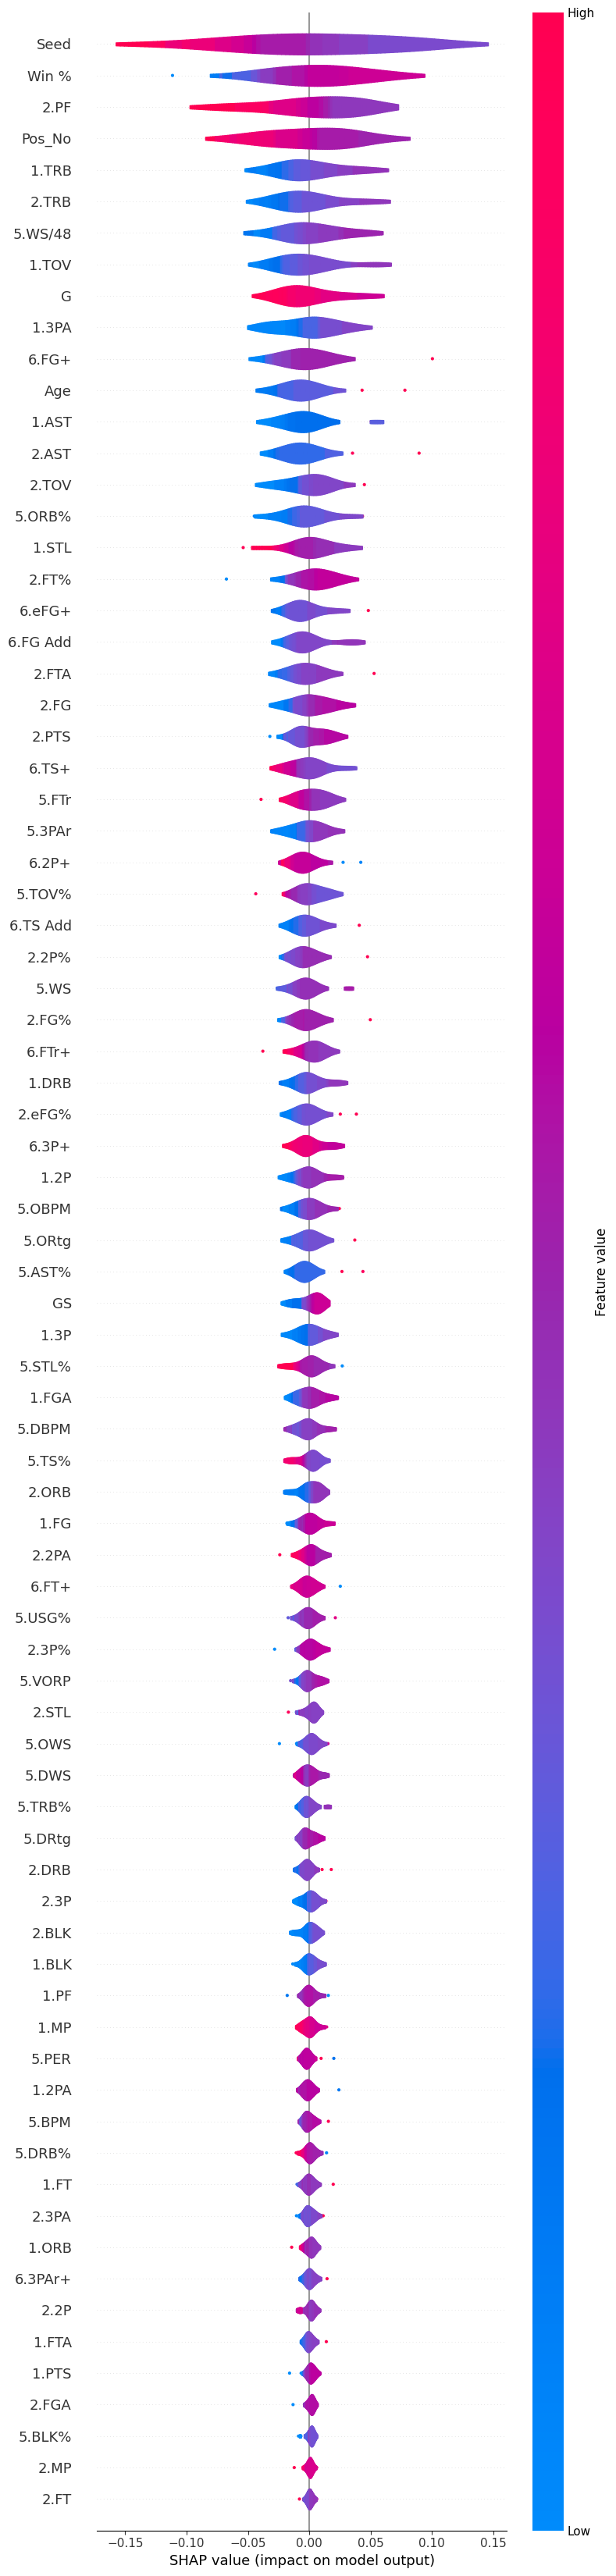

In [25]:
explainer = shap.Explainer(model.predict, normed_test_data)
shap_values = explainer(normed_test_data)
shap.summary_plot(shap_values, test, feature_names=test.columns ,plot_type='violin', max_display=len(test.columns))

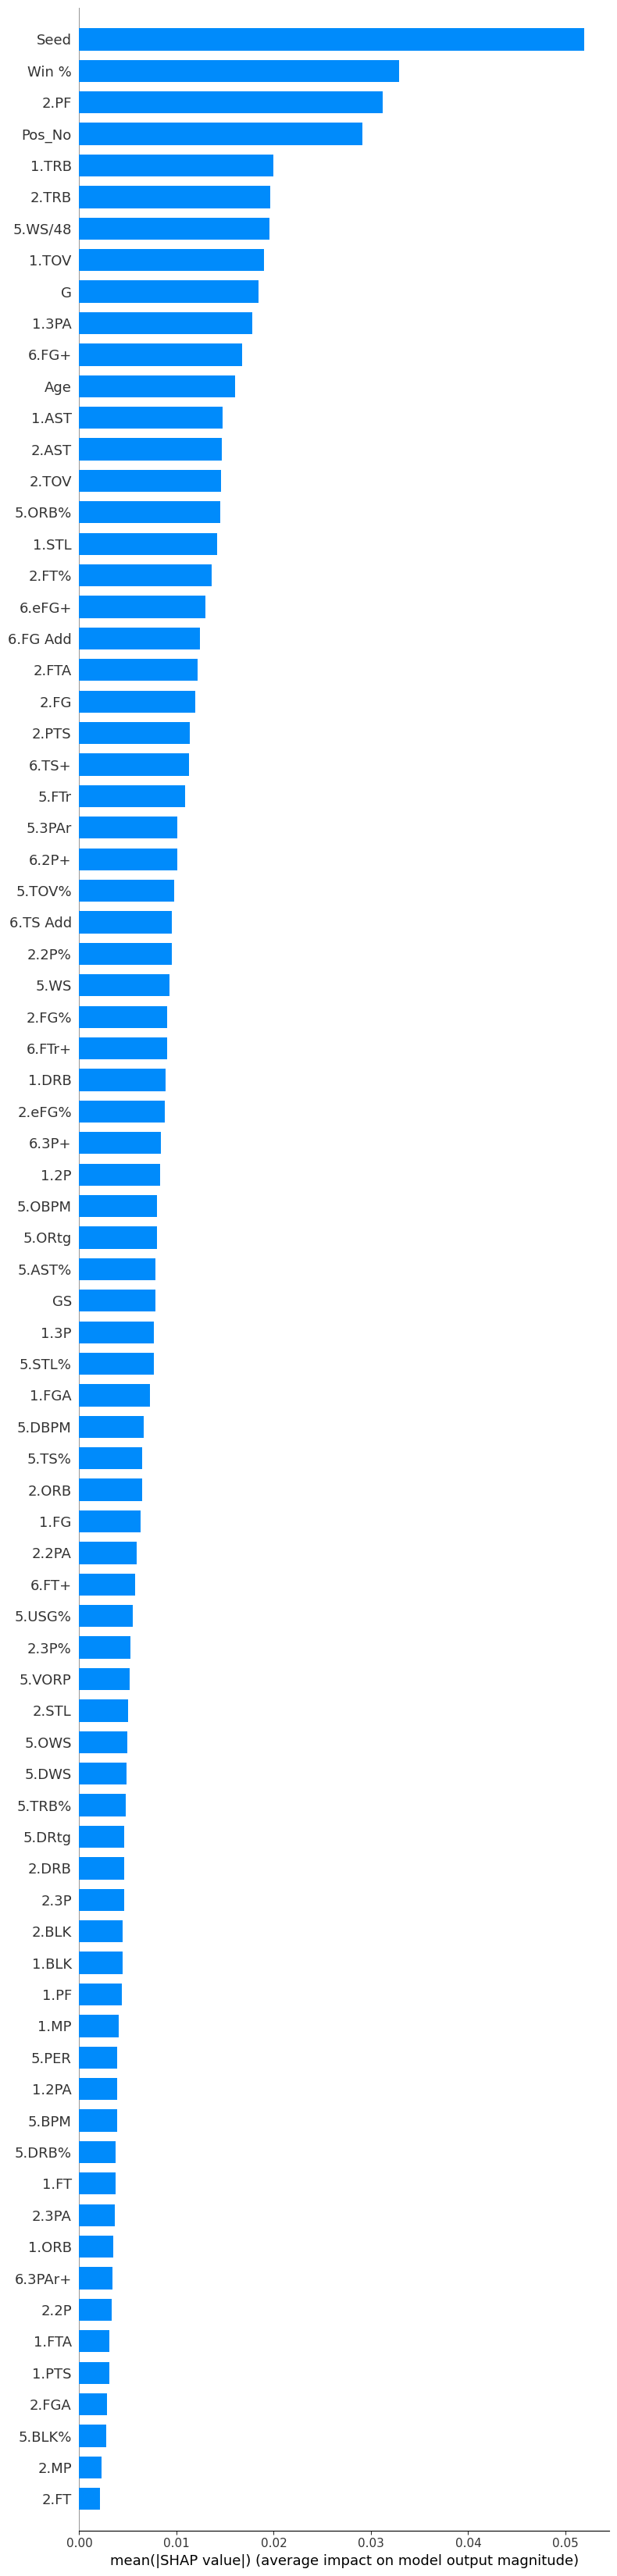

In [26]:
shap.summary_plot(shap_values, test, feature_names=test.columns ,plot_type='bar', max_display=len(test.columns))

In [27]:
leagueavs = pd.read_csv('LeagueAveragesByYear.csv')

In [28]:
histo_test2 = pd.read_csv('HistoTest2.csv')

In [29]:
histo_test2

,Unnamed: 0,Player,Pos,Pos_No,Age,Tm,G,GS,Seed,Win %,...,6.eFG+,6.FT+,6.TS+,6.FTr+,6.3PAr+,6.FG Add,6.TS Add,MVP,MVP Share,Year
0,0,LeBron James,SF,3,24,CLE,81,81,1,0.804878,...,106,101,109,155,106.0,97.7,182.8,1,0.969,2008-09
1,1,Michael Jordan,SG,2,34,CHI,82,82,1,0.756098,...,99,106,102,116,42.0,-17.9,42.5,1,0.934,1997-98
2,2,Hakeem Olajuwon,C,5,33,HOU,72,72,8,0.585366,...,103,98,103,111,5.0,48.8,55.2,0,0.211,1995-96
3,3,Charles Barkley,PF,4,31,PHO,68,66,3,0.719512,...,104,101,105,134,102.0,41.4,80.0,0,0.091,1994-95
4,4,David Robinson,C,5,30,SAS,82,82,4,0.719512,...,104,103,109,181,3.0,50.5,164.8,0,0.508,1995-96
5,5,Karl Malone,PF,4,35,UTA,49,49,2,0.740000,...,106,108,113,183,1.0,44.0,132.8,1,0.701,1998-99
6,6,LeBron James,SF,3,25,CLE,76,76,1,0.743902,...,109,101,111,168,114.0,134.8,229.4,1,0.980,2009-10
7,7,Michael Jordan,SG,2,28,CHI,80,80,1,0.817073,...,108,110,109,106,63.0,142.6,196.0,1,0.938,1991-92
8,8,Hakeem Olajuwon,C,5,30,HOU,82,82,4,0.670732,...,108,103,108,110,5.0,122.6,151.6,0,0.660,1992-93
9,9,Charles Barkley,SF,3,27,PHI,67,67,12,0.536585,...,121,94,119,176,162.0,236.6,292.3,0,0.231,1990-91


In [30]:
df1 = pd.read_csv('MedievalEra.csv')

In [31]:
histo_test2.drop(histo_test2.columns[[0]], axis = 1, inplace=True)

In [32]:
training_data = df1.copy()
train = training_data.drop(['Player', 'Pos', 'Tm', 'MVP', 'MVP Rank', 'MVP Share', 'Year'] + col_to_drop, axis=1)
train_labels = training_data['MVP Share']

train.fillna(0)

scaler = StandardScaler()
normed_train_data = scaler.fit_transform(train)

In [33]:
test = histo_test2.drop(['Player', 'Pos', 'Tm', 'MVP', 'MVP Share', 'Year'] + col_to_drop, axis=1)

test.fillna(0)
scaler = StandardScaler()
normed_test_data = scaler.fit_transform(test)

EPOCHS = 80
batch_size = 50

model = build_model3_five_hidden_layers()
print('Here is a summary of this model: ')
model.summary()


with tf.device('/CPU:0'): 
    history = model.fit(
        normed_train_data, 
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=1,
        shuffle=True,
        steps_per_epoch = int(normed_train_data.shape[0] / batch_size) ,
        callbacks=[tfdocs.modeling.EpochDots(), 
                ckpt_callback
                  ],
        
    )
Y_pred = model.predict(normed_test_data)
initial_results = histo_test2[['Year', 'Player', 'Age', 'MVP']]
results = initial_results.copy()
results['Predicted MVP Share'] = Y_pred

print(results)

Here is a summary of this model: 
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_95 (Dense)            (None, 32)                2560      
                                                                 
 dense_96 (Dense)            (None, 64)                2112      
                                                                 
 dense_97 (Dense)            (None, 64)                4160      
                                                                 
 dense_98 (Dense)            (None, 64)                4160      
                                                                 
 dense_99 (Dense)            (None, 64)                4160      
                                                                 
 dense_100 (Dense)           (None, 64)                4160      
                                                                 
 dense_101 (Dense) 

3/3 [==============================] - 1s 10ms/step - loss: 0.3436 - mae: 0.3984 - mse: 0.3436 - mape: 9364.5596
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0679 - mae: 0.1549 - mse: 0.0679 - mape: 731.7870.

3/3 [==============================] - 0s 9ms/step - loss: 0.0745 - mae: 0.1659 - mse: 0.0745 - mape: 1632.6666
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0799 - mae: 0.2361 - mse: 0.0799 - mape: 6062.7910.

3/3 [==============================] - 0s 9ms/step - loss: 0.0775 - mae: 0.2045 - mse: 0.0775 - mape: 3788.0391
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0633 - mae: 0.1622 - mse: 0.0633 - mape: 1009.1428.

3/3 [==============================] - 0s 8ms/step - loss: 0.0474 - mae: 0.1512 - mse: 0.0474 - mape: 1455.8633
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0324 - mae: 0.1147 - mse: 0.0324 - mape: 956.4045.

3/3 [==============================] - 0s 9ms/step - loss: 0.0452 - mae: 0.1284 - mse: 0.0452 - mape: 915.8041
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0597 - mae: 0.1592 - mse: 0.0597 - mape: 1841.4850.

3/3 [==============================] - 0s 11ms/step - loss: 0.0469 - mae: 0.1645 - mse: 0.0469 - mape: 2768.7937
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0389 - mae: 0.1434 - mse: 0.0389 - mape: 2241.5676.

3/3 [==============================] - 0s 12ms/step - loss: 0.0474 - mae: 0.1426 - mse: 0.0474 - mape: 1661.1230
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0343 - mae: 0.1143 - mse: 0.0343 - mape: 1287.7567.

3/3 [==============================] - 0s 9ms/step - loss: 0.0299 - mae: 0.1139 - mse: 0.0299 - mape: 961.7167
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0200 - mae: 0.0965 - mse: 0.0200 - mape: 1682.8895.

3/3 [==============================] - 0s 9ms/step - loss: 0.0285 - mae: 0.1119 - mse: 0.0285 - mape: 1279.9045
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0151 - mae: 0.0884 - mse: 0.0151 - mape: 972.3737.

3/3 [==============================] - 0s 15ms/step - loss: 0.0184 - mae: 0.0880 - mse: 0.0184 - mape: 920.3611
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0260 - mae: 0.1053 - mse: 0.0260 - mape: 788.1694.

3/3 [==============================] - 0s 10ms/step - loss: 0.0226 - mae: 0.1005 - mse: 0.0226 - mape: 776.1387
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0206 - mae: 0.0894 - mse: 0.0206 - mape: 756.6027.

3/3 [==============================] - 0s 9ms/step - loss: 0.0219 - mae: 0.0944 - mse: 0.0219 - mape: 627.1992
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0252 - mae: 0.1019 - mse: 0.0252 - mape: 552.0244.

3/3 [==============================] - 0s 9ms/step - loss: 0.0169 - mae: 0.0818 - mse: 0.0169 - mape: 743.1053
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0239 - mae: 0.0948 - mse: 0.0239 - mape: 649.4871.

3/3 [==============================] - 0s 9ms/step - loss: 0.0179 - mae: 0.0864 - mse: 0.0179 - mape: 518.5757
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0231 - mae: 0.0850 - mse: 0.0231 - mape: 469.9029.

3/3 [==============================] - 0s 9ms/step - loss: 0.0173 - mae: 0.0747 - mse: 0.0173 - mape: 552.7321
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0211 - mae: 0.0950 - mse: 0.0211 - mape: 783.3276.

3/3 [==============================] - 0s 10ms/step - loss: 0.0189 - mae: 0.0835 - mse: 0.0189 - mape: 556.5579
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0142 - mae: 0.0769 - mse: 0.0142 - mape: 774.3789.

3/3 [==============================] - 0s 11ms/step - loss: 0.0209 - mae: 0.0922 - mse: 0.0209 - mape: 1087.0240
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0093 - mae: 0.0547 - mse: 0.0093 - mape: 517.6960.

3/3 [==============================] - 0s 9ms/step - loss: 0.0101 - mae: 0.0622 - mse: 0.0101 - mape: 561.5317
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0176 - mae: 0.0717 - mse: 0.0176 - mape: 383.8026.

3/3 [==============================] - 0s 9ms/step - loss: 0.0236 - mae: 0.0863 - mse: 0.0236 - mape: 463.6957
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0139 - mae: 0.0800 - mse: 0.0139 - mape: 1367.1245.

3/3 [==============================] - 0s 9ms/step - loss: 0.0138 - mae: 0.0800 - mse: 0.0138 - mape: 892.2719
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0078 - mae: 0.0476 - mse: 0.0078 - mape: 416.7930.

3/3 [==============================] - 0s 8ms/step - loss: 0.0149 - mae: 0.0681 - mse: 0.0149 - mape: 528.6728
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0171 - mae: 0.0953 - mse: 0.0171 - mape: 1368.7407.

3/3 [==============================] - 0s 10ms/step - loss: 0.0173 - mae: 0.0821 - mse: 0.0173 - mape: 722.7991
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0143 - mae: 0.0700 - mse: 0.0143 - mape: 488.7649.

3/3 [==============================] - 0s 9ms/step - loss: 0.0149 - mae: 0.0735 - mse: 0.0149 - mape: 518.9628
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0102 - mae: 0.0661 - mse: 0.0102 - mape: 474.6136.

3/3 [==============================] - 0s 9ms/step - loss: 0.0131 - mae: 0.0715 - mse: 0.0131 - mape: 562.9489
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0088 - mae: 0.0530 - mse: 0.0088 - mape: 145.7921.

3/3 [==============================] - 0s 10ms/step - loss: 0.0114 - mae: 0.0622 - mse: 0.0114 - mape: 353.9612
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0343 - mae: 0.1055 - mse: 0.0343 - mape: 1230.8185.

3/3 [==============================] - 0s 9ms/step - loss: 0.0133 - mae: 0.0663 - mse: 0.0133 - mape: 923.8699
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0194 - mae: 0.0910 - mse: 0.0194 - mape: 856.4269.

3/3 [==============================] - 0s 9ms/step - loss: 0.0237 - mae: 0.0851 - mse: 0.0237 - mape: 634.1420
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0157 - mae: 0.0686 - mse: 0.0157 - mape: 929.3075.

3/3 [==============================] - 0s 11ms/step - loss: 0.0143 - mae: 0.0747 - mse: 0.0143 - mape: 958.5381
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0142 - mae: 0.0745 - mse: 0.0142 - mape: 901.0520.

3/3 [==============================] - 0s 10ms/step - loss: 0.0127 - mae: 0.0738 - mse: 0.0127 - mape: 1132.1018
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0184 - mae: 0.1026 - mse: 0.0184 - mape: 1526.2117.

3/3 [==============================] - 0s 8ms/step - loss: 0.0101 - mae: 0.0730 - mse: 0.0101 - mape: 1389.3326
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0239 - mae: 0.0861 - mse: 0.0239 - mape: 803.6323.

3/3 [==============================] - 0s 8ms/step - loss: 0.0142 - mae: 0.0726 - mse: 0.0142 - mape: 754.8010
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0071 - mae: 0.0567 - mse: 0.0071 - mape: 941.2014.

3/3 [==============================] - 0s 9ms/step - loss: 0.0095 - mae: 0.0670 - mse: 0.0095 - mape: 933.7888
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0073 - mae: 0.0526 - mse: 0.0073 - mape: 925.1246.

3/3 [==============================] - 0s 10ms/step - loss: 0.0065 - mae: 0.0519 - mse: 0.0065 - mape: 629.5783
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0051 - mae: 0.0447 - mse: 0.0051 - mape: 923.6871.

3/3 [==============================] - 0s 9ms/step - loss: 0.0055 - mae: 0.0452 - mse: 0.0055 - mape: 469.4566
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0034 - mae: 0.0429 - mse: 0.0034 - mape: 654.8908.

3/3 [==============================] - 0s 9ms/step - loss: 0.0043 - mae: 0.0479 - mse: 0.0043 - mape: 703.2169
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0071 - mae: 0.0515 - mse: 0.0071 - mape: 543.8984.

3/3 [==============================] - 0s 9ms/step - loss: 0.0054 - mae: 0.0436 - mse: 0.0054 - mape: 403.7486
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0039 - mae: 0.0423 - mse: 0.0039 - mape: 246.2260.

3/3 [==============================] - 0s 10ms/step - loss: 0.0043 - mae: 0.0425 - mse: 0.0043 - mape: 551.1791
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0036 - mae: 0.0415 - mse: 0.0036 - mape: 420.4313.

3/3 [==============================] - 0s 11ms/step - loss: 0.0041 - mae: 0.0423 - mse: 0.0041 - mape: 381.1791
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0044 - mae: 0.0466 - mse: 0.0044 - mape: 432.9665.

3/3 [==============================] - 0s 12ms/step - loss: 0.0032 - mae: 0.0381 - mse: 0.0032 - mape: 336.8292
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0020 - mae: 0.0300 - mse: 0.0020 - mape: 556.7462.

3/3 [==============================] - 0s 9ms/step - loss: 0.0030 - mae: 0.0348 - mse: 0.0030 - mape: 388.6362
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0017 - mae: 0.0245 - mse: 0.0017 - mape: 357.4477.

3/3 [==============================] - 0s 8ms/step - loss: 0.0020 - mae: 0.0295 - mse: 0.0020 - mape: 357.0291
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0031 - mae: 0.0351 - mse: 0.0031 - mape: 444.5833.

3/3 [==============================] - 0s 12ms/step - loss: 0.0023 - mae: 0.0307 - mse: 0.0023 - mape: 408.3578
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0018 - mae: 0.0297 - mse: 0.0018 - mape: 173.3056.

3/3 [==============================] - 0s 11ms/step - loss: 0.0016 - mae: 0.0262 - mse: 0.0016 - mape: 211.9016
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0010 - mae: 0.0218 - mse: 0.0010 - mape: 207.0761.

3/3 [==============================] - 0s 10ms/step - loss: 0.0017 - mae: 0.0263 - mse: 0.0017 - mape: 302.4332
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0010 - mae: 0.0198 - mse: 0.0010 - mape: 294.5217.

3/3 [==============================] - 0s 10ms/step - loss: 0.0017 - mae: 0.0250 - mse: 0.0017 - mape: 261.5796
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0017 - mae: 0.0280 - mse: 0.0017 - mape: 256.1852.

3/3 [==============================] - 0s 10ms/step - loss: 0.0014 - mae: 0.0253 - mse: 0.0014 - mape: 321.6600
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 5.2284e-04 - mae: 0.0156 - mse: 5.2284e-04 - mape: 189.3569.

3/3 [==============================] - 0s 9ms/step - loss: 0.0012 - mae: 0.0202 - mse: 0.0012 - mape: 243.2170    
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0016 - mae: 0.0259 - mse: 0.0016 - mape: 276.4688.

3/3 [==============================] - 0s 10ms/step - loss: 0.0014 - mae: 0.0237 - mse: 0.0014 - mape: 305.2775
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 9.2160e-04 - mae: 0.0199 - mse: 9.2160e-04 - mape: 125.2536.

3/3 [==============================] - 0s 10ms/step - loss: 0.0010 - mae: 0.0206 - mse: 0.0010 - mape: 218.6701   
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0014 - mae: 0.0233 - mse: 0.0014 - mape: 394.5078.

3/3 [==============================] - 0s 11ms/step - loss: 0.0011 - mae: 0.0211 - mse: 0.0011 - mape: 281.7316
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 9.4946e-04 - mae: 0.0210 - mse: 9.4946e-04 - mape: 251.7739.

3/3 [==============================] - 0s 10ms/step - loss: 9.6513e-04 - mae: 0.0188 - mse: 9.6513e-04 - mape: 174.4794
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 7.0127e-04 - mae: 0.0166 - mse: 7.0127e-04 - mape: 172.4625.

3/3 [==============================] - 0s 10ms/step - loss: 0.0010 - mae: 0.0198 - mse: 0.0010 - mape: 190.2989   
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 9.9174e-04 - mae: 0.0207 - mse: 9.9174e-04 - mape: 173.8291.

3/3 [==============================] - 0s 12ms/step - loss: 0.0012 - mae: 0.0211 - mse: 0.0012 - mape: 255.1417   
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 2.6003e-04 - mae: 0.0135 - mse: 2.6003e-04 - mape: 381.0117.

3/3 [==============================] - 0s 10ms/step - loss: 8.0469e-04 - mae: 0.0183 - mse: 8.0469e-04 - mape: 316.5425
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0016 - mae: 0.0266 - mse: 0.0016 - mape: 126.8309.

3/3 [==============================] - 0s 9ms/step - loss: 0.0013 - mae: 0.0239 - mse: 0.0013 - mape: 234.2882
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0011 - mae: 0.0185 - mse: 0.0011 - mape: 204.6036.

3/3 [==============================] - 0s 10ms/step - loss: 0.0016 - mae: 0.0264 - mse: 0.0016 - mape: 178.0039
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0023 - mae: 0.0256 - mse: 0.0023 - mape: 163.7047.

3/3 [==============================] - 0s 12ms/step - loss: 0.0032 - mae: 0.0328 - mse: 0.0032 - mape: 262.8987
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0016 - mae: 0.0221 - mse: 0.0016 - mape: 244.9917.

3/3 [==============================] - 0s 10ms/step - loss: 0.0026 - mae: 0.0304 - mse: 0.0026 - mape: 157.3880
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0022 - mae: 0.0240 - mse: 0.0022 - mape: 254.5114.

3/3 [==============================] - 0s 10ms/step - loss: 0.0030 - mae: 0.0320 - mse: 0.0030 - mape: 345.6699
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0044 - mae: 0.0408 - mse: 0.0044 - mape: 521.9240.

3/3 [==============================] - 0s 9ms/step - loss: 0.0039 - mae: 0.0387 - mse: 0.0039 - mape: 307.4144
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0081 - mae: 0.0458 - mse: 0.0081 - mape: 173.5982.

3/3 [==============================] - 0s 10ms/step - loss: 0.0047 - mae: 0.0376 - mse: 0.0047 - mape: 228.2301
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0101 - mae: 0.0649 - mse: 0.0101 - mape: 446.1073.

3/3 [==============================] - 0s 9ms/step - loss: 0.0051 - mae: 0.0455 - mse: 0.0051 - mape: 380.6970
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0074 - mae: 0.0498 - mse: 0.0074 - mape: 262.3545.

3/3 [==============================] - 0s 9ms/step - loss: 0.0064 - mae: 0.0447 - mse: 0.0064 - mape: 250.7104
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0078 - mae: 0.0581 - mse: 0.0078 - mape: 282.5582.

3/3 [==============================] - 0s 10ms/step - loss: 0.0060 - mae: 0.0458 - mse: 0.0060 - mape: 366.4296
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0033 - mae: 0.0374 - mse: 0.0033 - mape: 329.4434.

3/3 [==============================] - 0s 9ms/step - loss: 0.0037 - mae: 0.0390 - mse: 0.0037 - mape: 447.1155
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0019 - mae: 0.0333 - mse: 0.0019 - mape: 500.3575.

3/3 [==============================] - 0s 9ms/step - loss: 0.0024 - mae: 0.0338 - mse: 0.0024 - mape: 360.9971
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0022 - mae: 0.0283 - mse: 0.0022 - mape: 252.5185.

3/3 [==============================] - 0s 10ms/step - loss: 0.0018 - mae: 0.0268 - mse: 0.0018 - mape: 283.1017
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0013 - mae: 0.0228 - mse: 0.0013 - mape: 230.7153.

3/3 [==============================] - 0s 10ms/step - loss: 0.0019 - mae: 0.0278 - mse: 0.0019 - mape: 320.0374
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0016 - mae: 0.0284 - mse: 0.0016 - mape: 338.5132.

3/3 [==============================] - 0s 10ms/step - loss: 0.0013 - mae: 0.0248 - mse: 0.0013 - mape: 396.5593
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0053 - mae: 0.0471 - mse: 0.0053 - mape: 378.9867.

3/3 [==============================] - 0s 11ms/step - loss: 0.0025 - mae: 0.0310 - mse: 0.0025 - mape: 316.1283
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0019 - mae: 0.0293 - mse: 0.0019 - mape: 155.5957.

3/3 [==============================] - 0s 12ms/step - loss: 0.0027 - mae: 0.0339 - mse: 0.0027 - mape: 239.4967
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0079 - mae: 0.0460 - mse: 0.0079 - mape: 321.1066.

3/3 [==============================] - 0s 9ms/step - loss: 0.0053 - mae: 0.0384 - mse: 0.0053 - mape: 264.3001
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0043 - mae: 0.0454 - mse: 0.0043 - mape: 587.3806.

3/3 [==============================] - 0s 11ms/step - loss: 0.0052 - mae: 0.0411 - mse: 0.0052 - mape: 521.9745
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0067 - mae: 0.0454 - mse: 0.0067 - mape: 212.7981.

3/3 [==============================] - 0s 15ms/step - loss: 0.0059 - mae: 0.0437 - mse: 0.0059 - mape: 219.8658
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0103 - mae: 0.0599 - mse: 0.0103 - mape: 433.0753.

3/3 [==============================] - 0s 9ms/step - loss: 0.0095 - mae: 0.0509 - mse: 0.0095 - mape: 403.0999
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0042 - mae: 0.0394 - mse: 0.0042 - mape: 623.2608.

3/3 [==============================] - 0s 10ms/step - loss: 0.0041 - mae: 0.0412 - mse: 0.0041 - mape: 598.0585
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0060 - mae: 0.0458 - mse: 0.0060 - mape: 449.9832.

3/3 [==============================] - 0s 11ms/step - loss: 0.0063 - mae: 0.0476 - mse: 0.0063 - mape: 469.7106
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0036 - mae: 0.0359 - mse: 0.0036 - mape: 139.0797.

3/3 [==============================] - 0s 10ms/step - loss: 0.0077 - mae: 0.0523 - mse: 0.0077 - mape: 256.5160
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0022 - mae: 0.0301 - mse: 0.0022 - mape: 178.5388.

3/3 [==============================] - 0s 9ms/step - loss: 0.0069 - mae: 0.0457 - mse: 0.0069 - mape: 214.0341
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0073 - mae: 0.0530 - mse: 0.0073 - mape: 360.7000.

1/1 [==============================] - 0s 92ms/step
       Year           Player  Age  MVP  Predicted MVP Share
0   2008-09     LeBron James   24    1             1.066322
1   1997-98   Michael Jordan   34    1             0.299355
2   1995-96  Hakeem Olajuwon   33    0             0.017613
3   1994-95  Charles Barkley   31    0             0.028499
4   1995-96   David Robinson   30    0             0.029900
5   1998-99      Karl Malone   35    1                  NaN
6   2009-10     LeBron James   25    1             0.890916
7   1991-92   Michael Jordan   28    1             0.644625
8   1992-93  Hakeem Olajuwon   30    0                  NaN
9   1990-91  Charles Barkley   27    0             0.021725
10  1993-94   David Robinson   28    0             0.442104
11  1997-98      Karl Malone   34    0             0.157366
12  2010-11     LeBron James   26    0             0.356458
13  1996-97   Michael Jordan   33    0             0.469411
14  1996-97  Hakeem Olajuwon   34    0          

In [34]:
r1 = results.iloc[0:6]
r1 = r1.sort_values('Predicted MVP Share', ascending=False).reset_index(drop=True)
r1

,Year,Player,Age,MVP,Predicted MVP Share
0,2008-09,LeBron James,24,1,1.066322
1,1997-98,Michael Jordan,34,1,0.299355
2,1995-96,David Robinson,30,0,0.029900
3,1994-95,Charles Barkley,31,0,0.028499
4,1995-96,Hakeem Olajuwon,33,0,0.017613
5,1998-99,Karl Malone,35,1,NaN


In [35]:
r2 = results.iloc[6:12]
r2 = r2.sort_values('Predicted MVP Share', ascending=False).reset_index(drop=True)
r2

,Year,Player,Age,MVP,Predicted MVP Share
0,2009-10,LeBron James,25,1,0.890916
1,1991-92,Michael Jordan,28,1,0.644625
2,1993-94,David Robinson,28,0,0.442104
3,1997-98,Karl Malone,34,0,0.157366
4,1990-91,Charles Barkley,27,0,0.021725
5,1992-93,Hakeem Olajuwon,30,0,NaN


In [36]:
r3 = results.iloc[12:18]
r3 = r3.sort_values('Predicted MVP Share', ascending=False).reset_index(drop=True)
r3

,Year,Player,Age,MVP,Predicted MVP Share
0,1996-97,Michael Jordan,33,0,0.469411
1,2010-11,LeBron James,26,0,0.356458
2,1991-92,Karl Malone,28,0,0.032327
3,1995-96,Charles Barkley,32,0,0.024645
4,1991-92,David Robinson,26,0,0.019781
5,1996-97,Hakeem Olajuwon,34,0,0.018811


In [37]:
r4 = results.iloc[18:23]
r4 = r4.sort_values('Predicted MVP Share', ascending=False).reset_index(drop=True)
r4

,Year,Player,Age,MVP,Predicted MVP Share
0,1990-91,Michael Jordan,27,1,0.667497
1,2011-12,LeBron James,27,1,0.658690
2,1991-92,Charles Barkley,28,0,0.035045
3,1994-95,Hakeem Olajuwon,32,0,0.020476
4,1990-91,David Robinson,25,0,0.018082
